<a href="https://colab.research.google.com/github/booyahkid/prompt-engineering-llmmodel-foredu-analysis/blob/main/Skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# install ollama w/o console

In [ ]:
# !pip install colab-xterm
# %load_ext colabxterm

In [ ]:
# %xterm

# library

In [ ]:
!pip install ollama
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install bert_score
!pip install nltk rouge-score bert-score
!pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import ollama
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bert_score import score as bert_score
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.translate.meteor_score import meteor_score
from rouge_score import rouge_scorer
from bert_score import score as bert_score
from tqdm import tqdm

# Load Data

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df_siscer = pd.read_excel('/content/drive/MyDrive/Skripsi/Dataset/siscer.xlsx')
df_mpi = pd.read_excel('/content/drive/MyDrive/Skripsi/Dataset/mpi.xlsx')

In [ ]:
df_siscer = df_siscer.dropna()

In [ ]:
df_siscer.head()

jawaban  \
0  Iterative searching memberikan nilai awal seda...   
1  Iterative Searching adalah pencarian yang dila...   
2  Iterative Searching biasanya digunakan untuk p...   
3  Iterative searching tidak dapat digunakan untu...   
4  Iterative searching digunakan untuk pencarian ...   

                                            feedback  nilai  
0  Jawaban kamu salah. Kamu tidak memberikan penj...      6  
1  Jawaban kamu masih sangat kurang karena kamu h...      8  
2  Jawaban kamu hampir benar tetapi belum lengkap...      7  
3  Jawaban kamu hampir benar. Kamu telah menjelas...      9  
4  Jawaban kamu salah. Kamu tidak memberikan penj...      9

In [ ]:
df_mpi.head()

jawaban  \
0  Rumusan masalah adalah suatu tulisan singkat y...   
1  Research Question (rumusan masalah)\n\n-pada u...   
2  Research question atau disebut juga rumusan ma...   
3  Research question merupakan pertanyaan-pertany...   
4  research question\n\nrumusan masalah merupkan ...   

                                            feedback  nilai  
0  Jawaban kamu salah. Penjelasan mengenai Resear...      7  
1  Jawaban kamu sangat salah. Kamu tidak memberik...      2  
2  Jawaban kamu salah. Penjelasan mengenai Resear...      8  
3  Jawaban kamu masih salah, karena penjelasan me...      6  
4  Jawaban kamu sangat salah. Karena penjelasan k...      5

# Prompt

## One n Few Prompt Siscer

In [ ]:
one_prompt = {
"one_shot_tinggi": """
Berikut adalah contoh feedback untuk jawaban mahasiswa:
Pertanyaan: Jelaskan perbedaan antara iterative searching dan non iterative searching?
Jawaban Mahasiswa: Iterative search adalah sebuah jenis search yang akan terus mengihitung kemungkinan sampai ditemukannya goal state. Dalam iterative search, solusi tidak selalu berupa path karena dapat mencoba untuk mencari benefit terbanyak atau cost terendah. Non-iterative search adalah search yang tidak diulang-ulang hingga menemukan solusi terbaik, sehingga tidak melalui trial and error. Pada non-iterative search, dicarikan path untuk mencapai goal state.
Feedback: Jawaban kamu hampir benar. Kamu telah menjelaskan perbedaan penggunaan serta kondisi akhir dari  proses pencarian iterative search dan non-iterative search, namun kamu belum menyimpulkan kedua hal tersebut sebagai dua poin pembeda diantara kedua teknik search.
""",
"one_shot_sedang": """
Berikut adalah contoh feedback untuk jawaban mahasiswa:
pertanyaan: Jelaskan perbedaan antara iterative searching dan non iterative searching?
Jawaban Mahasiswa: iterative menggunakan hitungan dari awal sampe akhir, sedangkan non iterative tidak.
Feedback: Jawaban kamu salah. Kamu  tidak menjelaskan perbedaan iterative searching dan non iterative searching dari segi penggunaan dan kondisi akhir serta jawaban kamu tidak sesuai
""",
"one_shot_rendah": """
Berikut adalah contoh feedback untuk jawaban mahasiswa:
Pertanyaan: Jelaskan perbedaan antara iterative searching dan non iterative searching?
Jawaban Mahasiswa: Perbedaan antara iterative seraching dan non iterative searching
Feedback: Jawaban kamu salah karena tidak menjelaskan mengenai perbedaan konsep penggunaan dan kondisi akhir dari iterative searching serta non iterative searching
"""
}

few_prompt = """
Berikut adalah contoh feedback untuk jawaban mahasiswa:
Pertanyaan: Jelaskan perbedaan antara iterative searching dan non iterative searching?
Jawaban Mahasiswa: Iterative search adalah sebuah jenis search yang akan terus mengihitung kemungkinan sampai ditemukannya goal state. Dalam iterative search, solusi tidak selalu berupa path karena dapat mencoba untuk mencari benefit terbanyak atau cost terendah. Non-iterative search adalah search yang tidak diulang-ulang hingga menemukan solusi terbaik, sehingga tidak melalui trial and error. Pada non-iterative search, dicarikan path untuk mencapai goal state.
Feedback: Jawaban kamu hampir benar. Kamu telah menjelaskan perbedaan penggunaan serta kondisi akhir dari  proses pencarian iterative search dan non-iterative search, namun kamu belum menyimpulkan kedua hal tersebut sebagai dua poin pembeda diantara kedua teknik search.

Berikut adalah contoh feedback untuk jawaban mahasiswa:
pertanyaan: Jelaskan perbedaan antara iterative searching dan non iterative searching?
Jawaban Mahasiswa: iterative menggunakan hitungan dari awal sampe akhir, sedangkan non iterative tidak.
Feedback: Jawaban kamu salah. Kamu  tidak menjelaskan perbedaan iterative searching dan non iterative searching dari segi penggunaan dan kondisi akhir serta jawaban kamu tidak sesuai

Berikut adalah contoh feedback untuk jawaban mahasiswa:
Pertanyaan: Jelaskan perbedaan antara iterative searching dan non iterative searching?
Jawaban Mahasiswa: Perbedaan antara iterative seraching dan non iterative searching
Feedback: Jawaban kamu salah karena tidak menjelaskan mengenai perbedaan konsep penggunaan dan kondisi akhir dari iterative searching serta non iterative searching
"""

## Persona Siscer MPI

In [ ]:
# -------------------------------------------------
# 1. Definisi Persona dan Mata Kuliah
# -------------------------------------------------
persona_sistem_cerdas = {
    "base": """
    Anda adalah asisten AI yang memberikan feedback singkat dan objektif.
    Tugas Anda adalah mengevaluasi jawaban mahasiswa dalam mata kuliah Sistem Cerdas.
    Feedback harus jelas, berbasis konsep kecerdasan buatan, dan memberikan saran konkret untuk perbaikan.
    """,

    "dosen": """
    Anda adalah seorang dosen yang mengajar mata kuliah Sistem Cerdas.
    Feedback Anda harus bersifat pedagogis, membimbing mahasiswa untuk memahami konsep kecerdasan buatan (AI),
    pencarian heuristik, pembelajaran mesin, dan sistem berbasis pengetahuan.
    Berikan saran yang membantu mahasiswa mengembangkan pemahamannya terhadap konsep yang diajarkan.
    """,

    "ahli": """
    Anda adalah seorang ahli dalam bidang Sistem Cerdas dengan pengalaman dalam kecerdasan buatan (AI),
    machine learning, pencarian heuristik, dan sistem berbasis pengetahuan.
    Tugas Anda adalah mengevaluasi jawaban mahasiswa dengan standar akademik tinggi,
    memastikan pemahaman mendalam terhadap algoritma pencarian, representasi pengetahuan,
    serta penerapan AI dalam berbagai domain.
    Feedback harus mendalam, memberikan kritik konstruktif, serta menyarankan literatur atau pendekatan yang lebih tepat.
    """
}

persona_mpi = {
    "base": """
    Anda adalah asisten AI yang memberikan feedback singkat, objektif, dan berbasis prinsip penelitian ilmiah.
    Tugas Anda adalah mengevaluasi jawaban mahasiswa dalam mata kuliah Metodologi Penelitian dan Penulisan Ilmiah.
    Feedback harus jelas, ringkas, dan memberikan saran spesifik untuk perbaikan jawaban.
    """,

    "dosen": """
    Anda adalah seorang dosen yang mengajar mata kuliah Metodologi Penelitian dan Penulisan Ilmiah.
    Feedback Anda harus bersifat pedagogis, membantu mahasiswa memahami konsep dasar penelitian ilmiah,
    seperti perumusan masalah, metode penelitian, validitas data, dan struktur penulisan ilmiah.
    Berikan saran yang membimbing mahasiswa untuk menyusun penelitian yang lebih sistematis dan akademik.
    """,

    "ahli": """
    Anda adalah seorang ahli dalam bidang Metodologi Penelitian dan Penulisan Ilmiah dengan pengalaman mendalam dalam desain eksperimen,
    analisis data, dan publikasi akademik.
    Tugas Anda adalah mengevaluasi jawaban mahasiswa dengan standar akademik yang tinggi,
    mencakup keakuratan metodologi, kesesuaian pendekatan penelitian, serta kepatuhan terhadap kaidah penulisan ilmiah.
    Feedback harus mendalam, memberikan kritik konstruktif, serta menyarankan referensi atau pendekatan yang lebih tepat untuk meningkatkan kualitas penelitian mahasiswa.
    """
}

# Fungsi Generate Ollama Siscer

In [ ]:
# -------------------------------------------------
# 2. Fungsi Generate Feedback Menggunakan Ollama
# -------------------------------------------------
def generate_feedback_ollama(mata_kuliah, persona, strategy, question, student_answer,
                             reference_feedback=None, one_shot_type=None):
    """
    Generate feedback dari Ollama berdasarkan strategi: zero-shot, cot, one-shot (4 tipe), atau few-shot.
    - one_shot_type: "one_shot_tinggi", "one_shot_sedang", "one_shot_rendah", "one_shot_asli"
    - reference_feedback diperlukan untuk one_shot_asli
    """
    persona_dict = persona_sistem_cerdas if mata_kuliah == "sistem_cerdas" else persona_mpi
    persona_text = persona_dict[persona]
    scope = f"Evaluasi jawaban mahasiswa dalam mata kuliah {mata_kuliah.replace('_', ' ')}."

    # Zero-Shot Prompt
    if strategy == "zero-shot":
        prompt = f"""
{persona_text}

{scope}

Pertanyaan: {question}
Jawaban Mahasiswa: {student_answer}

Berikan feedback yang:
1) Mengevaluasi ketepatan konsep.
2) Menyebutkan kesalahan atau kekurangan pemahaman jika ada.
3) Memberikan saran akademik atau perbaikan agar lebih baik.
"""

    # Chain-of-Thought Prompt
    elif strategy == "cot":
        prompt = f"""
{persona_text}

Gunakan pendekatan berpikir bertahap (Chain-of-Thought) untuk memberikan feedback:

1) Evaluasi ketepatan konsep.
2) Identifikasi kesalahan atau kekurangan dalam jawaban mahasiswa.
3) Berikan saran konkret dan akademik untuk memperbaiki jawaban.
4) Kaitkan dengan penerapan dunia nyata atau referensi teori jika relevan.

Pertanyaan: {question}
Jawaban Mahasiswa: {student_answer}

**Analisis Bertahap:**
"""

    # One-Shot Prompt
    elif strategy == "one-shot":
        if one_shot_type == "one_shot_asli":
            if reference_feedback is None:
                return "Error: reference_feedback diperlukan untuk one_shot_asli", ""
            example_text = f"""
            Berikut adalah contoh feedback untuk jawaban mahasiswa:
            Pertanyaan: {question}
            Jawaban Mahasiswa: {student_answer}
            Feedback: {reference_feedback}
            """
        else:
            example_text = one_prompt.get(one_shot_type)
            if example_text is None:
                return f"Error: Tipe one-shot '{one_shot_type}' tidak valid.", ""

        prompt = f"""
        {persona_text}

        {scope}

        {example_text}

        Sekarang, berikan feedback untuk jawaban berikut:
        Pertanyaan: {question}
        Jawaban Mahasiswa: {student_answer}
        Feedback:
        """

    # Few-Shot Prompt
    elif strategy == "few-shot":
        prompt = f"""
        {persona_text}

        {scope}

        Berikut beberapa contoh feedback yang relevan:
        {few_prompt}

        Sekarang, berikan feedback untuk jawaban berikut:
        Pertanyaan: {question}
        Jawaban Mahasiswa: {student_answer}
        Feedback:
        """

    else:
        prompt = "[STRATEGI TIDAK DIDUKUNG]"

    # --- Kirim prompt ke Ollama ---
    try:
        response = ollama.chat(model="llama3.1", messages=[{"role": "user", "content": prompt}])
        return response['message']['content'], prompt
    except Exception as e:
        print(f"❌ Error pada {strategy}-{persona}: {e}")
        return f"Error: {str(e)}", prompt


# Fungsi Evaluasi

In [ ]:
# -------------------------------------------------
# 3. Fungsi Evaluasi dengan BERTScore, BLEU, ROUGE-L, METEOR
# -------------------------------------------------
def evaluate_feedback(candidate_text, reference_text):
    """
    Evaluasi feedback dengan BERTScore, BLEU, ROUGE-L, dan METEOR.
    """

    # 1️⃣ BLEU Score
    candidate = candidate_text.split()
    reference = [reference_text.split()]
    smoothie = SmoothingFunction().method4
    bleu_score = sentence_bleu(reference, candidate, smoothing_function=smoothie)

    # 2️⃣ ROUGE-L Score
    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    rouge_scores = scorer.score(reference_text, candidate_text)
    rouge_l_score = rouge_scores['rougeL'].fmeasure

    # 3️⃣ METEOR Score → Harus menggunakan tokenized list
    meteor_score_value = meteor_score([reference_text.split()], candidate_text.split())

    # 4️⃣ BERTScore
    P, R, F1 = bert_score([candidate_text], [reference_text], lang="en", model_type="microsoft/deberta-xlarge-mnli")
    bert_f1 = F1[0].item()

    return {
        "BLEU": bleu_score,
        "ROUGE_L": rouge_l_score,
        "METEOR": meteor_score_value,
        "BERTScore_F1": bert_f1
    }


# Siscer Prompt Test (Ollama)

In [ ]:
df_siscer_testing = df_siscer.head(3)

In [ ]:
df_siscer_testing

jawaban  \
0  Iterative searching memberikan nilai awal seda...   
1  Iterative Searching adalah pencarian yang dila...   
2  Iterative Searching biasanya digunakan untuk p...   

                                            feedback  
0  Jawaban kamu salah. Kamu tidak memberikan penj...  
1  Jawaban kamu masih sangat kurang karena kamu h...  
2  Jawaban kamu hampir benar tetapi belum lengkap...

In [ ]:
def run_prompting_test(df_subset, strategies=["zero-shot", "cot", "one-shot", "few-shot"], one_shot_types=["tinggi", "sedang", "rendah", "asli"]):
    """
    Loop pengujian generate feedback untuk subset data (e.g., 3 data).
    Mendukung semua strategi dan persona. Hasil dikembalikan sebagai DataFrame.
    """
    from tqdm import tqdm
    all_results = []
    personas = ["base", "dosen", "ahli"]

    for i, row in tqdm(df_subset.iterrows(), total=df_subset.shape[0], desc="Testing Feedback Generation"):
        mata_kuliah = "sistem_cerdas"
        question = "Jelaskan perbedaan antara iterative searching dan non iterative searching?"
        student_answer = str(row["jawaban"])
        reference_feedback = str(row["feedback"])

        for persona in personas:
            for strategy in strategies:

                # --- One-Shot Testing: loop semua tipe one_shot ---
                if strategy == "one-shot":
                    for shot_type in one_shot_types:
                        one_shot_key = f"one_shot_{shot_type}" if shot_type != "asli" else "one_shot_asli"
                        feedback, prompt = generate_feedback_ollama(
                            mata_kuliah=mata_kuliah,
                            persona=persona,
                            strategy=strategy,
                            question=question,
                            student_answer=student_answer,
                            reference_feedback=reference_feedback,
                            one_shot_type=one_shot_key
                        )
                        if feedback.startswith("Error"):
                            continue

                        scores = evaluate_feedback(feedback, reference_feedback)
                        all_results.append({
                            "Strategy": strategy,
                            "OneShotType": shot_type,
                            "Persona": persona,
                            "Question": question,
                            "Jawaban": student_answer,
                            "GeneratedFeedback": feedback,
                            "Prompt": prompt,
                            "BLEU": scores["BLEU"],
                            "ROUGE_L": scores["ROUGE_L"],
                            "METEOR": scores["METEOR"],
                            "BERTScore_F1": scores["BERTScore_F1"]
                        })

                # --- Few-Shot ---
                elif strategy == "few-shot":
                    feedback, prompt = generate_feedback_ollama(
                        mata_kuliah=mata_kuliah,
                        persona=persona,
                        strategy=strategy,
                        question=question,
                        student_answer=student_answer
                    )
                    if feedback.startswith("Error"):
                        continue
                    scores = evaluate_feedback(feedback, reference_feedback)
                    all_results.append({
                        "Strategy": strategy,
                        "OneShotType": "N/A",
                        "Persona": persona,
                        "Question": question,
                        "Jawaban": student_answer,
                        "GeneratedFeedback": feedback,
                        "Prompt": prompt,
                        "BLEU": scores["BLEU"],
                        "ROUGE_L": scores["ROUGE_L"],
                        "METEOR": scores["METEOR"],
                        "BERTScore_F1": scores["BERTScore_F1"]
                    })

                # --- Zero-Shot dan CoT ---
                else:
                    feedback, prompt = generate_feedback_ollama(
                        mata_kuliah=mata_kuliah,
                        persona=persona,
                        strategy=strategy,
                        question=question,
                        student_answer=student_answer
                    )
                    if feedback.startswith("Error"):
                        continue
                    scores = evaluate_feedback(feedback, reference_feedback)
                    all_results.append({
                        "Strategy": strategy,
                        "OneShotType": "N/A",
                        "Persona": persona,
                        "Question": question,
                        "Jawaban": student_answer,
                        "GeneratedFeedback": feedback,
                        "Prompt": prompt,
                        "BLEU": scores["BLEU"],
                        "ROUGE_L": scores["ROUGE_L"],
                        "METEOR": scores["METEOR"],
                        "BERTScore_F1": scores["BERTScore_F1"]
                    })

    return pd.DataFrame(all_results)


In [ ]:
df_siscer_testing = df_siscer.head(3).copy()
df_test_results = run_prompting_test(df_siscer_testing)
df_test_results.to_csv("test_results_sample.csv", index=False)
df_test_results.head()


Testing Feedback Generation:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/792 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.04G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.04G [00:00<?, ?B/s]

Testing Feedback Generation: 100%|██████████| 3/3 [07:48<00:00, 156.07s/it]


Strategy OneShotType Persona  \
0  zero-shot         N/A    base   
1        cot         N/A    base   
2   one-shot      tinggi    base   
3   one-shot      sedang    base   
4   one-shot      rendah    base   

                                            Question  \
0  Jelaskan perbedaan antara iterative searching ...   
1  Jelaskan perbedaan antara iterative searching ...   
2  Jelaskan perbedaan antara iterative searching ...   
3  Jelaskan perbedaan antara iterative searching ...   
4  Jelaskan perbedaan antara iterative searching ...   

                                             Jawaban  \
0  Iterative searching memberikan nilai awal seda...   
1  Iterative searching memberikan nilai awal seda...   
2  Iterative searching memberikan nilai awal seda...   
3  Iterative searching memberikan nilai awal seda...   
4  Iterative searching memberikan nilai awal seda...   

                                   GeneratedFeedback  \
0  **Evaluasi Jawaban Mahasiswa:**\n\nKetepatan K...   
1  Berikut adalah analisis bertahap untuk mengeva...   
2  Berikut adalah feedback untuk jawaban mahasisw...   
3  Berikut adalah contoh feedback yang objektif d...   
4  Mohon maaf, saya rasa ada kesalahan dalam jawa...   

                                              Prompt      BLEU   ROUGE_L  \
0  \n\n    Anda adalah asisten AI yang memberikan...  0.003535  0.107784   
1  \n\n    Anda adalah asisten AI yang memberikan...  0.005489  0.101695   
2  \n        \n    Anda adalah asisten AI yang me...  0.022669  0.196721   
3  \n        \n    Anda adalah asisten AI yang me...  0.011331  0.141935   
4  \n        \n    Anda adalah asisten AI yang me...  0.018883  0.168831   

     METEOR  BERTScore_F1  
0  0.120846      0.547900  
1  0.175439      0.496047  
2  0.227273      0.595809  
3  0.365906      0.567731  
4  0.361579      0.561579

In [ ]:
df_test_results.info()

NameError: name 'df_test_results' is not defined

# Run Generate Siscer (Ollama)

In [ ]:
# -------------------------------------------------
# 4. Loop untuk Generate Feedback dan Evaluasi
# -------------------------------------------------
strategies = ["zero-shot", "cot", "one-shot", "few-shot"]
personas = ["base", "dosen", "ahli"]
one_shot_types = ["one_shot_tinggi", "one_shot_sedang", "one_shot_rendah", "one_shot_asli"]

all_results = []

for i, row in tqdm(df_siscer.iterrows(), total=df_siscer.shape[0], desc="Generating Feedback"):
    mata_kuliah = "sistem_cerdas"
    question = "Jelaskan perbedaan antara iterative searching dan non iterative searching?"
    student_answer = str(row["jawaban"])
    reference_feedback = str(row["feedback"])

    for persona in personas:
        for strategy in strategies:

            # --- Loop untuk One-Shot: jalankan untuk setiap tipe ---
            if strategy == "one-shot":
                for one_shot_type in one_shot_types:
                    feedback, prompt = generate_feedback_ollama(
                        mata_kuliah=mata_kuliah,
                        persona=persona,
                        strategy=strategy,
                        question=question,
                        student_answer=student_answer,
                        reference_feedback=reference_feedback,
                        one_shot_type=one_shot_type
                    )
                    if feedback.startswith("Error"):
                        continue

                    scores = evaluate_feedback(feedback, reference_feedback)
                    all_results.append({
                        "Strategy": strategy,
                        "OneShotType": one_shot_type,
                        "Persona": persona,
                        "Question": question,
                        "Jawaban": student_answer,
                        "GeneratedFeedback": feedback,
                        "Prompt": prompt,
                        "BLEU": scores["BLEU"],
                        "ROUGE_L": scores["ROUGE_L"],
                        "METEOR": scores["METEOR"],
                        "BERTScore_F1": scores["BERTScore_F1"]
                    })

            # --- Loop untuk Few-Shot: jalankan 1x per persona ---
            elif strategy == "few-shot":
                feedback, prompt = generate_feedback_ollama(
                    mata_kuliah=mata_kuliah,
                    persona=persona,
                    strategy=strategy,
                    question=question,
                    student_answer=student_answer
                )
                if feedback.startswith("Error"):
                    continue

                scores = evaluate_feedback(feedback, reference_feedback)
                all_results.append({
                    "Strategy": strategy,
                    "OneShotType": "N/A",
                    "Persona": persona,
                    "Question": question,
                    "Jawaban": student_answer,
                    "GeneratedFeedback": feedback,
                    "Prompt": prompt,
                    "BLEU": scores["BLEU"],
                    "ROUGE_L": scores["ROUGE_L"],
                    "METEOR": scores["METEOR"],
                    "BERTScore_F1": scores["BERTScore_F1"]
                })

            # --- Zero-Shot & CoT ---
            else:
                feedback, prompt = generate_feedback_ollama(
                    mata_kuliah=mata_kuliah,
                    persona=persona,
                    strategy=strategy,
                    question=question,
                    student_answer=student_answer
                )
                if feedback.startswith("Error"):
                    continue

                scores = evaluate_feedback(feedback, reference_feedback)
                all_results.append({
                    "Strategy": strategy,
                    "OneShotType": "N/A",
                    "Persona": persona,
                    "Question": question,
                    "Jawaban": student_answer,
                    "GeneratedFeedback": feedback,
                    "Prompt": prompt,
                    "BLEU": scores["BLEU"],
                    "ROUGE_L": scores["ROUGE_L"],
                    "METEOR": scores["METEOR"],
                    "BERTScore_F1": scores["BERTScore_F1"]
                })

# Buat DataFrame hasil
df_results = pd.DataFrame(all_results)
df_results.to_csv("evaluasi_feedback_ollama_all_strategies.csv", index=False)
df_results.to_csv("/content/drive/MyDrive/Skripsi/Dataset/hasilsiscer.csv", index=False)
print("✅ Hasil disimpan dalam evaluasi_feedback_ollama_all_strategies.csv")

Generating Feedback:   0%|          | 0/62 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/792 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.04G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.04G [00:00<?, ?B/s]

Generating Feedback: 100%|██████████| 62/62 [2:23:38<00:00, 139.01s/it]


✅ Hasil disimpan dalam evaluasi_feedback_ollama_all_strategies.csv


In [ ]:
result_siscer = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/hasilsiscer.csv")

In [ ]:
result_siscer.head()

Strategy      OneShotType Persona  \
0  zero-shot              NaN    base   
1        cot              NaN    base   
2   one-shot  one_shot_tinggi    base   
3   one-shot  one_shot_sedang    base   
4   one-shot  one_shot_rendah    base   

                                            Question  \
0  Jelaskan perbedaan antara iterative searching ...   
1  Jelaskan perbedaan antara iterative searching ...   
2  Jelaskan perbedaan antara iterative searching ...   
3  Jelaskan perbedaan antara iterative searching ...   
4  Jelaskan perbedaan antara iterative searching ...   

                                             Jawaban  \
0  Iterative searching memberikan nilai awal seda...   
1  Iterative searching memberikan nilai awal seda...   
2  Iterative searching memberikan nilai awal seda...   
3  Iterative searching memberikan nilai awal seda...   
4  Iterative searching memberikan nilai awal seda...   

                                   GeneratedFeedback  \
0  Terima kasih atas pertanyaan dan jawaban mahas...   
1  Berikut adalah analisis bertahap saya untuk me...   
2  Saya dengan senang hati memberikan feedback un...   
3  Mohon maaf, tapi jawaban kamu masih belum tepa...   
4  Mohon maaf, tetapi jawaban Anda masih belum le...   

                                              Prompt      BLEU   ROUGE_L  \
0  \n\n    Anda adalah asisten AI yang memberikan...  0.004043  0.126984   
1  \n\n    Anda adalah asisten AI yang memberikan...  0.002664  0.080586   
2  \n        \n    Anda adalah asisten AI yang me...  0.013617  0.127168   
3  \n        \n    Anda adalah asisten AI yang me...  0.008809  0.190476   
4  \n        \n    Anda adalah asisten AI yang me...  0.031303  0.183007   

     METEOR  BERTScore_F1  
0  0.224079      0.542631  
1  0.156798      0.481142  
2  0.280463      0.536978  
3  0.286245      0.543510  
4  0.430170      0.590135

# Prompt One n Few MPI

In [ ]:
one_prompt_mpi = {
    "one_shot_tinggi": """
Berikut adalah contoh feedback untuk jawaban mahasiswa:
Pertanyaan: Jelaskan selengkap mungkin yang anda ketahui mengenai research question (rumusan masalah) dan research objective (tujuan penelitian), serta bagaimana hubungan di antara keduanya?
Jawaban Mahasiswa: Baik itu Research Question (RQ) maupun Research Objective (RO), mereka berdua adalah hasil dari sebuah Research Problem (RP). RQ sendiri adalah pertanyaan-pertanyaan yang muncul setelah kita mendefinisikan RP. Jadi RQ itu sendiri adalah pertanyaan-pertanyaan tentang bagaimana kita menyelesaikan RP yang ada. Sedangkan RO adalah tujuan/goal yang harus kita capai untuk menyelesaikan RP. Hubungan di antara keduanya adalah Research Objective bertujuan untuk mendapat jawaban dan kesimpulan untuk Research Question.
Feedback: Jawaban kamu sangat benar. Kamu memberikan penjelasan tentang Research Question (Rumusan Masalah) dan Research Objective (Tujuan Masalah) dengan tepat.
""",

    "one_shot_sedang": """
Berikut adalah contoh feedback untuk jawaban mahasiswa:
Pertanyaan: Jelaskan selengkap mungkin yang anda ketahui mengenai research question (rumusan masalah) dan research objective (tujuan penelitian), serta bagaimana hubungan di antara keduanya?
Jawaban Mahasiswa: Research question adalah rumusan masalah yang melandasi dilakukannya penelitian ilmiah secara objektif dan nantinya dapat dibuktikan secara valid dan logis, sedangkan research objective adalah tujuan dari diadakannya penelitian ilmiah. Hubungan keduanya adalah dari rumusan masalah akan dijadikan tujuan penelitian yang ingin dicapai.
Feedback: Jawaban kamu salah. Penjelasan mengenai Research Question (Rumusan Masalah) dan Research Objective (Tujuan Penelitian) masih belum tepat, terutama dalam menjelaskan hubungan antara keduanya.
""",

    "one_shot_rendah": """
Berikut adalah contoh feedback untuk jawaban mahasiswa:
Pertanyaan: Jelaskan selengkap mungkin yang anda ketahui mengenai research question (rumusan masalah) dan research objective (tujuan penelitian), serta bagaimana hubungan di antara keduanya?
Jawaban Mahasiswa: RESEARCH QUESTION (RUMUSAN MASALAH) adalah bagaimana meningkatkan efisiensi proses training dan kinerja dari analisa sentimen berdasarkan Convolutional Neural Network dengan penerapan Bayesian optimization. RESEARCH OBJECTIVE (TUJUAN PENELITIAN) adalah bagaimana menerapkan Bayesian optimization untuk proses hyperparameter tuning pada sentiment analysis berdasarkan Convolutional Neural Network.
Feedback: Jawaban kamu sangat salah. Kamu tidak memberikan penjelasan mengenai Research Question (Rumusan Masalah) dan Research Objective (Tujuan Penelitian) dengan benar, serta kamu tidak memberikan penjelasan mengenai hubungan antara keduanya.
"""
}

few_prompt_mpi = """
Berikut adalah contoh feedback untuk jawaban mahasiswa:
Pertanyaan: Jelaskan selengkap mungkin yang anda ketahui mengenai research question (rumusan masalah) dan research objective (tujuan penelitian), serta bagaimana hubungan di antara keduanya?
Jawaban Mahasiswa: Baik itu Research Question (RQ) maupun Research Objective (RO), mereka berdua adalah hasil dari sebuah Research Problem (RP). RQ sendiri adalah pertanyaan-pertanyaan yang muncul setelah kita mendefinisikan RP. Jadi RQ itu sendiri adalah pertanyaan-pertanyaan tentang bagaimana kita menyelesaikan RP yang ada. Sedangkan RO adalah tujuan/goal yang harus kita capai untuk menyelesaikan RP. Hubungan di antara keduanya adalah Research Objective bertujuan untuk mendapat jawaban dan kesimpulan untuk Research Question.
Feedback: Jawaban kamu sangat benar. Kamu memberikan penjelasan tentang Research Question (Rumusan Masalah) dan Research Objective (Tujuan Penelitian) dengan tepat.

Berikut adalah contoh feedback untuk jawaban mahasiswa:
Pertanyaan: Jelaskan selengkap mungkin yang anda ketahui mengenai research question (rumusan masalah) dan research objective (tujuan penelitian), serta bagaimana hubungan di antara keduanya?
Jawaban Mahasiswa: Research question adalah rumusan masalah yang melandasi dilakukannya penelitian ilmiah secara objektif dan nantinya dapat dibuktikan secara valid dan logis, sedangkan research objective adalah tujuan dari diadakannya penelitian ilmiah. Hubungan keduanya adalah dari rumusan masalah akan dijadikan tujuan penelitian yang ingin dicapai.
Feedback: Jawaban kamu salah. Penjelasan mengenai Research Question (Rumusan Masalah) dan Research Objective (Tujuan Penelitian) masih belum tepat, terutama dalam menjelaskan hubungan antara keduanya.

Berikut adalah contoh feedback untuk jawaban mahasiswa:
Pertanyaan: Jelaskan selengkap mungkin yang anda ketahui mengenai research question (rumusan masalah) dan research objective (tujuan penelitian), serta bagaimana hubungan di antara keduanya?
Jawaban Mahasiswa: RESEARCH QUESTION (RUMUSAN MASALAH) adalah bagaimana meningkatkan efisiensi proses training dan kinerja dari analisa sentimen berdasarkan Convolutional Neural Network dengan penerapan Bayesian optimization. RESEARCH OBJECTIVE (TUJUAN PENELITIAN) adalah bagaimana menerapkan Bayesian optimization untuk proses hyperparameter tuning pada sentiment analysis berdasarkan Convolutional Neural Network.
Feedback: Jawaban kamu sangat salah. Kamu tidak memberikan penjelasan mengenai Research Question (Rumusan Masalah) dan Research Objective (Tujuan Penelitian) dengan benar, serta kamu tidak memberikan penjelasan mengenai hubungan antara keduanya.
"""


# Fungsi Generate Ollama MPI

In [ ]:
def generate_feedback_ollama_mpi(persona, strategy, question, student_answer,
                                 reference_feedback=None, one_shot_type=None):
    """
    Generate feedback dari Ollama untuk mata kuliah MPI (Metodologi Penelitian dan Penulisan Ilmiah).
    Mendukung: zero-shot, cot, one-shot (tinggi, sedang, rendah, asli), few-shot.
    """
    persona_text = persona_mpi.get(persona, "")
    scope = "Evaluasi jawaban mahasiswa dalam mata kuliah Metodologi Penelitian dan Penulisan Ilmiah."

    # Zero-Shot Prompt
    if strategy == "zero-shot":
        prompt = f"""{persona_text}

{scope}

Pertanyaan: {question}
Jawaban Mahasiswa: {student_answer}

Berikan feedback yang:
1) Mengevaluasi ketepatan konsep.
2) Menyebutkan kesalahan atau kekurangan pemahaman jika ada.
3) Memberikan saran akademik atau perbaikan agar lebih baik.
"""

    # Chain-of-Thought Prompt
    elif strategy == "cot":
        prompt = f"""{persona_text}

Gunakan pendekatan berpikir bertahap (Chain-of-Thought) untuk memberikan feedback:

1) Evaluasi ketepatan konsep.
2) Identifikasi kesalahan atau kekurangan dalam jawaban mahasiswa.
3) Berikan saran konkret dan akademik untuk memperbaiki jawaban.
4) Kaitkan dengan penerapan dunia nyata atau referensi teori jika relevan.

{scope}

Pertanyaan: {question}
Jawaban Mahasiswa: {student_answer}

**Analisis Bertahap:**
"""

    # One-Shot Prompt
    elif strategy == "one-shot":
        if one_shot_type == "asli":
            if not reference_feedback or reference_feedback.strip() == "":
                return "Error: reference_feedback diperlukan untuk one_shot_asli", ""
            example_text = f"""Berikut adalah contoh feedback untuk jawaban mahasiswa:
Pertanyaan: {question}
Jawaban Mahasiswa: {student_answer}
Feedback: {reference_feedback}
"""
        else:
            example_text = one_prompt_mpi.get(f"one_shot_{one_shot_type}")
            if example_text is None:
                return f"Error: Tipe one-shot '{one_shot_type}' tidak valid", ""

        prompt = f"""{persona_text}

{scope}

{example_text}

Sekarang, berikan feedback untuk jawaban berikut:
Pertanyaan: {question}
Jawaban Mahasiswa: {student_answer}
Feedback:
"""

    # Few-Shot Prompt
    elif strategy == "few-shot":
        prompt = f"""{persona_text}

{scope}

Berikut beberapa contoh feedback yang relevan:
{few_prompt_mpi}

Sekarang, berikan feedback untuk jawaban berikut:
Pertanyaan: {question}
Jawaban Mahasiswa: {student_answer}
Feedback:
"""
    else:
        return f"Error: Strategi '{strategy}' tidak didukung", ""

    # Kirim ke Ollama
    try:
        response = ollama.chat(model="llama3.1", messages=[{"role": "user", "content": prompt}])
        return response['message']['content'].strip(), prompt
    except Exception as e:
        print(f"❌ Error MPI [{strategy}-{persona}]: {e}")
        return f"Error: {str(e)}", prompt


# Run Generate MPI (Ollama)

In [ ]:
# Daftar strategi, persona, dan tipe One-Shot
strategies = ["zero-shot", "cot", "one-shot", "few-shot"]
personas = ["base", "dosen", "ahli"]
one_shot_types = ["tinggi", "sedang", "rendah", "asli"]

all_results_mpi = []

# Loop untuk setiap baris jawaban mahasiswa di dataset MPI
for i, row in tqdm(df_mpi.iterrows(), total=df_mpi.shape[0], desc="Generating Feedback - MPI"):
    mata_kuliah = "mpi"
    question = "Jelaskan selengkap mungkin yang anda ketahui mengenai research question (rumusan masalah) dan research objective (tujuan penelitian), serta bagaimana hubungan di antara keduanya?"
    student_answer = str(row["jawaban"])
    reference_feedback = str(row["feedback"])

    for persona in personas:
        for strategy in strategies:

            if strategy == "one-shot":
                for one_shot_type in one_shot_types:
                    feedback, prompt = generate_feedback_ollama_mpi(
                        persona=persona,
                        strategy=strategy,
                        question=question,
                        student_answer=student_answer,
                        reference_feedback=reference_feedback,
                        one_shot_type=one_shot_type
                    )
                    if feedback.startswith("Error"):
                        continue

                    scores = evaluate_feedback(feedback, reference_feedback)
                    all_results_mpi.append({
                        "MataKuliah": mata_kuliah,
                        "Strategy": strategy,
                        "OneShotType": one_shot_type,
                        "Persona": persona,
                        "Question": question,
                        "Jawaban": student_answer,
                        "GeneratedFeedback": feedback,
                        "Prompt": prompt,
                        "BLEU": scores["BLEU"],
                        "ROUGE_L": scores["ROUGE_L"],
                        "METEOR": scores["METEOR"],
                        "BERTScore_F1": scores["BERTScore_F1"]
                    })

            elif strategy == "few-shot":
                feedback, prompt = generate_feedback_ollama_mpi(
                    persona=persona,
                    strategy=strategy,
                    question=question,
                    student_answer=student_answer
                )
                if feedback.startswith("Error"):
                    continue

                scores = evaluate_feedback(feedback, reference_feedback)
                all_results_mpi.append({
                    "MataKuliah": mata_kuliah,
                    "Strategy": strategy,
                    "OneShotType": "N/A",
                    "Persona": persona,
                    "Question": question,
                    "Jawaban": student_answer,
                    "GeneratedFeedback": feedback,
                    "Prompt": prompt,
                    "BLEU": scores["BLEU"],
                    "ROUGE_L": scores["ROUGE_L"],
                    "METEOR": scores["METEOR"],
                    "BERTScore_F1": scores["BERTScore_F1"]
                })

            else:  # zero-shot dan cot
                feedback, prompt = generate_feedback_ollama_mpi(
                    persona=persona,
                    strategy=strategy,
                    question=question,
                    student_answer=student_answer
                )
                if feedback.startswith("Error"):
                    continue

                scores = evaluate_feedback(feedback, reference_feedback)
                all_results_mpi.append({
                    "MataKuliah": mata_kuliah,
                    "Strategy": strategy,
                    "OneShotType": "N/A",
                    "Persona": persona,
                    "Question": question,
                    "Jawaban": student_answer,
                    "GeneratedFeedback": feedback,
                    "Prompt": prompt,
                    "BLEU": scores["BLEU"],
                    "ROUGE_L": scores["ROUGE_L"],
                    "METEOR": scores["METEOR"],
                    "BERTScore_F1": scores["BERTScore_F1"]
                })

# Simpan ke DataFrame dan ekspor CSV
df_results_mpi = pd.DataFrame(all_results_mpi)
df_results_mpi.to_csv("/content/drive/MyDrive/Skripsi/Dataset/evaluasi_feedback_mpi_all_strategies.csv", index=False)
print("✅ Hasil evaluasi MPI disimpan dalam evaluasi_feedback_mpi_all_strategies.csv")

Generating Feedback - MPI:   0%|          | 0/91 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/792 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.04G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.04G [00:00<?, ?B/s]

Generating Feedback - MPI: 100%|██████████| 91/91 [3:57:12<00:00, 156.40s/it]


✅ Hasil evaluasi MPI disimpan dalam evaluasi_feedback_mpi_all_strategies.csv


# GPT Siscer

In [ ]:
import openai

#change with your own API
client = openai.OpenAI(api_key="")

def generate_feedback_gpt_siscer(persona, strategy, question, student_answer,
                                  reference_feedback=None, one_shot_type=None):
    persona_text = persona_sistem_cerdas.get(persona, "")
    scope = "Evaluasi jawaban mahasiswa dalam mata kuliah Sistem Cerdas."

    # Zero-shot
    if strategy == "zero-shot":
        prompt = f"""{persona_text}

{scope}

Pertanyaan: {question}
Jawaban Mahasiswa: {student_answer}

Berikan feedback yang:
1) Mengevaluasi ketepatan konsep.
2) Menyebutkan kesalahan atau kekurangan pemahaman jika ada.
3) Memberikan saran akademik atau perbaikan agar lebih baik.
"""

    # CoT
    elif strategy == "cot":
        prompt = f"""{persona_text}

Gunakan pendekatan berpikir bertahap (Chain-of-Thought) untuk memberikan feedback:

1) Evaluasi ketepatan konsep.
2) Identifikasi kesalahan atau kekurangan dalam jawaban mahasiswa.
3) Berikan saran konkret dan akademik untuk memperbaiki jawaban.
4) Kaitkan dengan penerapan dunia nyata atau referensi teori jika relevan.

{scope}

Pertanyaan: {question}
Jawaban Mahasiswa: {student_answer}

**Analisis Bertahap:**
"""

    # One-Shot
    elif strategy == "one-shot":
        if one_shot_type == "asli":
            if not reference_feedback or reference_feedback.strip() == "":
                return "Error: reference_feedback diperlukan untuk one_shot_asli", ""
            example_text = f"""Berikut adalah contoh feedback untuk jawaban mahasiswa:
Pertanyaan: {question}
Jawaban Mahasiswa: {student_answer}
Feedback: {reference_feedback}
"""
        else:
            example_text = one_prompt.get(f"one_shot_{one_shot_type}")
            if example_text is None:
                return f"Error: Tipe one-shot '{one_shot_type}' tidak valid", ""

        prompt = f"""{persona_text}

{scope}

{example_text}

Sekarang, berikan feedback untuk jawaban berikut:
Pertanyaan: {question}
Jawaban Mahasiswa: {student_answer}
Feedback:
"""

    # Few-Shot
    elif strategy == "few-shot":
        prompt = f"""{persona_text}

{scope}

Berikut beberapa contoh feedback yang relevan:
{few_prompt}

Sekarang, berikan feedback untuk jawaban berikut:
Pertanyaan: {question}
Jawaban Mahasiswa: {student_answer}
Feedback:
"""
    else:
        return f"Error: Strategi '{strategy}' tidak didukung", ""

    # Kirim ke OpenAI API v1+
    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "Anda adalah asisten AI yang memberikan feedback akademik kepada mahasiswa."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.3
        )
        return response.choices[0].message.content.strip(), prompt
    except Exception as e:
        print(f"❌ Error GPT [{strategy}-{persona}]: {e}")
        return f"Error: {str(e)}", prompt


# Test GPT

In [ ]:
df_siscer_testing = df_siscer.head(1).copy()

In [ ]:
df_siscer_testing

jawaban  \
0  Iterative searching memberikan nilai awal seda...   

                                            feedback  nilai  
0  Jawaban kamu salah. Kamu tidak memberikan penj...      6

In [ ]:
test_results_gpt = []

for i, row in df_siscer_testing.iterrows():
    question = "Jelaskan perbedaan antara iterative searching dan non iterative searching?"
    student_answer = str(row["jawaban"])
    reference_feedback = str(row["feedback"])

    # Contoh: satu kombinasi untuk pengujian
    persona = "dosen"
    strategy = "one-shot"
    one_shot_type = "tinggi"  # atau "asli", "rendah", dst.

    feedback, prompt = generate_feedback_gpt_siscer(
        persona=persona,
        strategy=strategy,
        question=question,
        student_answer=student_answer,
        reference_feedback=reference_feedback,
        one_shot_type=one_shot_type
    )

    if feedback.startswith("Error"):
        continue

    scores = evaluate_feedback(feedback, reference_feedback)
    test_results_gpt.append({
        "Question": question,
        "Jawaban": student_answer,
        "Persona": persona,
        "Strategy": strategy,
        "OneShotType": one_shot_type,
        "GeneratedFeedback": feedback,
        "Prompt": prompt,
        "BLEU": scores["BLEU"],
        "ROUGE_L": scores["ROUGE_L"],
        "METEOR": scores["METEOR"],
        "BERTScore_F1": scores["BERTScore_F1"]
    })

# Tampilkan hasil uji
import pandas as pd
df_test_gpt = pd.DataFrame(test_results_gpt)
df_test_gpt.head()


Question  \
0  Jelaskan perbedaan antara iterative searching ...   

                                             Jawaban Persona  Strategy  \
0  Iterative searching memberikan nilai awal seda...   dosen  one-shot   

  OneShotType                                  GeneratedFeedback  \
0      tinggi  Feedback: Jawaban kamu menyentuh salah satu as...   

                                              Prompt      BLEU   ROUGE_L  \
0  \n    Anda adalah seorang dosen yang mengajar ...  0.010095  0.170543   

     METEOR  BERTScore_F1  
0  0.285558      0.602487

# Generate Siscer (GPT)

In [ ]:
from tqdm import tqdm

strategies = ["zero-shot", "cot", "one-shot", "few-shot"]
personas = ["base", "dosen", "ahli"]
one_shot_types = ["tinggi", "sedang", "rendah", "asli"]

all_results_gpt_siscer = []

for i, row in tqdm(df_siscer.iterrows(), total=df_siscer.shape[0], desc="Generating Feedback - GPT - SISCER"):
    mata_kuliah = "sistem_cerdas"
    question = "Jelaskan perbedaan antara iterative searching dan non iterative searching?"
    student_answer = str(row["jawaban"])
    reference_feedback = str(row["feedback"])

    for persona in personas:
        for strategy in strategies:

            # One-Shot (4 tipe)
            if strategy == "one-shot":
                for one_shot_type in one_shot_types:
                    feedback, prompt = generate_feedback_gpt_siscer(
                        persona=persona,
                        strategy=strategy,
                        question=question,
                        student_answer=student_answer,
                        reference_feedback=reference_feedback,
                        one_shot_type=one_shot_type
                    )
                    if feedback.startswith("Error"):
                        continue

                    scores = evaluate_feedback(feedback, reference_feedback)
                    all_results_gpt_siscer.append({
                        "Model": "GPT-4o-mini",
                        "MataKuliah": mata_kuliah,
                        "Strategy": strategy,
                        "OneShotType": one_shot_type,
                        "Persona": persona,
                        "Question": question,
                        "Jawaban": student_answer,
                        "GeneratedFeedback": feedback,
                        "Prompt": prompt,
                        "BLEU": scores["BLEU"],
                        "ROUGE_L": scores["ROUGE_L"],
                        "METEOR": scores["METEOR"],
                        "BERTScore_F1": scores["BERTScore_F1"]
                    })

            # Few-Shot
            elif strategy == "few-shot":
                feedback, prompt = generate_feedback_gpt_siscer(
                    persona=persona,
                    strategy=strategy,
                    question=question,
                    student_answer=student_answer
                )
                if feedback.startswith("Error"):
                    continue

                scores = evaluate_feedback(feedback, reference_feedback)
                all_results_gpt_siscer.append({
                    "Model": "GPT-4o-mini",
                    "MataKuliah": mata_kuliah,
                    "Strategy": strategy,
                    "OneShotType": "N/A",
                    "Persona": persona,
                    "Question": question,
                    "Jawaban": student_answer,
                    "GeneratedFeedback": feedback,
                    "Prompt": prompt,
                    "BLEU": scores["BLEU"],
                    "ROUGE_L": scores["ROUGE_L"],
                    "METEOR": scores["METEOR"],
                    "BERTScore_F1": scores["BERTScore_F1"]
                })

            # Zero-Shot & CoT
            else:
                feedback, prompt = generate_feedback_gpt_siscer(
                    persona=persona,
                    strategy=strategy,
                    question=question,
                    student_answer=student_answer
                )
                if feedback.startswith("Error"):
                    continue

                scores = evaluate_feedback(feedback, reference_feedback)
                all_results_gpt_siscer.append({
                    "Model": "GPT-4o-mini",
                    "MataKuliah": mata_kuliah,
                    "Strategy": strategy,
                    "OneShotType": "N/A",
                    "Persona": persona,
                    "Question": question,
                    "Jawaban": student_answer,
                    "GeneratedFeedback": feedback,
                    "Prompt": prompt,
                    "BLEU": scores["BLEU"],
                    "ROUGE_L": scores["ROUGE_L"],
                    "METEOR": scores["METEOR"],
                    "BERTScore_F1": scores["BERTScore_F1"]
                })

# Konversi ke DataFrame dan simpan
df_results_gpt_siscer = pd.DataFrame(all_results_gpt_siscer)
df_results_gpt_siscer.to_csv("evaluasi_gpt_siscer.csv", index=False)
df_results_gpt_siscer.to_csv("/content/drive/MyDrive/Skripsi/Result/evaluasi_gpt_siscer.csv", index=False)
print("✅ Hasil evaluasi GPT SISCER disimpan dalam evaluasi_gpt_siscer.csv")


Generating Feedback - GPT - SISCER:   0%|          | 0/62 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/3.04G [00:00<?, ?B/s]

Generating Feedback - GPT - SISCER: 100%|██████████| 62/62 [3:32:44<00:00, 205.88s/it]


✅ Hasil evaluasi GPT SISCER disimpan dalam evaluasi_gpt_siscer.csv


In [ ]:
results_gpt_siscer = pd.read_csv("/content/drive/MyDrive/Skripsi/Result/evaluasi_gpt_siscer.csv")

In [ ]:
results_gpt_siscer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              1302 non-null   object 
 1   MataKuliah         1302 non-null   object 
 2   Strategy           1302 non-null   object 
 3   OneShotType        744 non-null    object 
 4   Persona            1302 non-null   object 
 5   Question           1302 non-null   object 
 6   Jawaban            1302 non-null   object 
 7   GeneratedFeedback  1302 non-null   object 
 8   Prompt             1302 non-null   object 
 9   BLEU               1302 non-null   float64
 10  ROUGE_L            1302 non-null   float64
 11  METEOR             1302 non-null   float64
 12  BERTScore_F1       1302 non-null   float64
dtypes: float64(4), object(9)
memory usage: 132.4+ KB


# Fungsi Generate MPI (GPT)

In [ ]:
def generate_feedback_gpt_mpi(persona, strategy, question, student_answer,
                               reference_feedback=None, one_shot_type=None):
    """
    Generate feedback dari GPT API untuk mata kuliah MPI (Metodologi Penelitian dan Penulisan Ilmiah).
    Mendukung: zero-shot, cot, one-shot (tinggi, sedang, rendah, asli), few-shot.
    """
    persona_text = persona_mpi.get(persona, "")
    scope = "Evaluasi jawaban mahasiswa dalam mata kuliah Metodologi Penelitian dan Penulisan Ilmiah."

    # Zero-Shot
    if strategy == "zero-shot":
        prompt = f"""{persona_text}

{scope}

Pertanyaan: {question}
Jawaban Mahasiswa: {student_answer}

Berikan feedback yang:
1) Mengevaluasi ketepatan konsep.
2) Menyebutkan kesalahan atau kekurangan pemahaman jika ada.
3) Memberikan saran akademik atau perbaikan agar lebih baik.
"""

    # Chain-of-Thought
    elif strategy == "cot":
        prompt = f"""{persona_text}

Gunakan pendekatan berpikir bertahap (Chain-of-Thought) untuk memberikan feedback:

1) Evaluasi ketepatan konsep.
2) Identifikasi kesalahan atau kekurangan dalam jawaban mahasiswa.
3) Berikan saran konkret dan akademik untuk memperbaiki jawaban.
4) Kaitkan dengan penerapan dunia nyata atau referensi teori jika relevan.

{scope}

Pertanyaan: {question}
Jawaban Mahasiswa: {student_answer}

**Analisis Bertahap:**
"""

    # One-Shot
    elif strategy == "one-shot":
        if one_shot_type == "asli":
            if not reference_feedback or reference_feedback.strip() == "":
                return "Error: reference_feedback diperlukan untuk one_shot_asli", ""
            example_text = f"""Berikut adalah contoh feedback untuk jawaban mahasiswa:
Pertanyaan: {question}
Jawaban Mahasiswa: {student_answer}
Feedback: {reference_feedback}
"""
        else:
            example_text = one_prompt_mpi.get(f"one_shot_{one_shot_type}")
            if example_text is None:
                return f"Error: Tipe one-shot '{one_shot_type}' tidak valid", ""

        prompt = f"""{persona_text}

{scope}

{example_text}

Sekarang, berikan feedback untuk jawaban berikut:
Pertanyaan: {question}
Jawaban Mahasiswa: {student_answer}
Feedback:
"""

    # Few-Shot
    elif strategy == "few-shot":
        prompt = f"""{persona_text}

{scope}

Berikut beberapa contoh feedback yang relevan:
{few_prompt_mpi}

Sekarang, berikan feedback untuk jawaban berikut:
Pertanyaan: {question}
Jawaban Mahasiswa: {student_answer}
Feedback:
"""

    else:
        return f"Error: Strategi '{strategy}' tidak didukung", ""

    # Kirim ke OpenAI GPT-4o
    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "Anda adalah asisten AI yang memberikan feedback akademik kepada mahasiswa."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.3
        )
        return response.choices[0].message.content.strip(), prompt
    except Exception as e:
        print(f"❌ Error GPT MPI [{strategy}-{persona}]: {e}")
        return f"Error: {str(e)}", prompt


In [ ]:
df_mpi_testing = df_mpi.head(1).copy()

In [ ]:
df_mpi_testing

jawaban  \
0  Rumusan masalah adalah suatu tulisan singkat y...   

                                            feedback  nilai  
0  Jawaban kamu salah. Penjelasan mengenai Resear...      7

# Test MPI (GPT)

In [ ]:
test_results_gpt_mpi = []

for i, row in df_mpi_testing.iterrows():
    question = "Jelaskan selengkap mungkin yang anda ketahui mengenai research question (rumusan masalah) dan research objective (tujuan penelitian), serta bagaimana hubungan di antara keduanya?"
    student_answer = str(row["jawaban"])
    reference_feedback = str(row["feedback"])

    # Contoh pengujian: persona = dosen, strategi = one-shot, tipe = tinggi
    feedback, prompt = generate_feedback_gpt_mpi(
        persona="dosen",
        strategy="one-shot",
        question=question,
        student_answer=student_answer,
        reference_feedback=reference_feedback,
        one_shot_type="tinggi"
    )

    if feedback.startswith("Error"):
        continue

    scores = evaluate_feedback(feedback, reference_feedback)
    test_results_gpt_mpi.append({
        "Question": question,
        "Jawaban": student_answer,
        "Persona": "dosen",
        "Strategy": "one-shot",
        "OneShotType": "tinggi",
        "GeneratedFeedback": feedback,
        "Prompt": prompt,
        "BLEU": scores["BLEU"],
        "ROUGE_L": scores["ROUGE_L"],
        "METEOR": scores["METEOR"],
        "BERTScore_F1": scores["BERTScore_F1"]
    })

# Lihat hasil
df_test_gpt_mpi = pd.DataFrame(test_results_gpt_mpi)
df_test_gpt_mpi.head()

Question  \
0  Jelaskan selengkap mungkin yang anda ketahui m...   

                                             Jawaban Persona  Strategy  \
0  Rumusan masalah adalah suatu tulisan singkat y...   dosen  one-shot   

  OneShotType                                  GeneratedFeedback  \
0      tinggi  Feedback: \n\nJawaban kamu sudah mencakup bebe...   

                                              Prompt      BLEU   ROUGE_L  \
0  \n    Anda adalah seorang dosen yang mengajar ...  0.040113  0.120567   

     METEOR  BERTScore_F1  
0  0.234075      0.531854

# Generate MPI (GPT)

In [ ]:
# Strategi dan persona
strategies = ["zero-shot", "cot", "one-shot", "few-shot"]
personas = ["base", "dosen", "ahli"]
one_shot_types = ["tinggi", "sedang", "rendah", "asli"]

all_results_gpt_mpi = []

for i, row in tqdm(df_mpi.iterrows(), total=df_mpi.shape[0], desc="Generating Feedback - GPT - MPI"):
    mata_kuliah = "mpi"
    question = "Jelaskan selengkap mungkin yang anda ketahui mengenai research question (rumusan masalah) dan research objective (tujuan penelitian), serta bagaimana hubungan di antara keduanya?"
    student_answer = str(row["jawaban"])
    reference_feedback = str(row["feedback"])

    for persona in personas:
        for strategy in strategies:

            # One-Shot: loop semua jenis
            if strategy == "one-shot":
                for one_shot_type in one_shot_types:
                    feedback, prompt = generate_feedback_gpt_mpi(
                        persona=persona,
                        strategy=strategy,
                        question=question,
                        student_answer=student_answer,
                        reference_feedback=reference_feedback,
                        one_shot_type=one_shot_type
                    )
                    if feedback.startswith("Error"):
                        continue

                    scores = evaluate_feedback(feedback, reference_feedback)
                    all_results_gpt_mpi.append({
                        "Model": "GPT-4o-mini",
                        "MataKuliah": mata_kuliah,
                        "Strategy": strategy,
                        "OneShotType": one_shot_type,
                        "Persona": persona,
                        "Question": question,
                        "Jawaban": student_answer,
                        "GeneratedFeedback": feedback,
                        "Prompt": prompt,
                        "BLEU": scores["BLEU"],
                        "ROUGE_L": scores["ROUGE_L"],
                        "METEOR": scores["METEOR"],
                        "BERTScore_F1": scores["BERTScore_F1"]
                    })

            # Few-Shot
            elif strategy == "few-shot":
                feedback, prompt = generate_feedback_gpt_mpi(
                    persona=persona,
                    strategy=strategy,
                    question=question,
                    student_answer=student_answer
                )
                if feedback.startswith("Error"):
                    continue

                scores = evaluate_feedback(feedback, reference_feedback)
                all_results_gpt_mpi.append({
                    "Model": "GPT-4o-mini",
                    "MataKuliah": mata_kuliah,
                    "Strategy": strategy,
                    "OneShotType": "N/A",
                    "Persona": persona,
                    "Question": question,
                    "Jawaban": student_answer,
                    "GeneratedFeedback": feedback,
                    "Prompt": prompt,
                    "BLEU": scores["BLEU"],
                    "ROUGE_L": scores["ROUGE_L"],
                    "METEOR": scores["METEOR"],
                    "BERTScore_F1": scores["BERTScore_F1"]
                })

            # Zero-Shot dan CoT
            else:
                feedback, prompt = generate_feedback_gpt_mpi(
                    persona=persona,
                    strategy=strategy,
                    question=question,
                    student_answer=student_answer
                )
                if feedback.startswith("Error"):
                    continue

                scores = evaluate_feedback(feedback, reference_feedback)
                all_results_gpt_mpi.append({
                    "Model": "GPT-4o-mini",
                    "MataKuliah": mata_kuliah,
                    "Strategy": strategy,
                    "OneShotType": "N/A",
                    "Persona": persona,
                    "Question": question,
                    "Jawaban": student_answer,
                    "GeneratedFeedback": feedback,
                    "Prompt": prompt,
                    "BLEU": scores["BLEU"],
                    "ROUGE_L": scores["ROUGE_L"],
                    "METEOR": scores["METEOR"],
                    "BERTScore_F1": scores["BERTScore_F1"]
                })

# Simpan ke DataFrame dan ekspor CSV
df_results_gpt_mpi = pd.DataFrame(all_results_gpt_mpi)
df_results_gpt_mpi.to_csv("evaluasi_gpt_mpi.csv", index=False)
df_results_gpt_mpi.to_csv("/content/drive/MyDrive/Skripsi/Result/evaluasi_gpt_mpi.csv", index=False)
print("✅ Hasil evaluasi GPT untuk MPI disimpan dalam 'evaluasi_gpt_mpi.csv'")


Generating Feedback - GPT - MPI: 100%|██████████| 91/91 [5:56:52<00:00, 235.30s/it]


✅ Hasil evaluasi GPT untuk MPI disimpan dalam 'evaluasi_gpt_mpi.csv'


In [ ]:
df_results_gpt_mpi

Model MataKuliah   Strategy OneShotType Persona  \
0     GPT-4o-mini        mpi  zero-shot         N/A    base   
1     GPT-4o-mini        mpi        cot         N/A    base   
2     GPT-4o-mini        mpi   one-shot      tinggi    base   
3     GPT-4o-mini        mpi   one-shot      sedang    base   
4     GPT-4o-mini        mpi   one-shot      rendah    base   
...           ...        ...        ...         ...     ...   
1906  GPT-4o-mini        mpi   one-shot      tinggi    ahli   
1907  GPT-4o-mini        mpi   one-shot      sedang    ahli   
1908  GPT-4o-mini        mpi   one-shot      rendah    ahli   
1909  GPT-4o-mini        mpi   one-shot        asli    ahli   
1910  GPT-4o-mini        mpi   few-shot         N/A    ahli   

                                               Question  \
0     Jelaskan selengkap mungkin yang anda ketahui m...   
1     Jelaskan selengkap mungkin yang anda ketahui m...   
2     Jelaskan selengkap mungkin yang anda ketahui m...   
3     Jelaskan selengkap mungkin yang anda ketahui m...   
4     Jelaskan selengkap mungkin yang anda ketahui m...   
...                                                 ...   
1906  Jelaskan selengkap mungkin yang anda ketahui m...   
1907  Jelaskan selengkap mungkin yang anda ketahui m...   
1908  Jelaskan selengkap mungkin yang anda ketahui m...   
1909  Jelaskan selengkap mungkin yang anda ketahui m...   
1910  Jelaskan selengkap mungkin yang anda ketahui m...   

                                                Jawaban  \
0     Rumusan masalah adalah suatu tulisan singkat y...   
1     Rumusan masalah adalah suatu tulisan singkat y...   
2     Rumusan masalah adalah suatu tulisan singkat y...   
3     Rumusan masalah adalah suatu tulisan singkat y...   
4     Rumusan masalah adalah suatu tulisan singkat y...   
...                                                 ...   
1906  Rumusan masalah adalah tulisan singkat yang be...   
1907  Rumusan masalah adalah tulisan singkat yang be...   
1908  Rumusan masalah adalah tulisan singkat yang be...   
1909  Rumusan masalah adalah tulisan singkat yang be...   
1910  Rumusan masalah adalah tulisan singkat yang be...   

                                      GeneratedFeedback  \
0     Feedback:\n\n1) **Evaluasi Ketepatan Konsep**:...   
1     1) **Evaluasi ketepatan konsep:** \n   Jawaban...   
2     Jawaban kamu sudah mencakup definisi dasar dar...   
3     Jawaban kamu sudah menunjukkan pemahaman dasar...   
4     Jawaban kamu sudah menunjukkan pemahaman dasar...   
...                                                 ...   
1906  Feedback: \n\nJawaban kamu menunjukkan pemaham...   
1907  Feedback: \n\nJawaban yang kamu berikan menunj...   
1908  Feedback: \n\nJawaban kamu menunjukkan pemaham...   
1909  Feedback:\n\nJawaban kamu menunjukkan pemahama...   
1910  Feedback: Jawaban kamu menunjukkan pemahaman d...   

                                                 Prompt      BLEU   ROUGE_L  \
0     \n    Anda adalah asisten AI yang memberikan f...  0.003814  0.157895   
1     \n    Anda adalah asisten AI yang memberikan f...  0.002231  0.097403   
2     \n    Anda adalah asisten AI yang memberikan f...  0.008173  0.202703   
3     \n    Anda adalah asisten AI yang memberikan f...  0.008966  0.191617   
4     \n    Anda adalah asisten AI yang memberikan f...  0.010993  0.205128   
...                                                 ...       ...       ...   
1906  \n    Anda adalah seorang ahli dalam bidang Me...  0.007779  0.113314   
1907  \n    Anda adalah seorang ahli dalam bidang Me...  0.002371  0.116279   
1908  \n    Anda adalah seorang ahli dalam bidang Me...  0.003865  0.099125   
1909  \n    Anda adalah seorang ahli dalam bidang Me...  0.004127  0.108808   
1910  \n    Anda adalah seorang ahli dalam bidang Me...  0.033710  0.141343   

        METEOR  BERTScore_F1  
0     0.093240      0.550154  
1     0.063177      0.533639  
2     0.123926      0.586939  
3     0.274201      0.544932  
4     0.187879      0.57

In [ ]:
df_results.to_csv("evaluasi_feedback_siscer.csv", index=False)

<ipython-input-16-4a802042aadf>:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("bleu_score_comparison_zero_cot.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


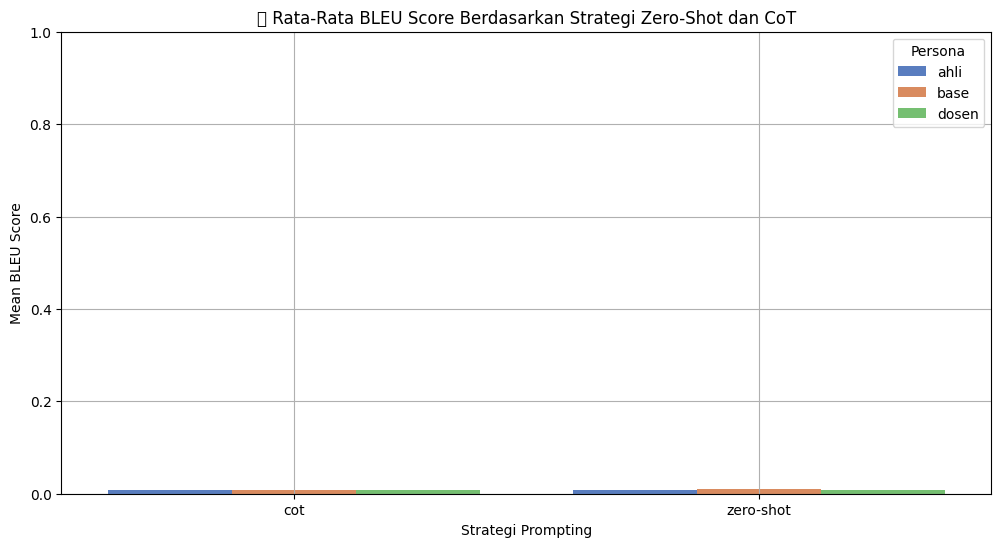

<ipython-input-16-4a802042aadf>:42: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("rouge_l_score_comparison_zero_cot.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


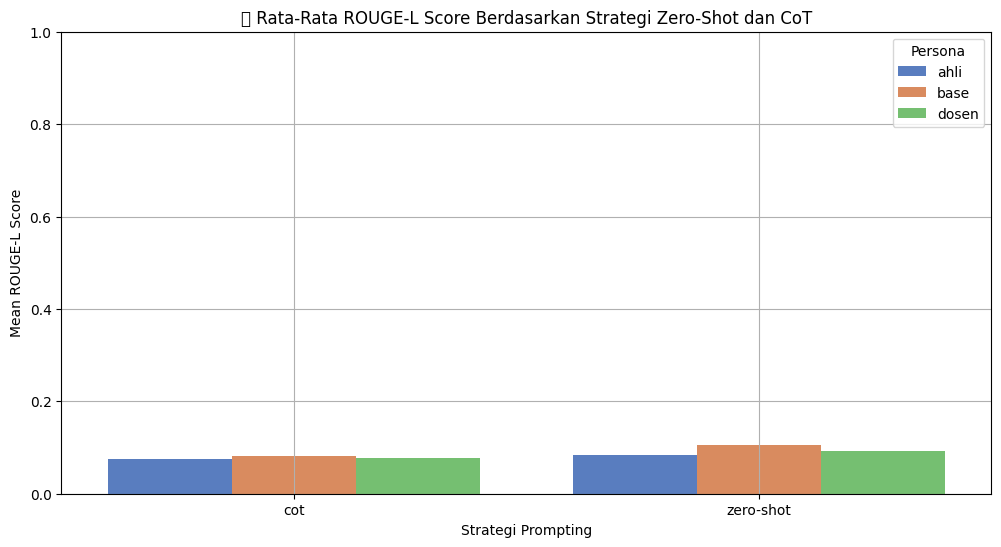

<ipython-input-16-4a802042aadf>:60: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("meteor_score_comparison_zero_cot.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


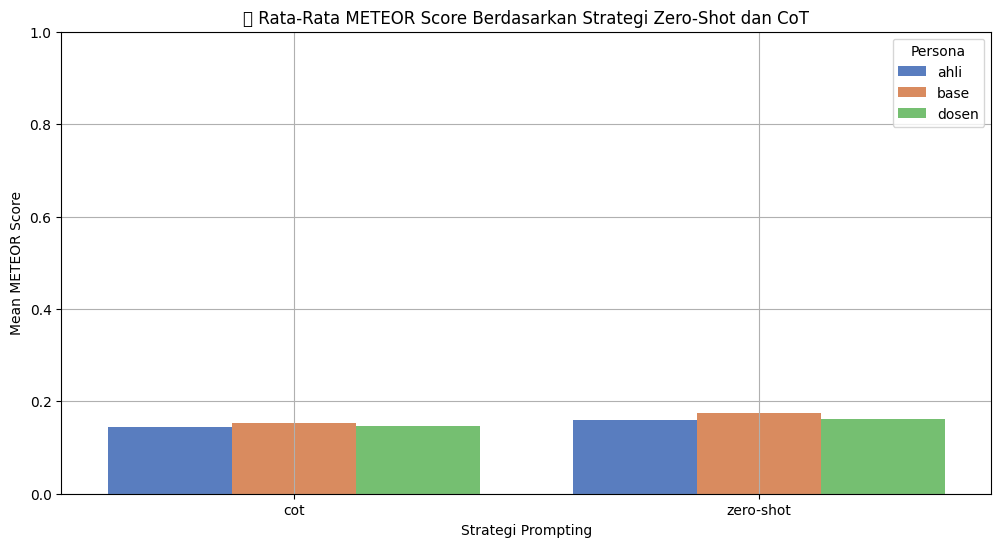

<ipython-input-16-4a802042aadf>:78: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("bert_score_comparison_zero_cot.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


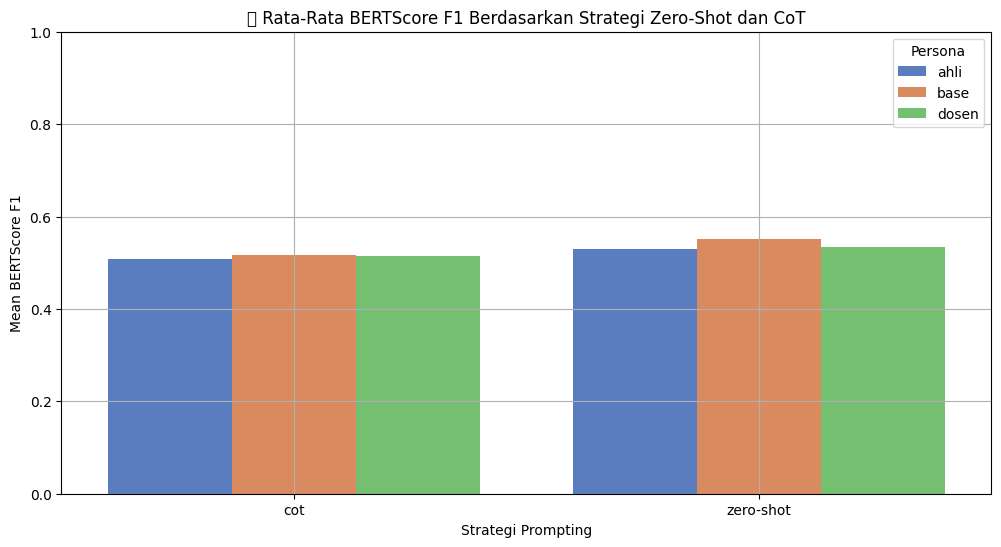

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------------------
# 1. Hitung Mean Skor untuk Setiap Strategi dan Persona
# -------------------------------------------------
df_mean_metrics = df_results[df_results["Strategy"].isin(["zero-shot", "cot"])].groupby(["Strategy", "Persona"])[["BLEU", "ROUGE_L", "METEOR", "BERTScore_F1"]].mean().reset_index()

# -------------------------------------------------
# 2. Visualisasi Mean BLEU Score
# -------------------------------------------------
plt.figure(figsize=(12, 6))
sns.barplot(x="Strategy", y="BLEU", hue="Persona", data=df_mean_metrics, palette="muted")

# Label dan Judul
plt.title("📊 Rata-Rata BLEU Score Berdasarkan Strategi Zero-Shot dan CoT")
plt.xlabel("Strategi Prompting")
plt.ylabel("Mean BLEU Score")
plt.ylim(0, 1)
plt.legend(title="Persona")
plt.grid(True)

# Simpan dan Tampilkan
plt.savefig("bleu_score_comparison_zero_cot.png")
plt.show()

# -------------------------------------------------
# 3. Visualisasi Mean ROUGE-L Score
# -------------------------------------------------
plt.figure(figsize=(12, 6))
sns.barplot(x="Strategy", y="ROUGE_L", hue="Persona", data=df_mean_metrics, palette="muted")

# Label dan Judul
plt.title("📊 Rata-Rata ROUGE-L Score Berdasarkan Strategi Zero-Shot dan CoT")
plt.xlabel("Strategi Prompting")
plt.ylabel("Mean ROUGE-L Score")
plt.ylim(0, 1)
plt.legend(title="Persona")
plt.grid(True)

# Simpan dan Tampilkan
plt.savefig("rouge_l_score_comparison_zero_cot.png")
plt.show()

# -------------------------------------------------
# 4. Visualisasi Mean METEOR Score
# -------------------------------------------------
plt.figure(figsize=(12, 6))
sns.barplot(x="Strategy", y="METEOR", hue="Persona", data=df_mean_metrics, palette="muted")

# Label dan Judul
plt.title("📊 Rata-Rata METEOR Score Berdasarkan Strategi Zero-Shot dan CoT")
plt.xlabel("Strategi Prompting")
plt.ylabel("Mean METEOR Score")
plt.ylim(0, 1)
plt.legend(title="Persona")
plt.grid(True)

# Simpan dan Tampilkan
plt.savefig("meteor_score_comparison_zero_cot.png")
plt.show()

# -------------------------------------------------
# 5. Visualisasi Mean BERTScore F1
# -------------------------------------------------
plt.figure(figsize=(12, 6))
sns.barplot(x="Strategy", y="BERTScore_F1", hue="Persona", data=df_mean_metrics, palette="muted")

# Label dan Judul
plt.title("📊 Rata-Rata BERTScore F1 Berdasarkan Strategi Zero-Shot dan CoT")
plt.xlabel("Strategi Prompting")
plt.ylabel("Mean BERTScore F1")
plt.ylim(0, 1)
plt.legend(title="Persona")
plt.grid(True)

# Simpan dan Tampilkan
plt.savefig("bert_score_comparison_zero_cot.png")
plt.show()


<ipython-input-17-3078c886bd41>:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("bleu_boxplot_zero_cot.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


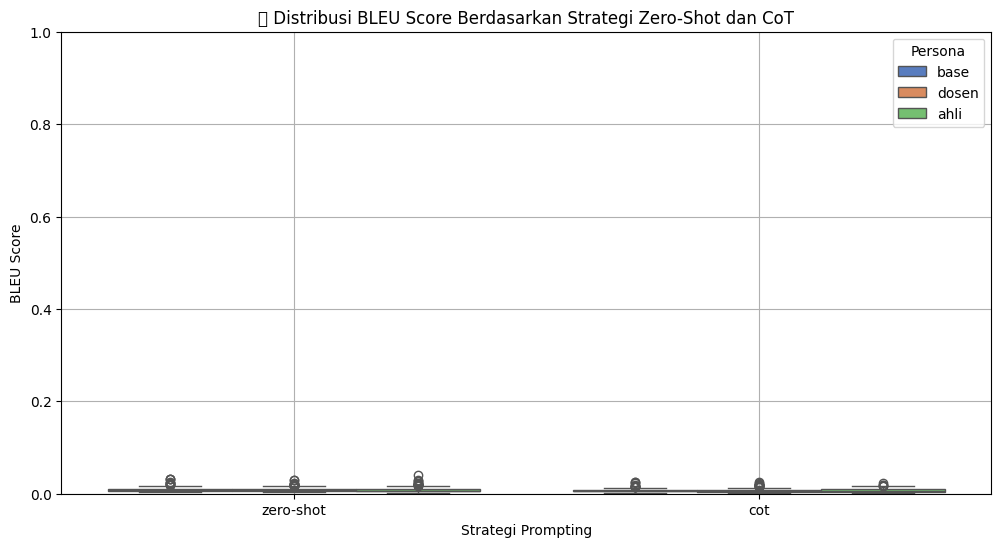

<ipython-input-17-3078c886bd41>:42: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("rouge_l_boxplot_zero_cot.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


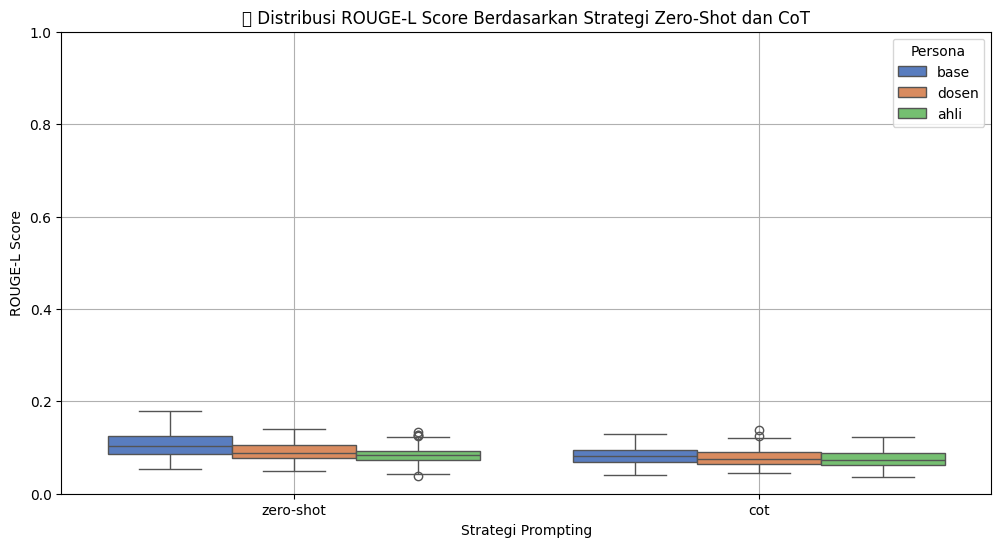

<ipython-input-17-3078c886bd41>:60: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("meteor_boxplot_zero_cot.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


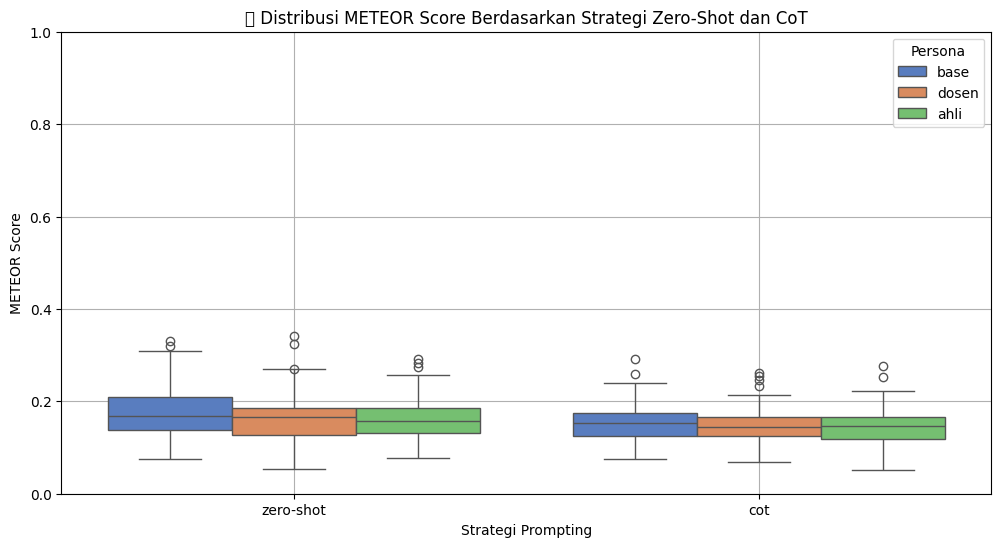

<ipython-input-17-3078c886bd41>:78: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("bert_score_boxplot_zero_cot.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


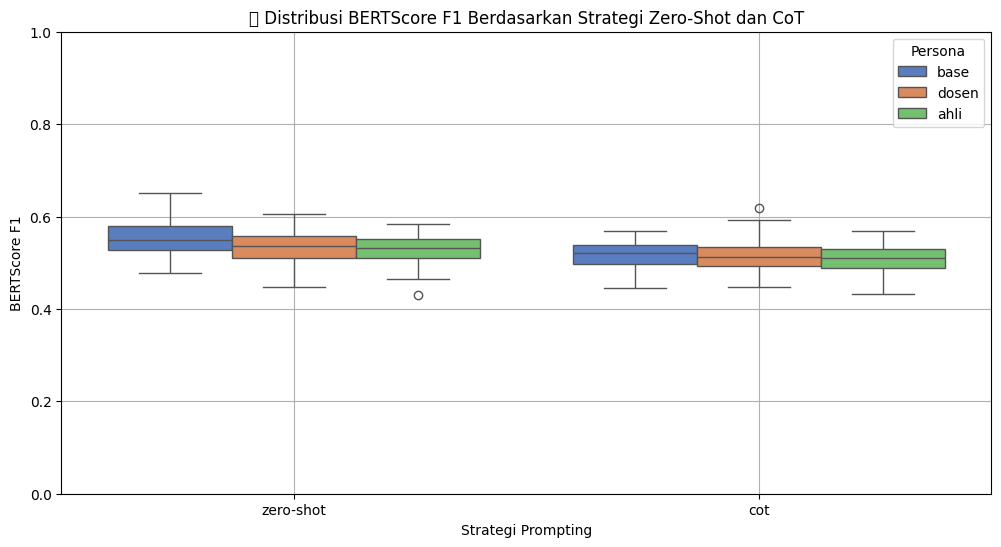

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------------------
# 1. Filter Data untuk Zero-Shot dan CoT
# -------------------------------------------------
df_filtered = df_results[df_results["Strategy"].isin(["zero-shot", "cot"])]

# -------------------------------------------------
# 2. Visualisasi Box Plot BLEU Score
# -------------------------------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(x="Strategy", y="BLEU", hue="Persona", data=df_filtered, palette="muted")

# Label dan Judul
plt.title("📊 Distribusi BLEU Score Berdasarkan Strategi Zero-Shot dan CoT")
plt.xlabel("Strategi Prompting")
plt.ylabel("BLEU Score")
plt.ylim(0, 1)
plt.legend(title="Persona")
plt.grid(True)

# Simpan dan Tampilkan
plt.savefig("bleu_boxplot_zero_cot.png")
plt.show()

# -------------------------------------------------
# 3. Visualisasi Box Plot ROUGE-L Score
# -------------------------------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(x="Strategy", y="ROUGE_L", hue="Persona", data=df_filtered, palette="muted")

# Label dan Judul
plt.title("📊 Distribusi ROUGE-L Score Berdasarkan Strategi Zero-Shot dan CoT")
plt.xlabel("Strategi Prompting")
plt.ylabel("ROUGE-L Score")
plt.ylim(0, 1)
plt.legend(title="Persona")
plt.grid(True)

# Simpan dan Tampilkan
plt.savefig("rouge_l_boxplot_zero_cot.png")
plt.show()

# -------------------------------------------------
# 4. Visualisasi Box Plot METEOR Score
# -------------------------------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(x="Strategy", y="METEOR", hue="Persona", data=df_filtered, palette="muted")

# Label dan Judul
plt.title("📊 Distribusi METEOR Score Berdasarkan Strategi Zero-Shot dan CoT")
plt.xlabel("Strategi Prompting")
plt.ylabel("METEOR Score")
plt.ylim(0, 1)
plt.legend(title="Persona")
plt.grid(True)

# Simpan dan Tampilkan
plt.savefig("meteor_boxplot_zero_cot.png")
plt.show()

# -------------------------------------------------
# 5. Visualisasi Box Plot BERTScore F1
# -------------------------------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(x="Strategy", y="BERTScore_F1", hue="Persona", data=df_filtered, palette="muted")

# Label dan Judul
plt.title("📊 Distribusi BERTScore F1 Berdasarkan Strategi Zero-Shot dan CoT")
plt.xlabel("Strategi Prompting")
plt.ylabel("BERTScore F1")
plt.ylim(0, 1)
plt.legend(title="Persona")
plt.grid(True)

# Simpan dan Tampilkan
plt.savefig("bert_score_boxplot_zero_cot.png")
plt.show()


In [ ]:
import pandas as pd


In [ ]:
df_result1 = pd.read_csv("/content/drive/MyDrive/Skripsi/Result/result1.csv")


In [ ]:
df_result1

Question  \
0    Jelaskan perbedaan antara iterative searching ...   
1    Jelaskan perbedaan antara iterative searching ...   
2    Jelaskan perbedaan antara iterative searching ...   
3    Jelaskan perbedaan antara iterative searching ...   
4    Jelaskan perbedaan antara iterative searching ...   
..                                                 ...   
769  Jelaskan perbedaan antara iterative searching ...   
770  Jelaskan perbedaan antara iterative searching ...   
771  Jelaskan perbedaan antara iterative searching ...   
772  Jelaskan perbedaan antara iterative searching ...   
773  Jelaskan perbedaan antara iterative searching ...   

                                               Jawaban Persona   Strategy  \
0    Iterative searching memberikan nilai awal seda...    base  zero-shot   
1    Iterative searching memberikan nilai awal seda...   dosen  zero-shot   
2    Iterative searching memberikan nilai awal seda...    ahli  zero-shot   
3    Iterative searching memberikan nilai awal seda...    base        cot   
4    Iterative searching memberikan nilai awal seda...   dosen        cot   
..                                                 ...     ...        ...   
769  Perbedaan antara iteratif search dan non itera...   dosen  zero-shot   
770  Perbedaan antara iteratif search dan non itera...    ahli  zero-shot   
771  Perbedaan antara iteratif search dan non itera...    base        cot   
772  Perbedaan antara iteratif search dan non itera...   dosen        cot   
773  Perbedaan antara iteratif search dan non itera...    ahli        cot   

                                     GeneratedFeedback      BLEU   ROUGE_L  \
0    Berikut adalah feedback saya untuk jawaban mah...  0.002753  0.085603   
1    Berikut adalah feedback yang Anda minta:\n\n**...  0.005108  0.091667   
2    **Evaluasi Jawaban Mahasiswa**\n\nJawaban maha...  0.006493  0.087500   
3    **Evaluasi Ketepatan Konsep (1):**\n\nPertanya...  0.002784  0.087912   
4    Berikut adalah analisis bertahap untuk jawaban...  0.002299  0.063492   
..                                                 ...       ...       ...   
769  Berikut adalah feedback yang Anda minta:\n\n**...  0.012492  0.105727   
770  Berikut adalah feedback saya terhadap jawaban ...  0.003010  0.090278   
771  Baiklah, saya akan memberikan feedback dengan ...  0.005800  0.094595   
772  Baiklah, mari kita evaluasi jawaban mahasiswa ...  0.004706  0.086093   
773  Berikut adalah analisis jawaban mahasiswa deng...  0.004882  0.108108   

       METEOR  BERTScore_F1  
0    0.121359      0.491194  
1    0.150376      0.477734  
2    0.164324      0.464990  
3    0.170404      0.493538  
4    0.126582      0.471175  
..        ...           ...  
769  0.203397      0.595394  
770  0.119454      0.558298  
771  0.123967      0.552600  
772  0.107438      0.566883  
773  0.139923      0.565597  

[774 rows x 9 columns]

In [ ]:
df_mpi = pd.read_excel('/content/drive/MyDrive/Skripsi/Dataset/mpi.xlsx')

In [ ]:
df_mpi

Jawaban  \
0   Baik itu  Research Question (RQ) maupun Resear...   
1   Research Question (rumusan masalah) adalah per...   
2   reswarch question merupakan tulisan-tulisan si...   
3   RESEARCH QUESTION (RUMUSAN MASALAH) adalah das...   
4   Research question (rumusan masalah) merupakan ...   
..                                                ...   
86  Research Question (rumusan masalah)\n\nMenjela...   
87  Research Question merupakan pencarian masalah ...   
88  Research Question (rumusan masalah)\n\n-pada u...   
89  RESEARCH QUESTION (RUMUSAN MASALAH) adalah bag...   
90  *\nRumusan Masalah (Research Question):\n\n– B...   

                                             Feedback  
0   Jawaban kamu sangat benar. Kamu memberikan pen...  
1   Jawaban kamu sangat benar. Kamu memberikan pen...  
2   Jawaban kamu hampir benar. Penjelasan kamu ten...  
3   Jawaban kamu hampir benar. Penjelasan kamu ten...  
4   Jawaban kamu sedikit salah karena penjelasan k...  
..                                                ...  
86  Jawaban kamu sangat salah, karena penjelasan k...  
87  Jawaban kamu sangat salah, karena penjelasan k...  
88  Jawaban kamu sangat salah. Kamu tidak memberik...  
89  Jawaban kamu sangat salah. Kamu tidak memberik...  
90  Jawaban kamu sangat salah. Kamu tidak memberik...  

[91 rows x 2 columns]

In [ ]:
# -------------------------------------------------
# 4. Loop untuk Generate Feedback dan Evaluasi
# -------------------------------------------------
strategies = ["zero-shot", "cot"]
personas = ["base", "dosen", "ahli"]

all_results = []

for i, row in tqdm(df_siscer.iterrows(), total=df_siscer.shape[0], desc="Processing Feedback"):
    mata_kuliah = "sistem_cerdas"
    question = "Jelaskan perbedaan antara iterative searching dan non iterative searching"
    student_answer = str(row["jawaban"])
    reference_feedback = str(row["feedback"])

    for strategy in strategies:
        for persona in personas:
            generated_feedback = generate_feedback_ollama(mata_kuliah, persona, strategy, question, student_answer)
            scores = evaluate_feedback(generated_feedback, reference_feedback)

            all_results.append({
                "Question": question,
                "Jawaban": student_answer,
                "Persona": persona,
                "Strategy": strategy,
                "GeneratedFeedback": generated_feedback,
                "BLEU": scores["BLEU"],
                "ROUGE_L": scores["ROUGE_L"],
                "METEOR": scores["METEOR"],
                "BERTScore_F1": scores["BERTScore_F1"]
            })

# Konversi hasil ke DataFrame
df_results = pd.DataFrame(all_results)

In [ ]:
'/content/drive/MyDrive/Skripsi/Dataset/mpi.xlsx'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from rapidfuzz import process, fuzz

# Load data
quiz_df = pd.read_excel('/content/drive/MyDrive/Skripsi/benerin/MPI.xlsx')
ref_df = pd.read_excel('/content/drive/MyDrive/Skripsi/benerin/feedback.xlsx')

# Fungsi fuzzy matching
def cari_feedback(jawaban):
    match = process.extractOne(jawaban, ref_df['jawaban'], scorer=fuzz.token_sort_ratio)
    if match and match[1] >= 85:  # threshold kemiripan, bisa kamu ubah
        feedback = ref_df.loc[ref_df['jawaban'] == match[0], 'feedback'].values
        return feedback[0] if len(feedback) > 0 else "Feedback tidak ditemukan"
    return "Tidak ada jawaban cocok"

# Terapkan ke semua baris
quiz_df['feedback'] = quiz_df['jawaban'].apply(cari_feedback)

# Simpan ke file baru
quiz_df.to_excel("/content/drive/MyDrive/Skripsi/benerin/hasil_quiz_feedback.xlsx", index=False)

In [ ]:
df_hasil_quiz_feedback = pd.read_excel('/content/drive/MyDrive/Skripsi/benerin/hasil_quiz_feedback.xlsx')

# Analisis

In [ ]:
!pip install -q dataframe_image
!apt install -y poppler-utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/385.7 kB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 MB 56.2 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.8 [186 kB]
Fetched 186 kB in 1s (273 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126109 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.8_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.8) ...
Setting up poppler-utils (22.02.0-2ubuntu0.8) ..

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

In [ ]:
llama_siscer = pd.read_csv('/content/drive/MyDrive/Skripsi/Result/llama_siscer.csv')
llama_mpi = pd.read_csv('/content/drive/MyDrive/Skripsi/Result/llama_mpi.csv')
gpt_mpi = pd.read_csv('/content/drive/MyDrive/Skripsi/Result/gpt_mpi.csv')
gpt_siscer = pd.read_csv('/content/drive/MyDrive/Skripsi/Result/gpt_siscer.csv')

In [ ]:
best_bertscore_per_jawaban.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 2463 to 2543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Strategy           153 non-null    object 
 1   OneShotType        100 non-null    object 
 2   Persona            153 non-null    object 
 3   Question           153 non-null    object 
 4   Jawaban            153 non-null    object 
 5   GeneratedFeedback  153 non-null    object 
 6   Prompt             153 non-null    object 
 7   BLEU               153 non-null    float64
 8   ROUGE_L            153 non-null    float64
 9   METEOR             153 non-null    float64
 10  BERTScore_F1       153 non-null    float64
 11  Model              153 non-null    object 
 12  MataKuliah         153 non-null    object 
dtypes: float64(4), object(9)
memory usage: 16.7+ KB


In [ ]:
best_bertscore_per_jawaban = df_all.loc[df_all.groupby('Jawaban')['BERTScore_F1'].idxmax()]
display(best_bertscore_per_jawaban[['MataKuliah','Question', 'Jawaban', 'GeneratedFeedback']])

MataKuliah                                           Question  \
2463            MPI  Jelaskan selengkap mungkin yang anda ketahui m...   
354   Sistem Cerdas  Jelaskan perbedaan antara iterative searching ...   
2819            MPI  Jelaskan selengkap mungkin yang anda ketahui m...   
2063            MPI  Jelaskan selengkap mungkin yang anda ketahui m...   
5655            MPI  Jelaskan selengkap mungkin yang anda ketahui m...   
...             ...                                                ...   
2169            MPI  Jelaskan selengkap mungkin yang anda ketahui m...   
1810            MPI  Jelaskan selengkap mungkin yang anda ketahui m...   
2252            MPI  Jelaskan selengkap mungkin yang anda ketahui m...   
4077  Sistem Cerdas  Jelaskan perbedaan antara iterative searching ...   
2543            MPI  Jelaskan selengkap mungkin yang anda ketahui m...   

                                                Jawaban  \
2463  *\nRumusan Masalah (Research Question):\n\n– B...   
354   * Iteratif menggunakan FOR, WHILE, DO-WHILE se...   
2819  * Research Question atau rumusan masalah adala...   
2063  * Rumusan masalah atau biasa disebut research ...   
5655  * Yang saya ketahui tentang reasearch question...   
...                                                 ...   
2169  rumusan masalah adalah sebuah rumusan atau tul...   
1810  rumusan masalah digunakkan untuk mengidentifik...   
2252  rumusan masalah merupakan alasan mengapa penel...   
4077   Iterative Searching :\n- Iteratif menggunakan...   
2543   Research question (rumusan masalah) adalah pe...   

                                      GeneratedFeedback  
2463  Berikut adalah feedback yang diberikan untuk j...  
354   Maaf, saya tidak bisa memberikan informasi ata...  
2819  Berikut adalah contoh feedback untuk jawaban m...  
2063  Berikut adalah feedback saya untuk jawaban mah...  
5655  Feedback: Jawaban kamu menunjukkan pemahaman d...  
...                                                 ...  
2169  Pada jawaban mahasiswa Anda, terdapat beberapa...  
1810  Terdapat beberapa kelemahan dalam jawaban maha...  
2252  Saya dengan senang hati memberikan feedback un...  
4077  Feedback: Jawaban kamu menunjukkan pemahaman d...  
2543  Feedback untuk jawaban mahasiswa adalah sebaga...  

[153 rows x 4 columns]

In [ ]:
best_bertscore_per_jawaban[['MataKuliah', 'Question', 'Jawaban', 'GeneratedFeedback']].to_excel("best_bertscore_per_jawaban.xlsx", index=False)

In [ ]:
llama_mpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1911 entries, 0 to 1910
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MataKuliah         1911 non-null   object 
 1   Strategy           1911 non-null   object 
 2   OneShotType        1092 non-null   object 
 3   Persona            1911 non-null   object 
 4   Question           1911 non-null   object 
 5   Jawaban            1911 non-null   object 
 6   GeneratedFeedback  1911 non-null   object 
 7   Prompt             1911 non-null   object 
 8   BLEU               1911 non-null   float64
 9   ROUGE_L            1911 non-null   float64
 10  METEOR             1911 non-null   float64
 11  BERTScore_F1       1911 non-null   float64
dtypes: float64(4), object(8)
memory usage: 179.3+ KB


In [ ]:
gpt_mpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1911 entries, 0 to 1910
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              1911 non-null   object 
 1   MataKuliah         1911 non-null   object 
 2   Strategy           1911 non-null   object 
 3   OneShotType        1092 non-null   object 
 4   Persona            1911 non-null   object 
 5   Question           1911 non-null   object 
 6   Jawaban            1911 non-null   object 
 7   GeneratedFeedback  1911 non-null   object 
 8   Prompt             1911 non-null   object 
 9   BLEU               1911 non-null   float64
 10  ROUGE_L            1911 non-null   float64
 11  METEOR             1911 non-null   float64
 12  BERTScore_F1       1911 non-null   float64
dtypes: float64(4), object(9)
memory usage: 194.2+ KB


In [ ]:
llama_siscer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Strategy           1302 non-null   object 
 1   OneShotType        744 non-null    object 
 2   Persona            1302 non-null   object 
 3   Question           1302 non-null   object 
 4   Jawaban            1302 non-null   object 
 5   GeneratedFeedback  1302 non-null   object 
 6   Prompt             1302 non-null   object 
 7   BLEU               1302 non-null   float64
 8   ROUGE_L            1302 non-null   float64
 9   METEOR             1302 non-null   float64
 10  BERTScore_F1       1302 non-null   float64
dtypes: float64(4), object(7)
memory usage: 112.0+ KB


In [ ]:
# Gabungkan semua hasil ke satu DataFrame
llama_siscer["Model"] = "LLaMA"
llama_siscer["MataKuliah"] = "Sistem Cerdas"

llama_mpi["Model"] = "LLaMA"
llama_mpi["MataKuliah"] = "MPI"

gpt_siscer["Model"] = "GPT-4o"
gpt_siscer["MataKuliah"] = "Sistem Cerdas"

gpt_mpi["Model"] = "GPT-4o"
gpt_mpi["MataKuliah"] = "MPI"

df_all = pd.concat([llama_siscer, llama_mpi, gpt_siscer, gpt_mpi], ignore_index=True)

In [ ]:
df_all.to_excel("evaluasi_all.xlsx", index=False)

In [ ]:
62*42

2604

In [ ]:
2604+3822

6426

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6426 entries, 0 to 6425
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Strategy           6426 non-null   object 
 1   OneShotType        3672 non-null   object 
 2   Persona            6426 non-null   object 
 3   Question           6426 non-null   object 
 4   Jawaban            6426 non-null   object 
 5   GeneratedFeedback  6426 non-null   object 
 6   Prompt             6426 non-null   object 
 7   BLEU               6426 non-null   float64
 8   ROUGE_L            6426 non-null   float64
 9   METEOR             6426 non-null   float64
 10  BERTScore_F1       6426 non-null   float64
 11  Model              6426 non-null   object 
 12  MataKuliah         6426 non-null   object 
dtypes: float64(4), object(9)
memory usage: 652.8+ KB


In [ ]:
df_all.head()

Strategy      OneShotType Persona  \
0  zero-shot              NaN    base   
1        cot              NaN    base   
2   one-shot  one_shot_tinggi    base   
3   one-shot  one_shot_sedang    base   
4   one-shot  one_shot_rendah    base   

                                            Question  \
0  Jelaskan perbedaan antara iterative searching ...   
1  Jelaskan perbedaan antara iterative searching ...   
2  Jelaskan perbedaan antara iterative searching ...   
3  Jelaskan perbedaan antara iterative searching ...   
4  Jelaskan perbedaan antara iterative searching ...   

                                             Jawaban  \
0  Iterative searching memberikan nilai awal seda...   
1  Iterative searching memberikan nilai awal seda...   
2  Iterative searching memberikan nilai awal seda...   
3  Iterative searching memberikan nilai awal seda...   
4  Iterative searching memberikan nilai awal seda...   

                                   GeneratedFeedback  \
0  Terima kasih atas pertanyaan dan jawaban mahas...   
1  Berikut adalah analisis bertahap saya untuk me...   
2  Saya dengan senang hati memberikan feedback un...   
3  Mohon maaf, tapi jawaban kamu masih belum tepa...   
4  Mohon maaf, tetapi jawaban Anda masih belum le...   

                                              Prompt      BLEU   ROUGE_L  \
0  \n\n    Anda adalah asisten AI yang memberikan...  0.004043  0.126984   
1  \n\n    Anda adalah asisten AI yang memberikan...  0.002664  0.080586   
2  \n        \n    Anda adalah asisten AI yang me...  0.013617  0.127168   
3  \n        \n    Anda adalah asisten AI yang me...  0.008809  0.190476   
4  \n        \n    Anda adalah asisten AI yang me...  0.031303  0.183007   

     METEOR  BERTScore_F1  Model     MataKuliah  
0  0.224079      0.542631  LLaMA  Sistem Cerdas  
1  0.156798      0.481142  LLaMA  Sistem Cerdas  
2  0.280463      0.536978  LLaMA  Sistem Cerdas  
3  0.286245      0.543510  LLaMA  Sistem Cerdas  
4  0.430170      0.590135  LLaMA  Sistem Cerdas

In [ ]:
df_all.to_csv("evaluasi_all.csv", index=False)

## Hasil Evaluasi Berdasarkan Metrik

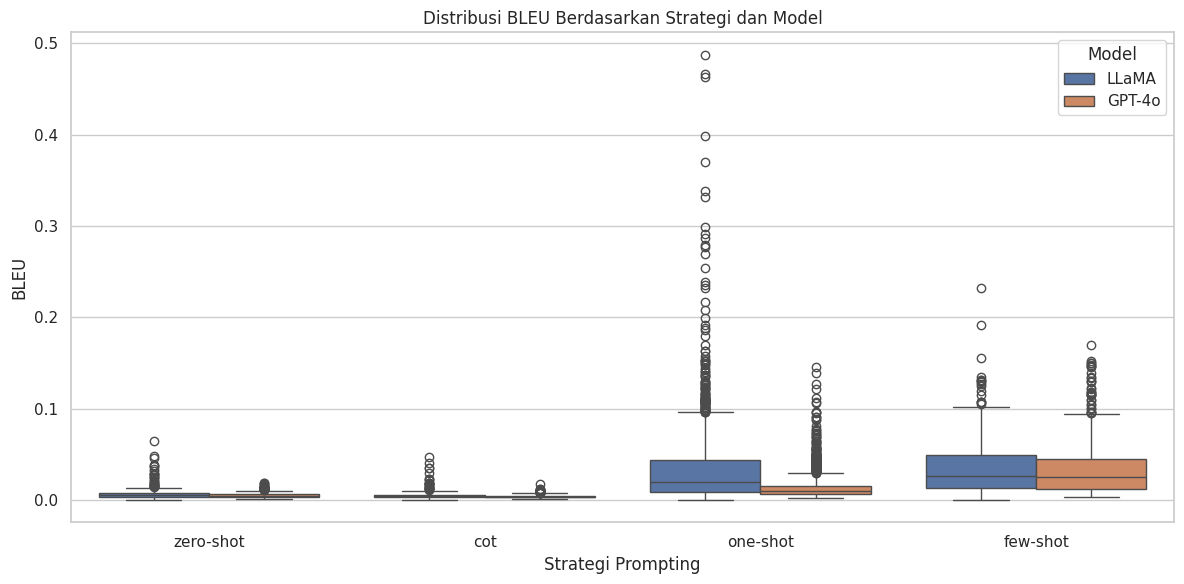

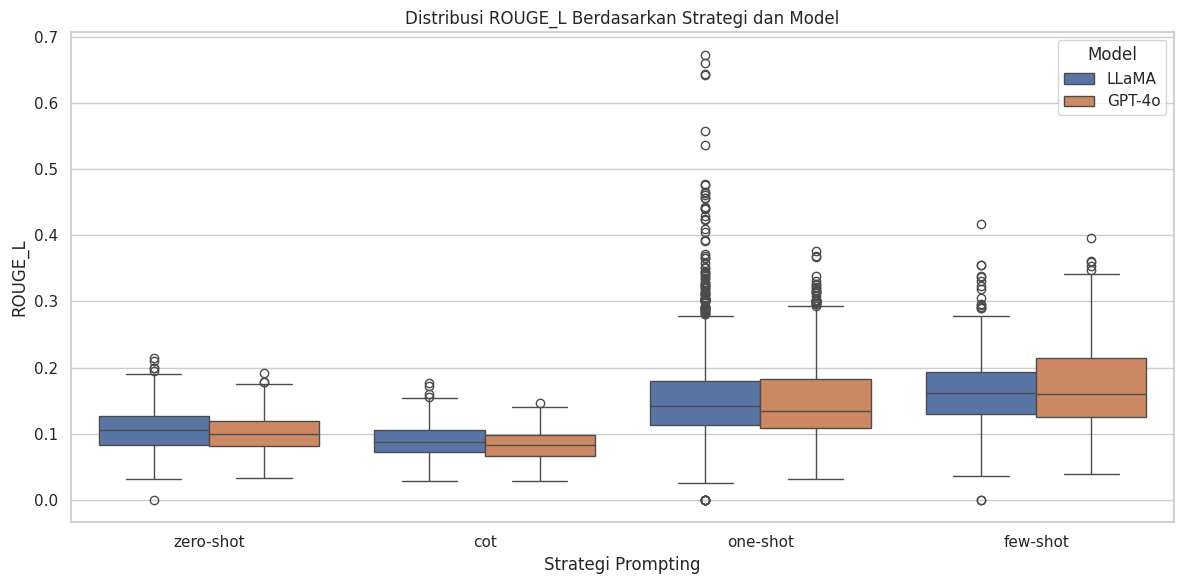

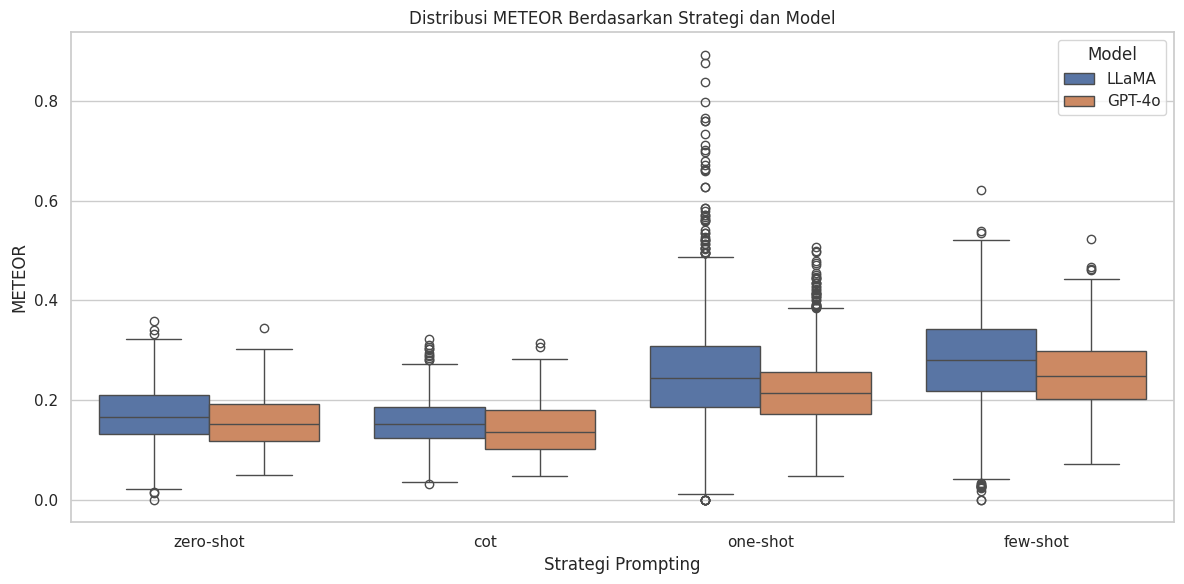

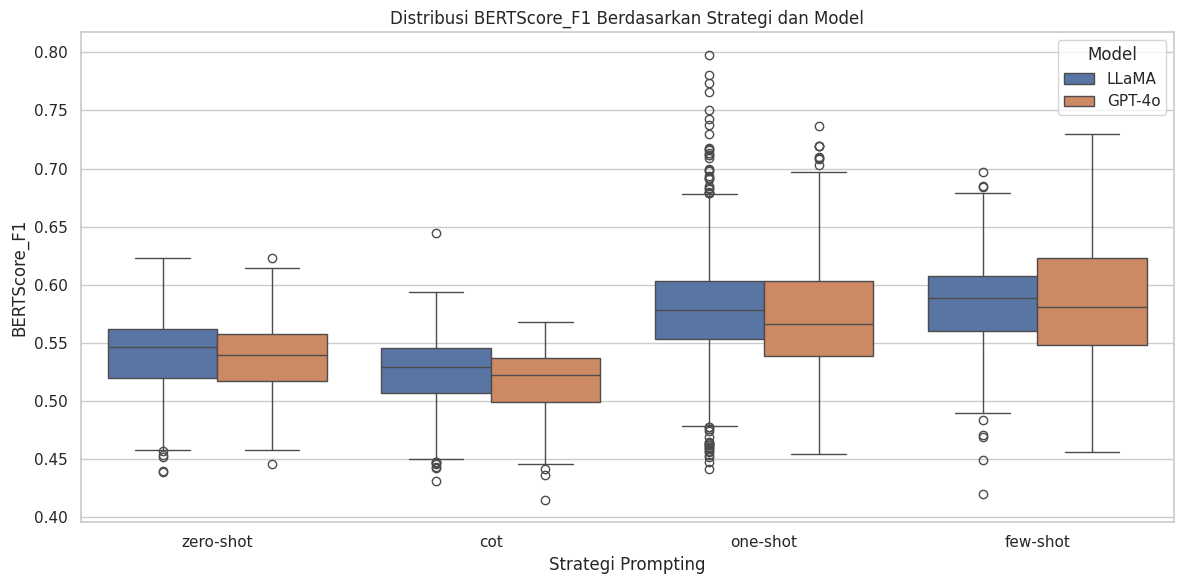

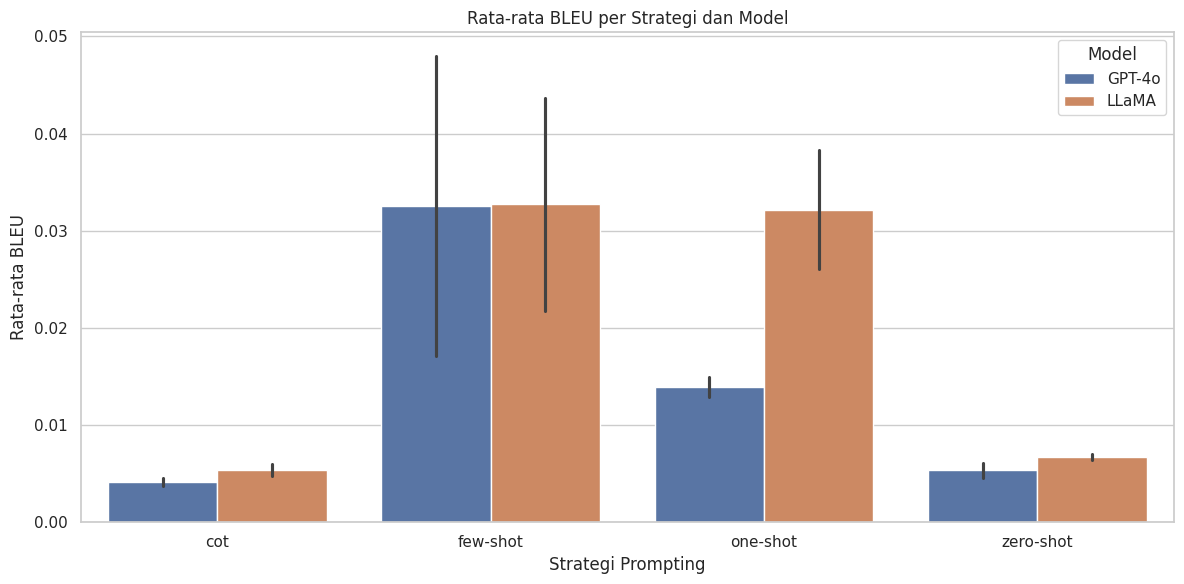

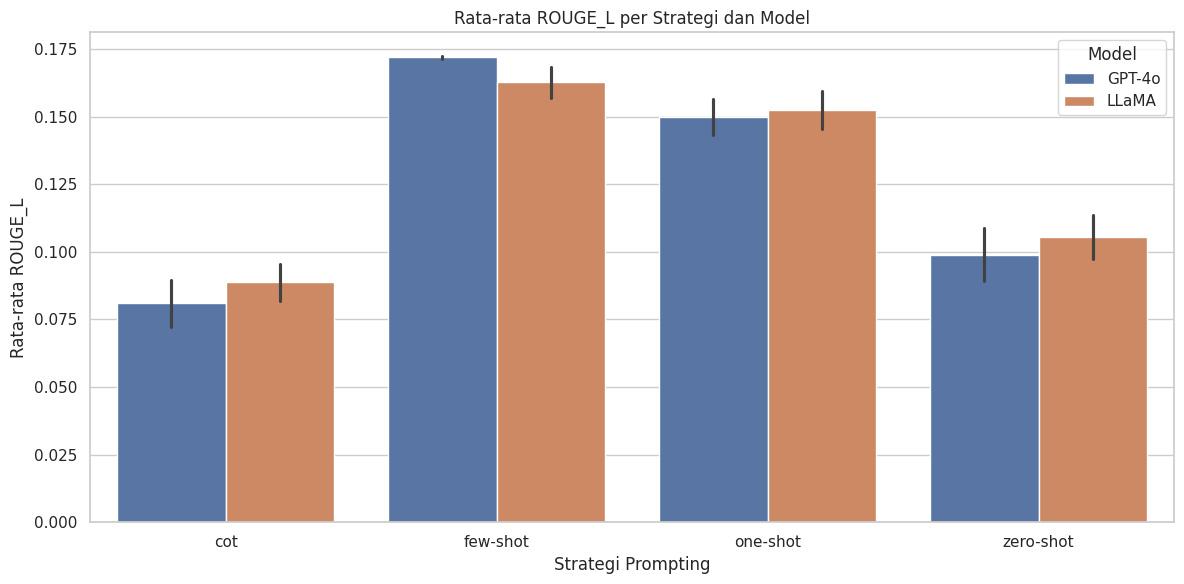

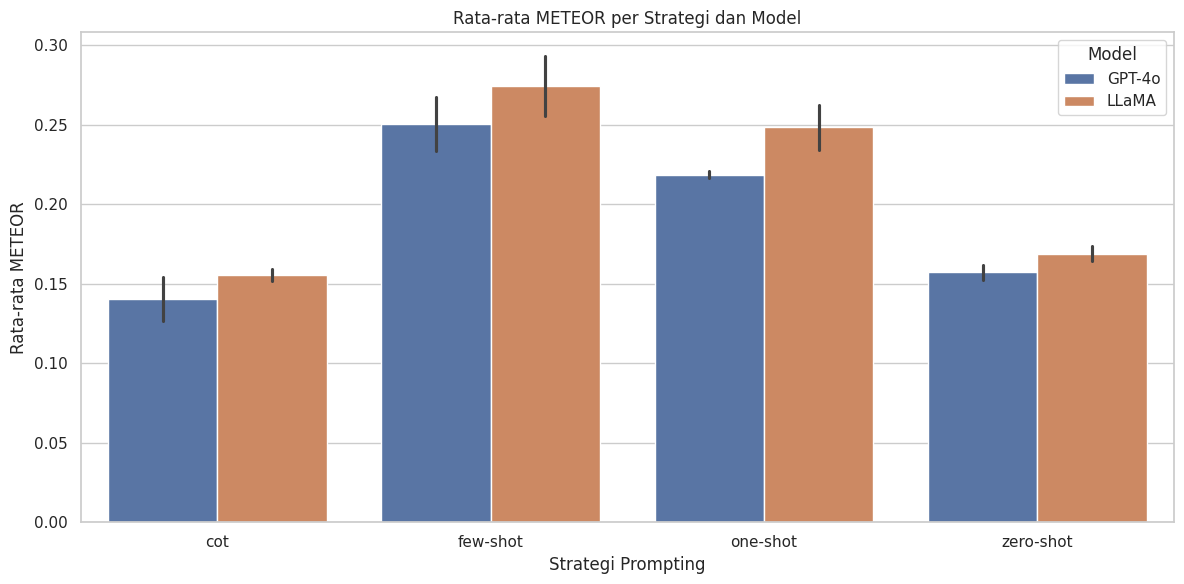

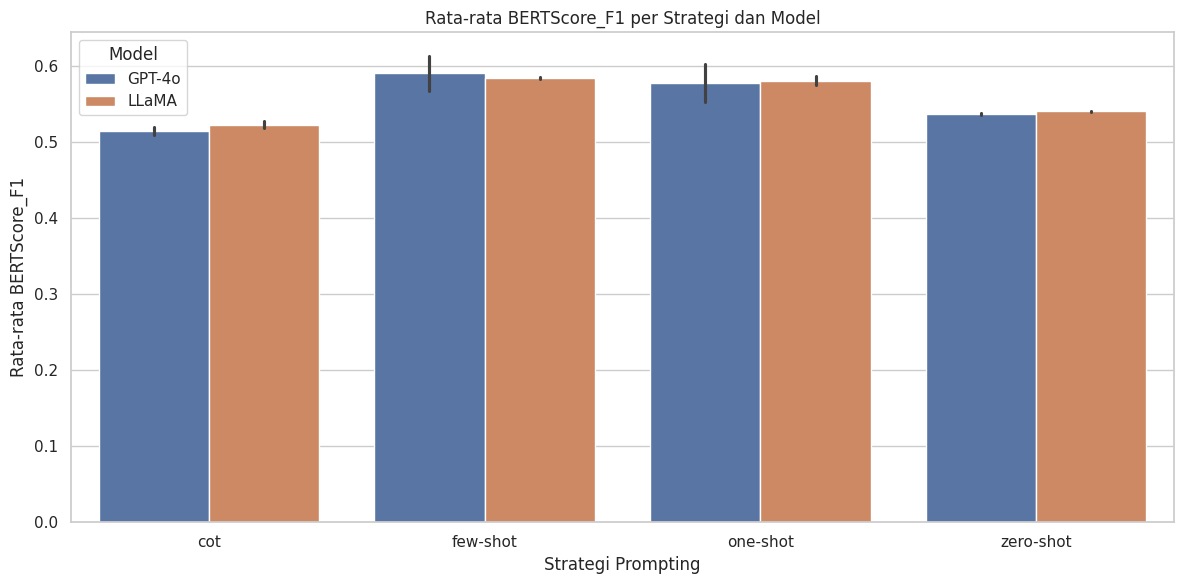

In [ ]:
# List metrik evaluasi
metrics = ["BLEU", "ROUGE_L", "METEOR", "BERTScore_F1"]

# Set tema seaborn
sns.set(style="whitegrid")

# Loop untuk boxplot per metrik
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_all, x="Strategy", y=metric, hue="Model")
    plt.title(f"Distribusi {metric} Berdasarkan Strategi dan Model")
    plt.xlabel("Strategi Prompting")
    plt.ylabel(metric)
    plt.legend(title="Model")
    plt.tight_layout()
    plt.show()

# Loop untuk barplot rata-rata per strategi & model
for metric in metrics:
    plt.figure(figsize=(12, 6))
    avg_df = df_all.groupby(["Strategy", "Model", "MataKuliah"])[metric].mean().reset_index()
    sns.barplot(data=avg_df, x="Strategy", y=metric, hue="Model")
    plt.title(f"Rata-rata {metric} per Strategi dan Model")
    plt.xlabel("Strategi Prompting")
    plt.ylabel(f"Rata-rata {metric}")
    plt.legend(title="Model")
    plt.tight_layout()
    plt.show()

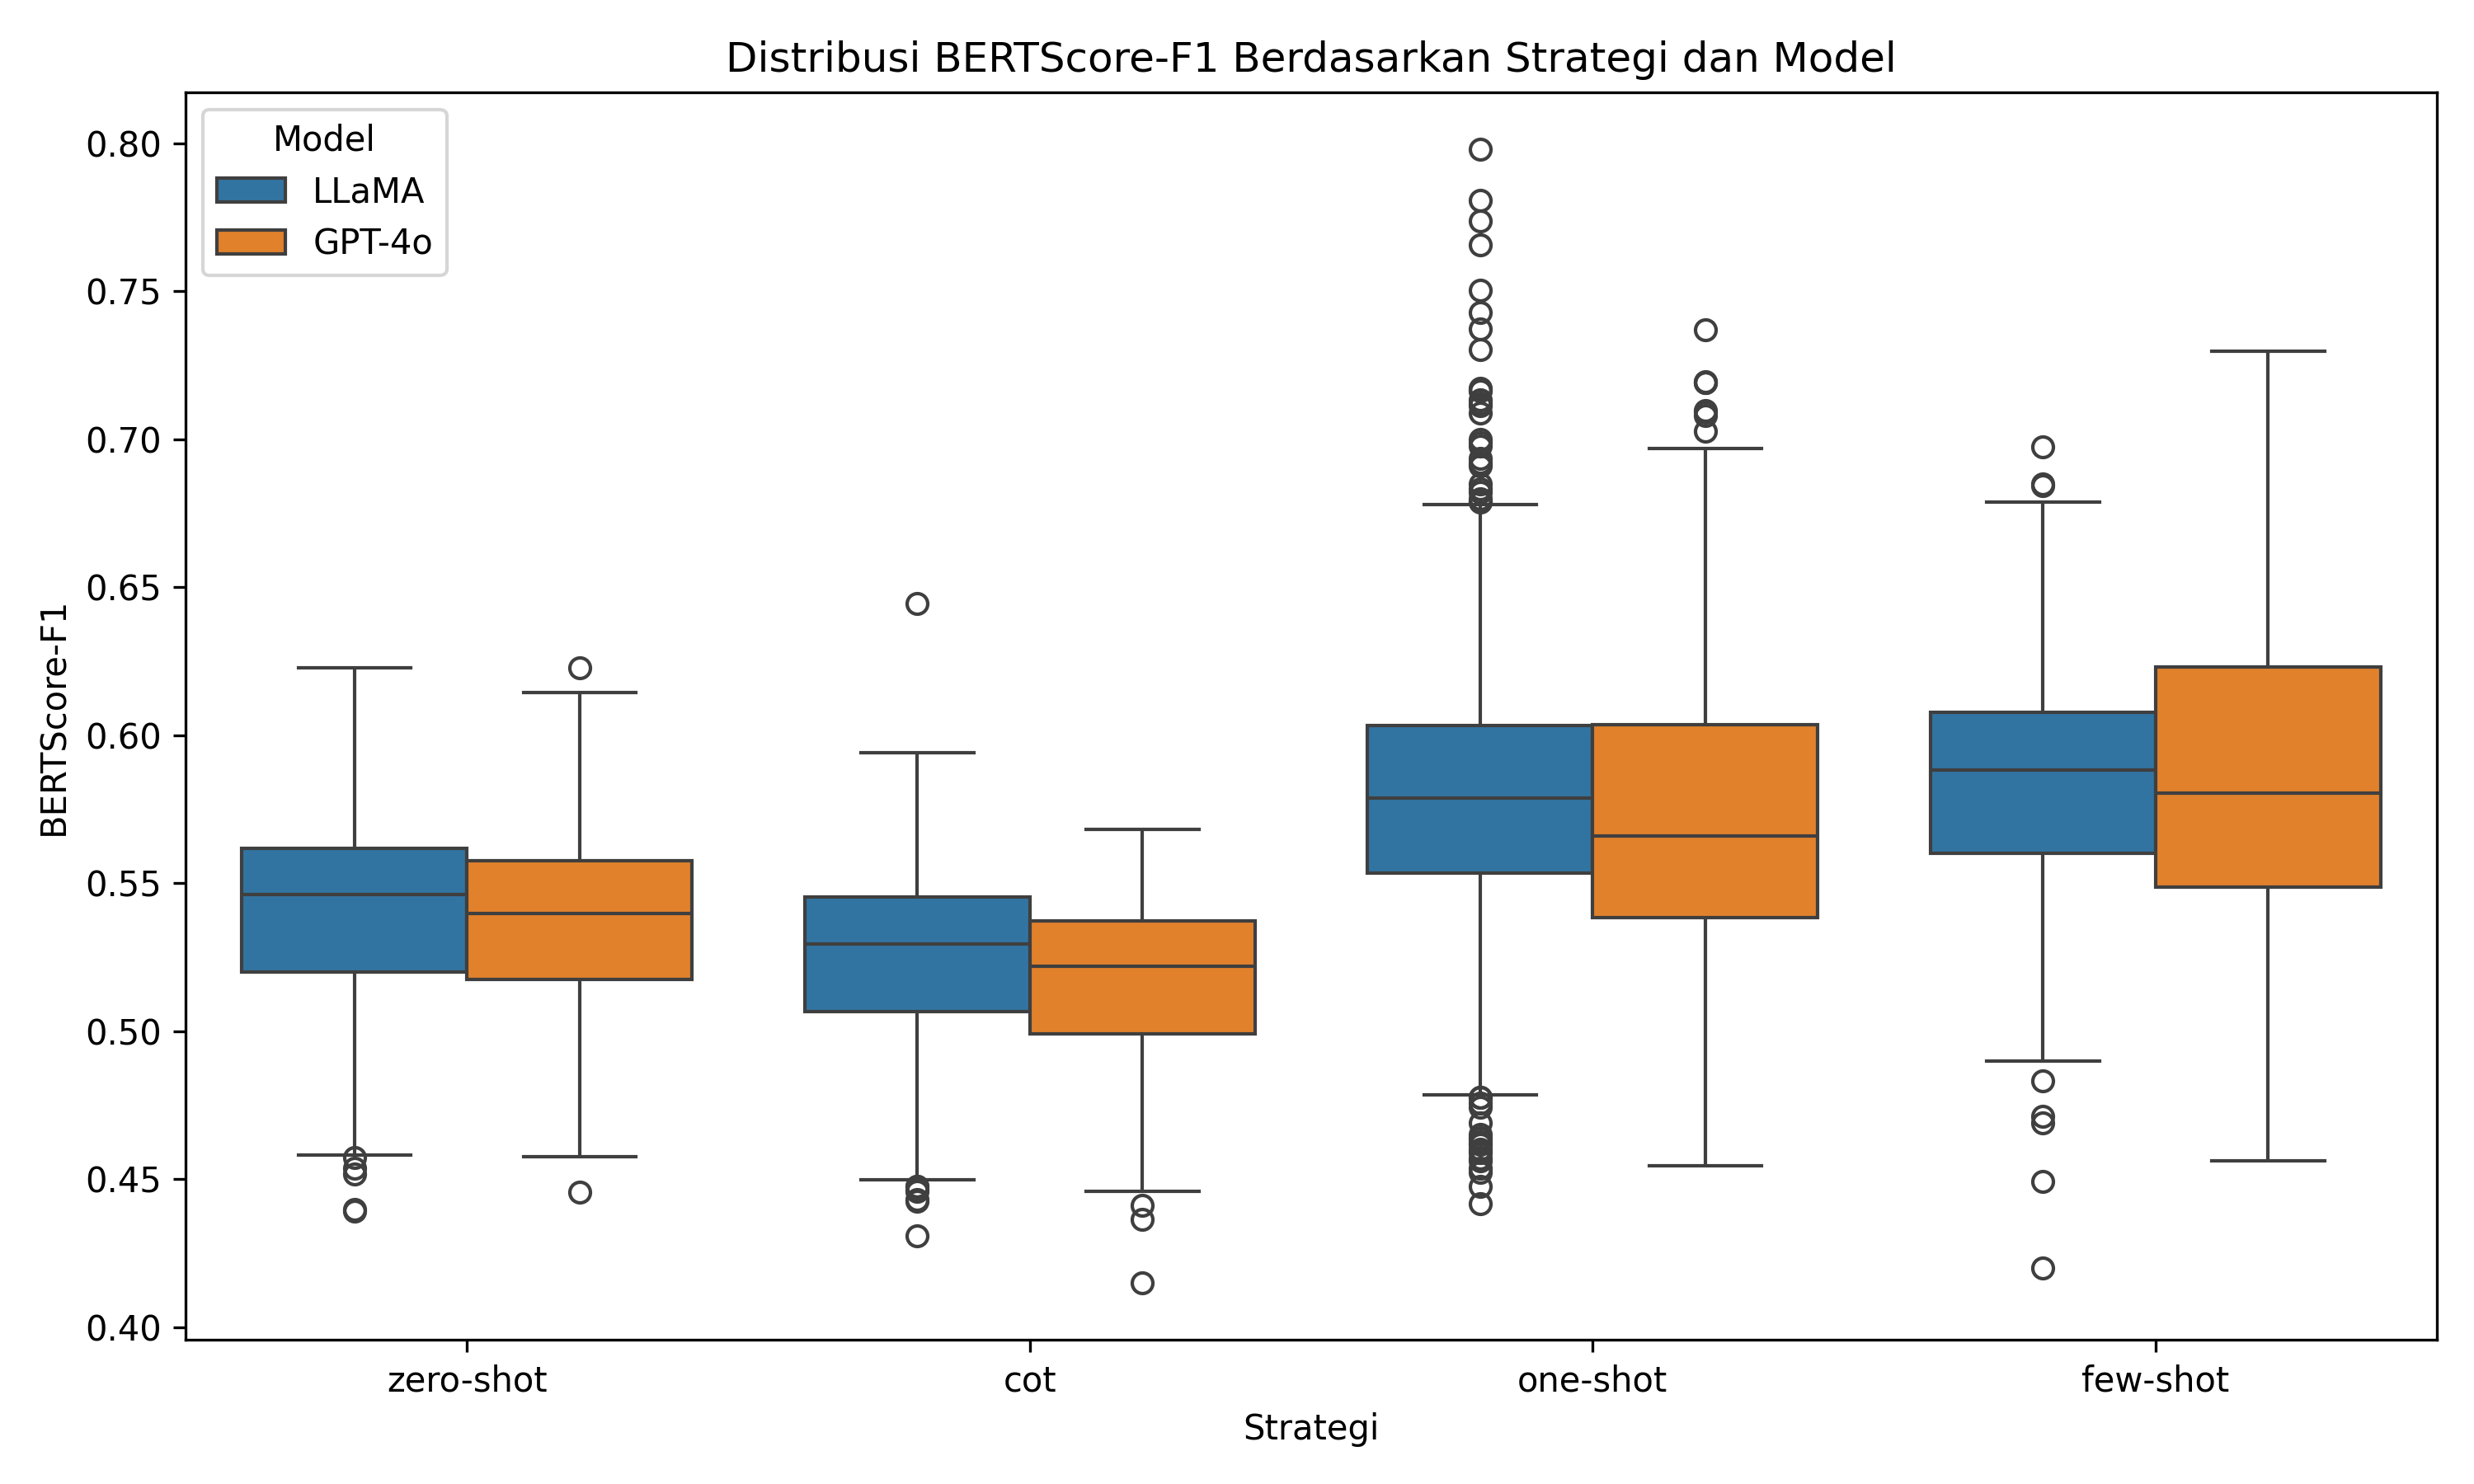

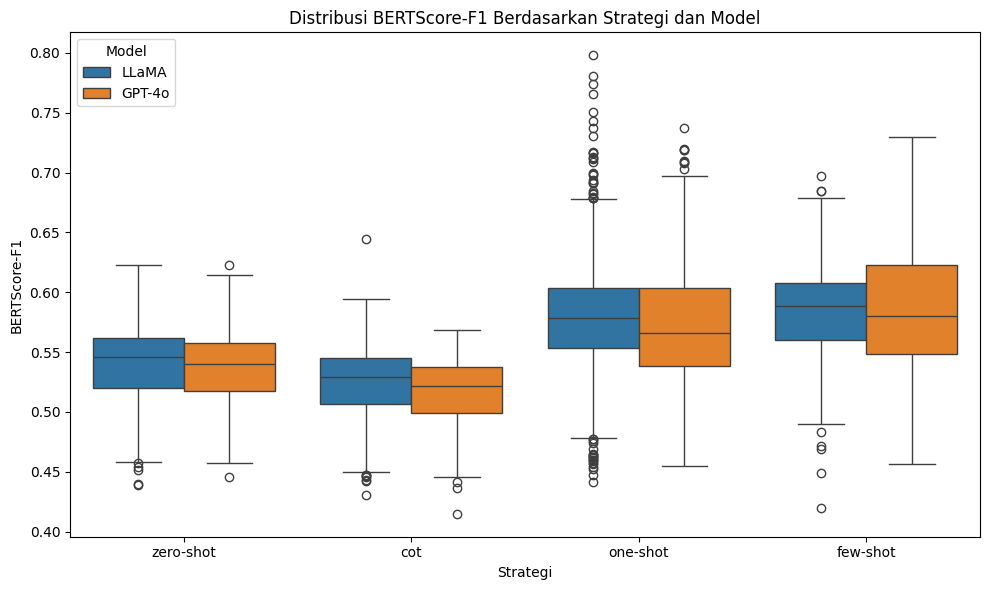

In [ ]:
# Contoh plot
plt.figure(figsize=(10,6))
sns.boxplot(data=df_all, x="Strategy", y="BERTScore_F1", hue="Model")
plt.title("Distribusi BERTScore-F1 Berdasarkan Strategi dan Model")
plt.xlabel("Strategi")
plt.ylabel("BERTScore-F1")
plt.legend(title="Model", loc="upper left")

# Simpan gambar
filename = "bert_score_boxplot.png"
plt.tight_layout()
plt.savefig(filename, dpi=300)

# Tampilkan gambar agar bisa di-*copy* atau di-*klik kanan download*
display(Image(filename=filename))


In [ ]:
# Buat tabel ringkasan performa strategi prompting
summary = df_all.groupby("Strategy")[metrics].mean().reset_index()

# Urutkan berdasarkan satu metrik utama, misalnya BERTScore
summary_sorted = summary.sort_values(by="BERTScore_F1", ascending=False)

# Tampilkan hasil
print("📊 Rata-rata Skor Evaluasi per Strategi Prompting")
summary_sorted.style.background_gradient(cmap="Blues")


📊 Rata-rata Skor Evaluasi per Strategi Prompting


In [ ]:
# Hitung rata-rata per persona
summary_persona = df_all.groupby("Persona")[metrics].mean().reset_index()

# Urutkan berdasarkan salah satu metrik, misalnya BERTScore_F1 tertinggi
summary_persona_sorted = summary_persona.sort_values(by="BERTScore_F1", ascending=False)

# Tampilkan dengan format dan gradien
summary_persona_styled = summary_persona_sorted.style \
    .background_gradient(cmap="YlGnBu", subset=metrics) \
    .format("{:.4f}", subset=metrics)

summary_persona_styled


In [ ]:
# Hitung rata-rata skor untuk tiap kombinasi persona + strategi
summary_combo = df_all.groupby(["Persona", "Strategy"])[metrics].mean().reset_index()
summary_combo.head()

Persona   Strategy      BLEU   ROUGE_L    METEOR  BERTScore_F1
0    ahli        cot  0.004142  0.079896  0.144722      0.514320
1    ahli   few-shot  0.023813  0.130961  0.236498      0.561221
2    ahli   one-shot  0.016864  0.118551  0.214512      0.554453
3    ahli  zero-shot  0.005259  0.091062  0.152356      0.526605
4    base        cot  0.005558  0.096679  0.159867      0.525782

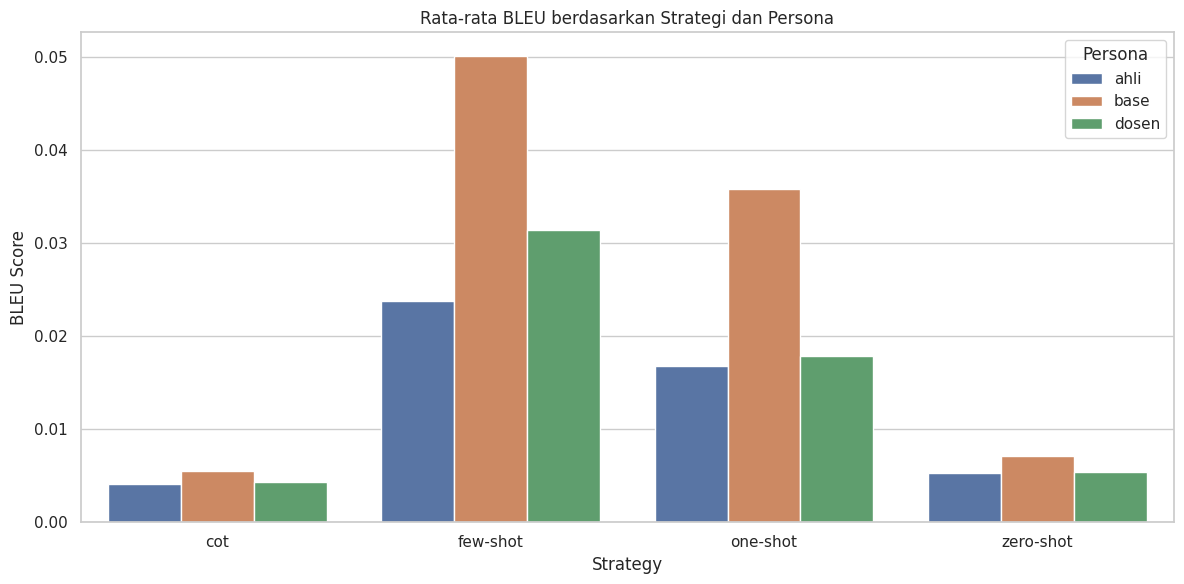

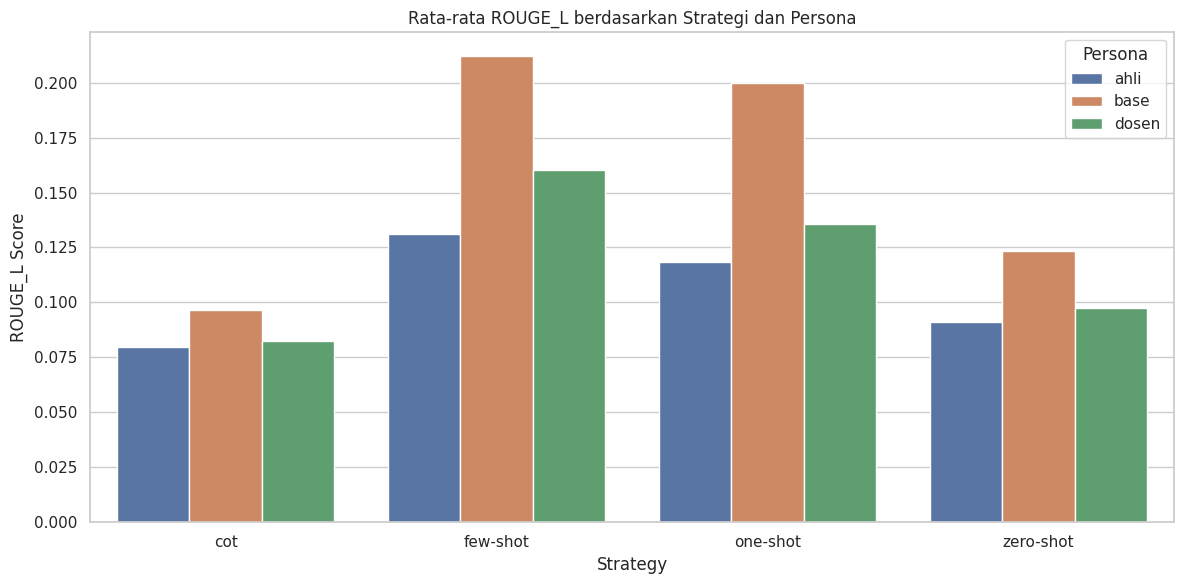

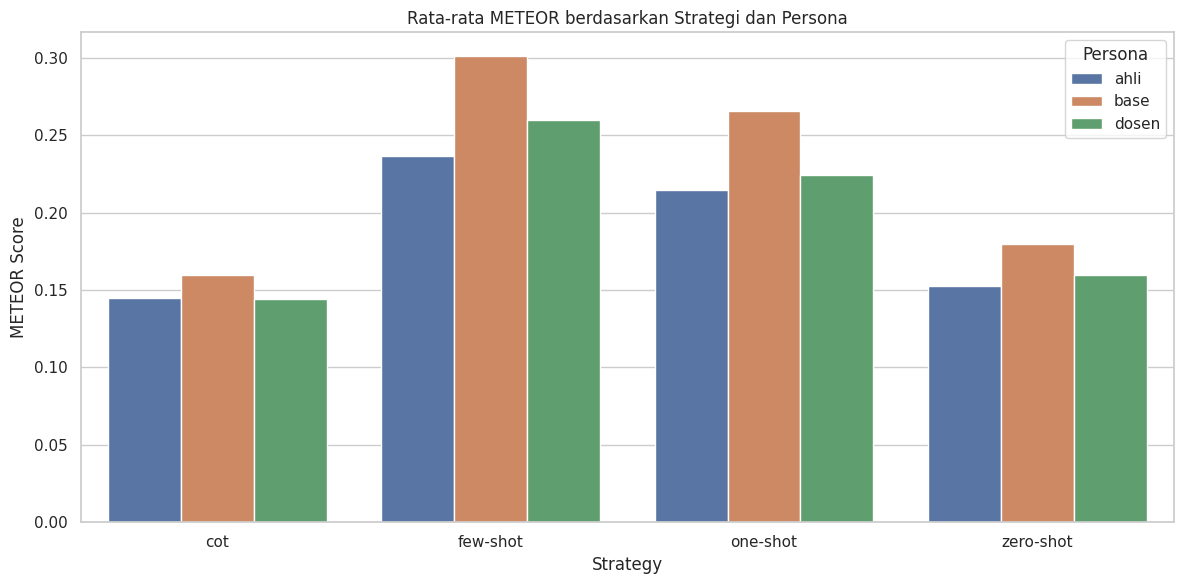

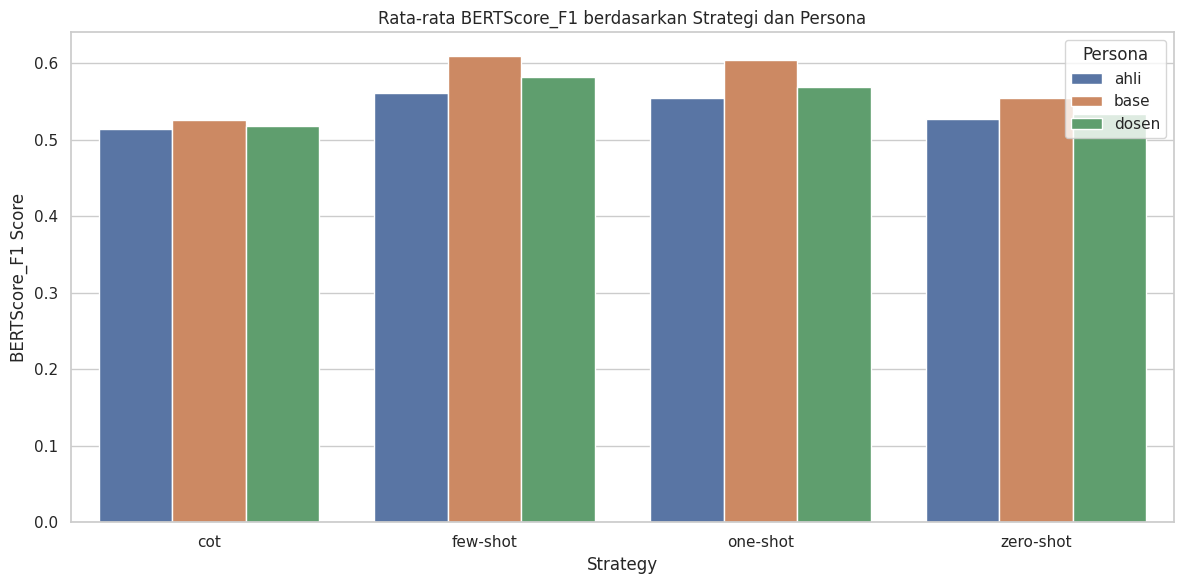

In [ ]:
# Ubah ke format long agar bisa divisualisasikan
melted_combo = summary_combo.melt(
    id_vars=["Persona", "Strategy"],
    value_vars=metrics,
    var_name="Metrik",
    value_name="Skor"
)

# Buat barplot untuk masing-masing metrik
for metric in metrics:
    plt.figure(figsize=(12, 6))
    subset = melted_combo[melted_combo["Metrik"] == metric]
    sns.barplot(data=subset, x="Strategy", y="Skor", hue="Persona")
    plt.title(f"Rata-rata {metric} berdasarkan Strategi dan Persona")
    plt.ylabel(f"{metric} Score")
    plt.tight_layout()
    plt.show()


<ipython-input-25-fd6095532690>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="Kombinasi", y=metric, palette="Set3")


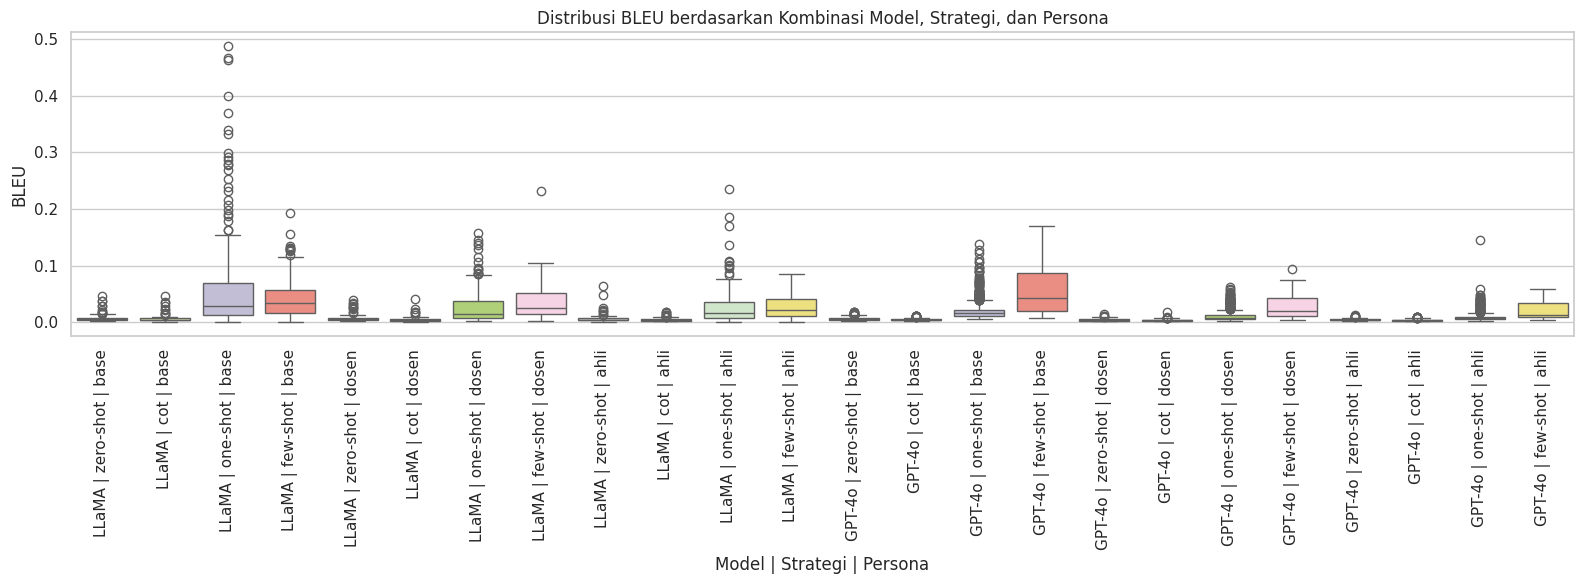

<ipython-input-25-fd6095532690>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="Kombinasi", y=metric, palette="Set3")


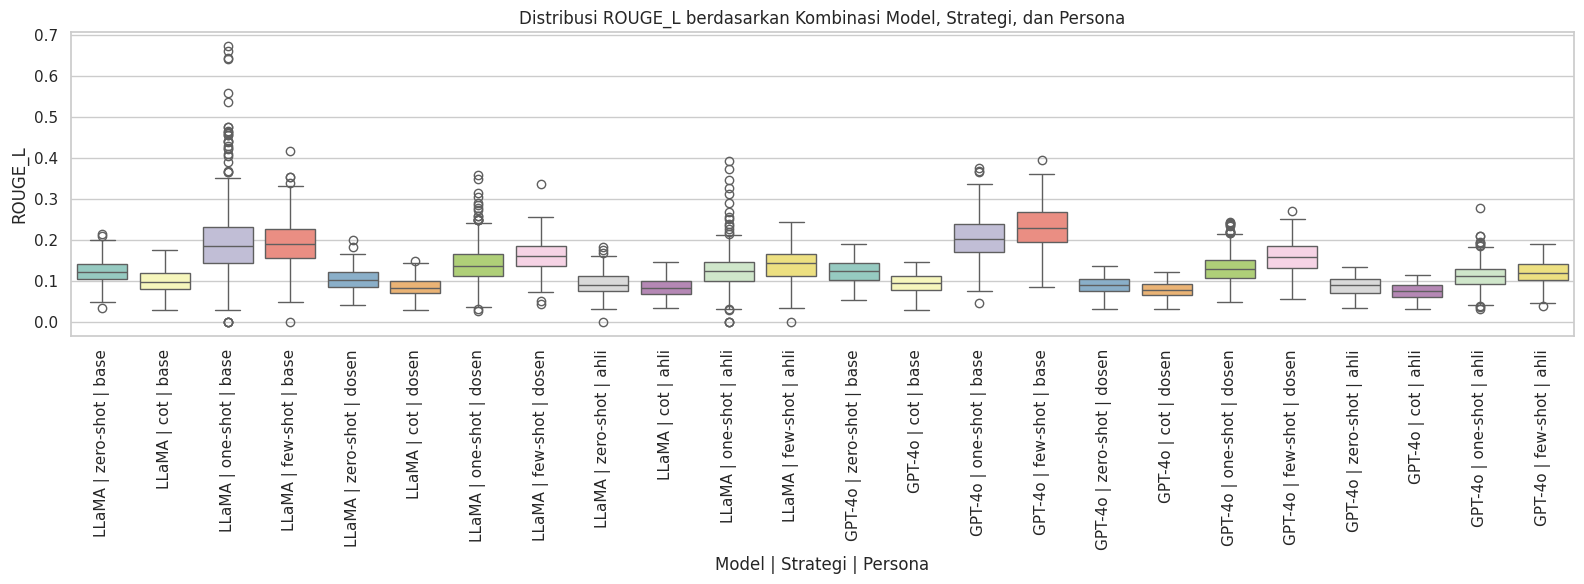

<ipython-input-25-fd6095532690>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="Kombinasi", y=metric, palette="Set3")


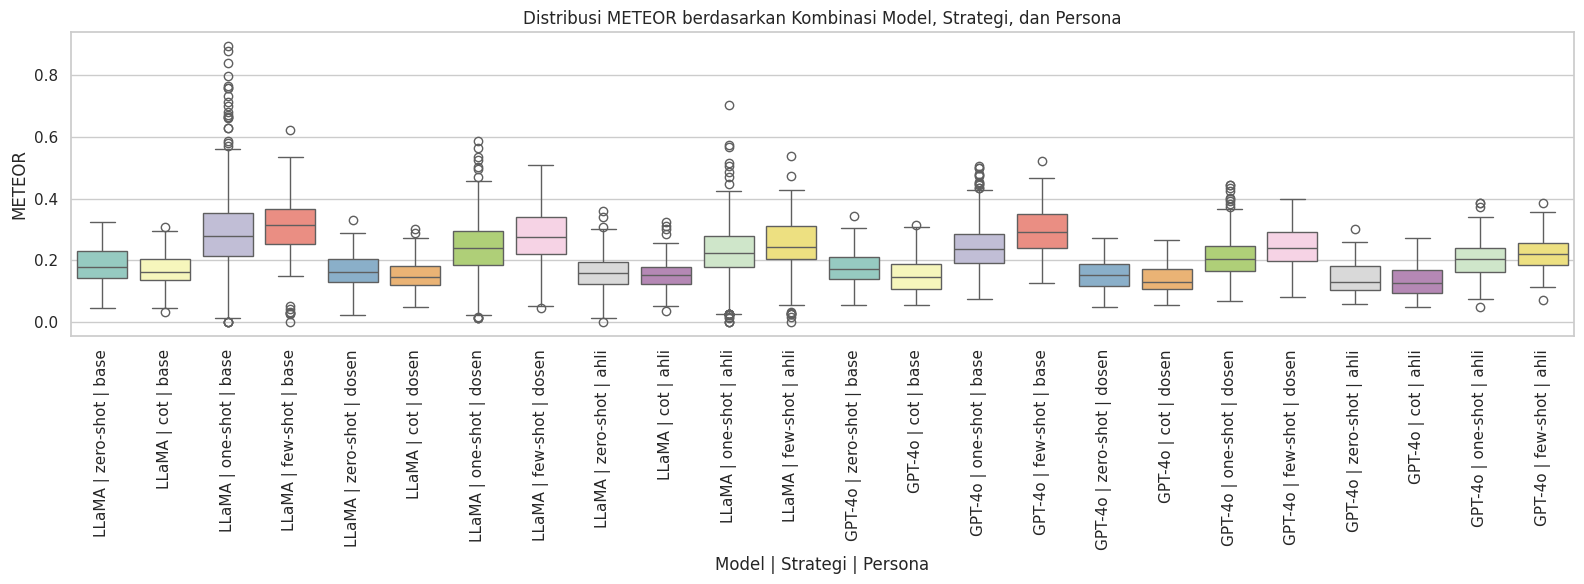

<ipython-input-25-fd6095532690>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="Kombinasi", y=metric, palette="Set3")


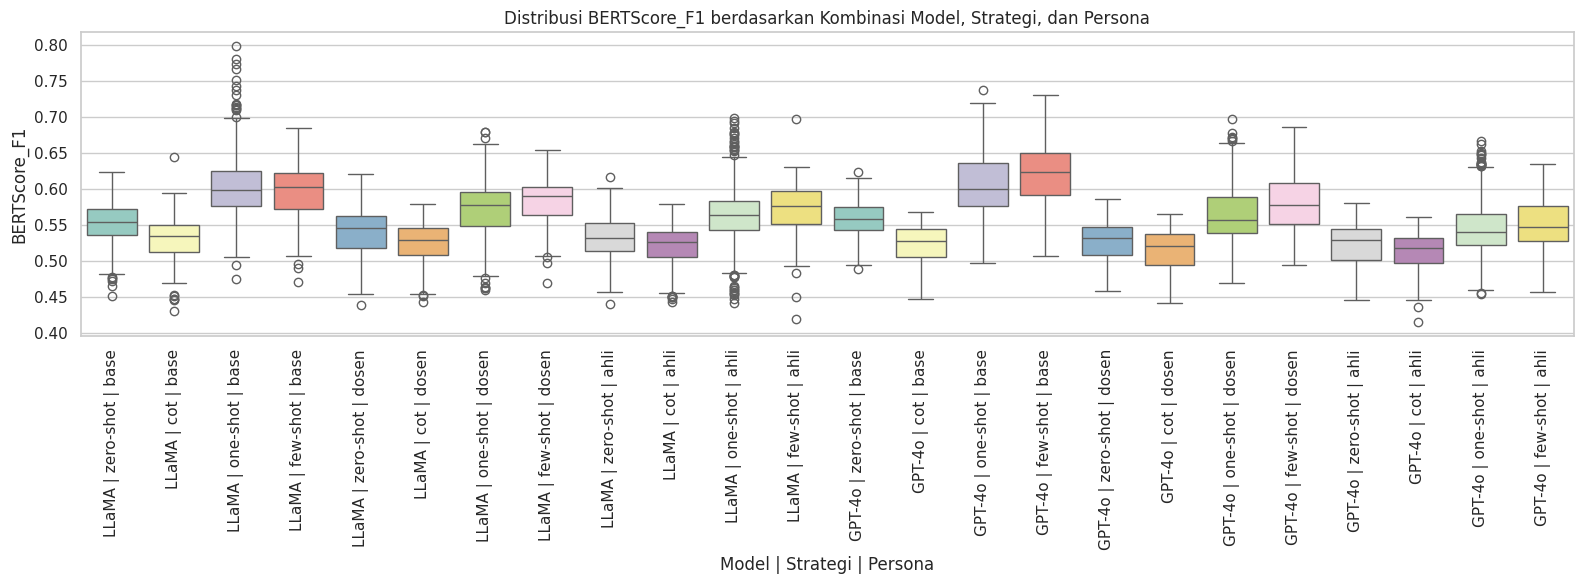

In [ ]:
# Tambahkan kolom gabungan untuk identifikasi kombinasi
df_all["Kombinasi"] = df_all["Model"] + " | " + df_all["Strategy"] + " | " + df_all["Persona"]

# Metrik evaluasi
metrics = ["BLEU", "ROUGE_L", "METEOR", "BERTScore_F1"]

# Visualisasi boxplot per metrik dengan semua kombinasi
for metric in metrics:
    plt.figure(figsize=(16, 6))
    sns.boxplot(data=df_all, x="Kombinasi", y=metric, palette="Set3")
    plt.title(f"Distribusi {metric} berdasarkan Kombinasi Model, Strategi, dan Persona")
    plt.xticks(rotation=90)
    plt.ylabel(metric)
    plt.xlabel("Model | Strategi | Persona")
    plt.tight_layout()
    plt.show()

In [ ]:
summary_model = df_all.groupby("Model")[metrics].mean().reset_index()
summary_model

Model      BLEU   ROUGE_L    METEOR  BERTScore_F1
0  GPT-4o  0.014250  0.135716  0.203935      0.560752
1   LLaMA  0.025712  0.139527  0.229824      0.566184

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=model_melted, x="Model", y="Skor", hue="Metrik", palette="Set2")
plt.title("Rata-rata Evaluasi per Model (gabungan semua strategi & persona)")
plt.ylabel("Skor")
plt.xlabel("Model")
plt.legend(title="Metrik")
plt.tight_layout()
plt.show()

NameError: name 'model_melted' is not defined

<Figure size 1000x600 with 0 Axes>

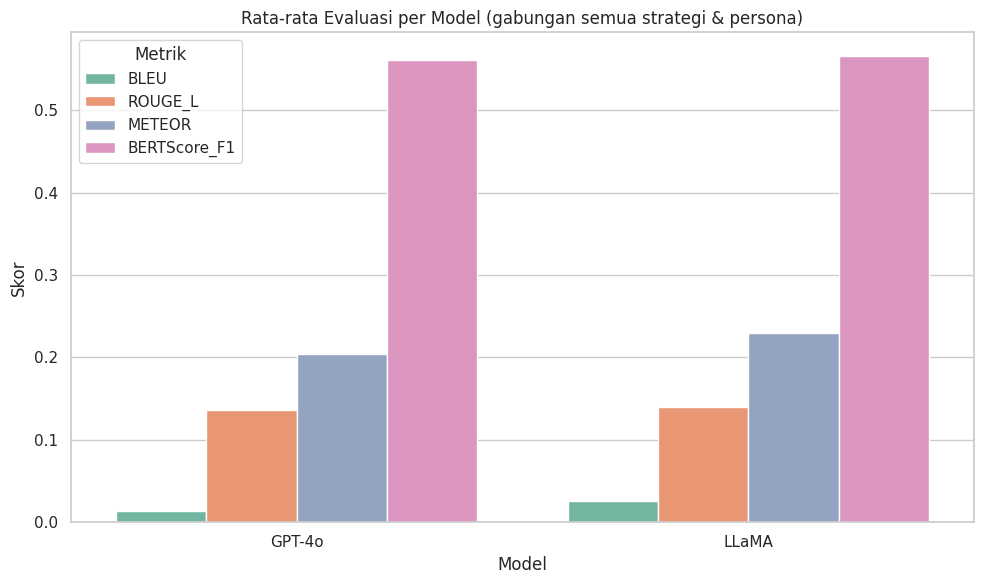

In [ ]:
# Ubah ke format long agar bisa diplot
model_melted = summary_model.melt(id_vars="Model", var_name="Metrik", value_name="Skor")

plt.figure(figsize=(10, 6))
sns.barplot(data=model_melted, x="Model", y="Skor", hue="Metrik", palette="Set2")
plt.title("Rata-rata Evaluasi per Model (gabungan semua strategi & persona)")
plt.ylabel("Skor")
plt.xlabel("Model")
plt.legend(title="Metrik")
plt.tight_layout()
plt.show()

<ipython-input-29-b14a1068289e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="Model", y=metric, palette="Set2")


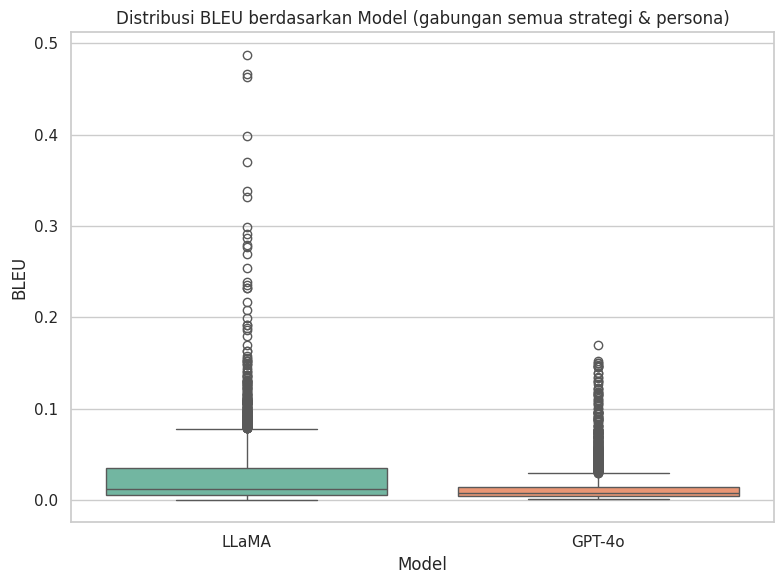

<ipython-input-29-b14a1068289e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="Model", y=metric, palette="Set2")


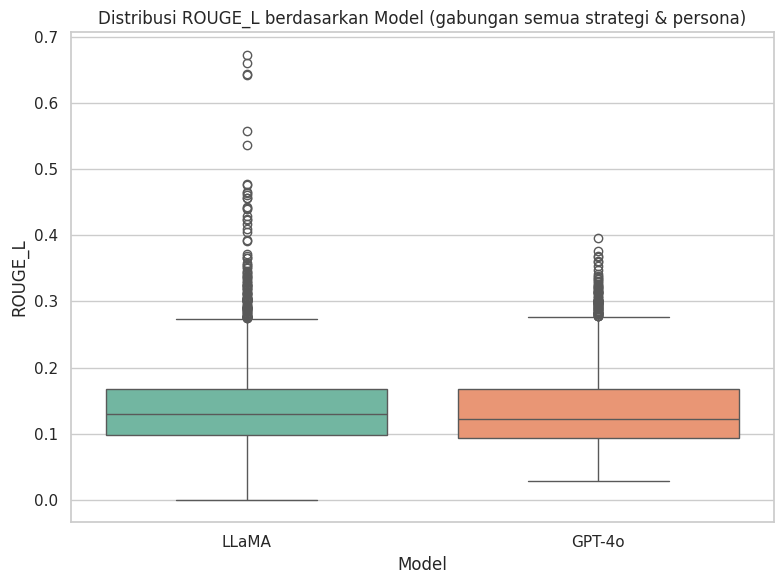

<ipython-input-29-b14a1068289e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="Model", y=metric, palette="Set2")


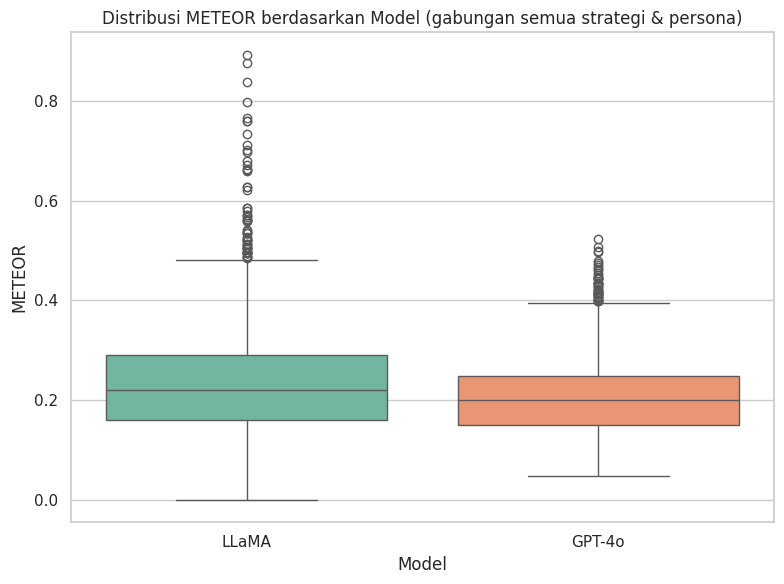

<ipython-input-29-b14a1068289e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="Model", y=metric, palette="Set2")


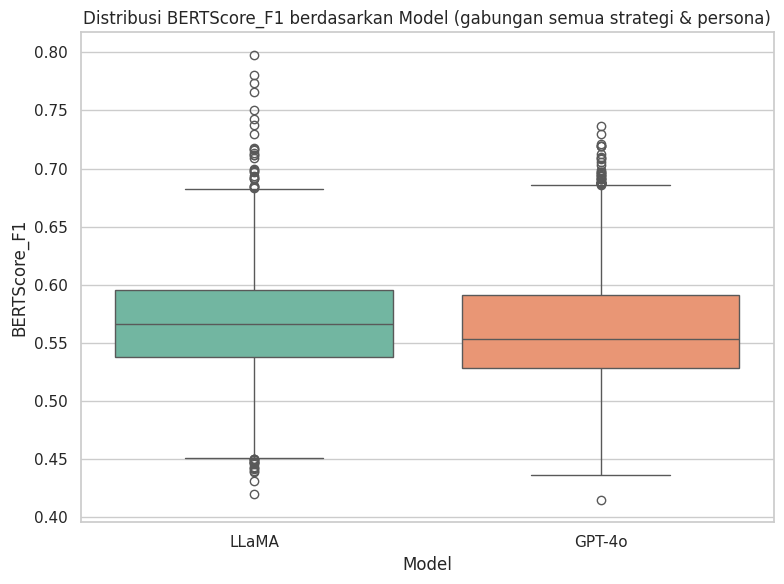

In [ ]:
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_all, x="Model", y=metric, palette="Set2")
    plt.title(f"Distribusi {metric} berdasarkan Model (gabungan semua strategi & persona)")
    plt.xlabel("Model")
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()

## Setelah Revisi

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

In [ ]:
llama_siscer = pd.read_csv('/content/drive/MyDrive/Skripsi/Result/llama_siscer.csv')
llama_mpi = pd.read_csv('/content/drive/MyDrive/Skripsi/Result/llama_mpi.csv')
gpt_mpi = pd.read_csv('/content/drive/MyDrive/Skripsi/Result/gpt_mpi.csv')
gpt_siscer = pd.read_csv('/content/drive/MyDrive/Skripsi/Result/gpt_siscer.csv')

In [ ]:
# Tambahkan identitas model dan mata kuliah
llama_siscer["Model"] = "LLaMA"
llama_siscer["MataKuliah"] = "sistem_cerdas"

gpt_siscer["Model"] = "GPT"
gpt_siscer["MataKuliah"] = "sistem_cerdas"

llama_mpi["Model"] = "LLaMA"
llama_mpi["MataKuliah"] = "mpi"

gpt_mpi["Model"] = "GPT"
gpt_mpi["MataKuliah"] = "mpi"


In [ ]:
# Gabungkan semua menjadi satu dataset utama
df_all = pd.concat([llama_siscer, gpt_siscer, llama_mpi, gpt_mpi], ignore_index=True)

In [ ]:
df_all.head()

Strategy      OneShotType Persona  \
0  zero-shot              NaN    base   
1        cot              NaN    base   
2   one-shot  one_shot_tinggi    base   
3   one-shot  one_shot_sedang    base   
4   one-shot  one_shot_rendah    base   

                                            Question  \
0  Jelaskan perbedaan antara iterative searching ...   
1  Jelaskan perbedaan antara iterative searching ...   
2  Jelaskan perbedaan antara iterative searching ...   
3  Jelaskan perbedaan antara iterative searching ...   
4  Jelaskan perbedaan antara iterative searching ...   

                                             Jawaban  \
0  Iterative searching memberikan nilai awal seda...   
1  Iterative searching memberikan nilai awal seda...   
2  Iterative searching memberikan nilai awal seda...   
3  Iterative searching memberikan nilai awal seda...   
4  Iterative searching memberikan nilai awal seda...   

                                   GeneratedFeedback  \
0  Terima kasih atas pertanyaan dan jawaban mahas...   
1  Berikut adalah analisis bertahap saya untuk me...   
2  Saya dengan senang hati memberikan feedback un...   
3  Mohon maaf, tapi jawaban kamu masih belum tepa...   
4  Mohon maaf, tetapi jawaban Anda masih belum le...   

                                              Prompt      BLEU   ROUGE_L  \
0  \n\n    Anda adalah asisten AI yang memberikan...  0.004043  0.126984   
1  \n\n    Anda adalah asisten AI yang memberikan...  0.002664  0.080586   
2  \n        \n    Anda adalah asisten AI yang me...  0.013617  0.127168   
3  \n        \n    Anda adalah asisten AI yang me...  0.008809  0.190476   
4  \n        \n    Anda adalah asisten AI yang me...  0.031303  0.183007   

     METEOR  BERTScore_F1  Model     MataKuliah  
0  0.224079      0.542631  LLaMA  sistem_cerdas  
1  0.156798      0.481142  LLaMA  sistem_cerdas  
2  0.280463      0.536978  LLaMA  sistem_cerdas  
3  0.286245      0.543510  LLaMA  sistem_cerdas  
4  0.430170      0.590135  LLaMA  sistem_cerdas

In [ ]:
# Bagi ke dua DataFrame sesuai mata kuliah
df_siscer = df_all[df_all["MataKuliah"] == "sistem_cerdas"].copy()
df_mpi = df_all[df_all["MataKuliah"] == "mpi"].copy()

In [ ]:
# Daftar metrik evaluasi
metrics = ["BLEU", "ROUGE_L", "METEOR", "BERTScore_F1"]

In [ ]:
def visualisasi_boxplot(df, label_matkul):
    ordered_strategies = ["zero-shot", "one-shot", "few-shot", "cot"]
    for metric in metrics:
        #strategi prompt
        plt.figure(figsize=(7, 4))
        sns.boxplot(data=df, x="Strategy", y=metric, palette="Set2", order=ordered_strategies)
        plt.title(f"{label_matkul} – {metric} per Strategi Prompting")
        plt.tight_layout()
        plt.show()

        # Persona Prompting
        plt.figure(figsize=(7, 4))
        sns.boxplot(data=df, x="Persona", y=metric, palette="Set3")
        plt.title(f"{label_matkul} – {metric} per Persona Prompting")
        plt.tight_layout()
        plt.show()

        # Model LLM
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x="Model", y=metric, palette="Set1")
        plt.title(f"{label_matkul} – {metric} per Model LLM")
        plt.tight_layout()
        plt.show()

        # Kombinasi Model–Strategi–Persona
        df["Kombinasi"] = df["Model"] + " | " + df["Strategy"] + " | " + df["Persona"]
        plt.figure(figsize=(14, 5))
        sns.boxplot(data=df, x="Kombinasi", y=metric, palette="coolwarm")
        plt.xticks(rotation=90)
        plt.title(f"{label_matkul} – {metric} per Kombinasi Model–Strategi–Persona")
        plt.tight_layout()
        plt.show()


/tmp/ipython-input-10-3606585152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Strategy", y=metric, palette="Set2", order=ordered_strategies)


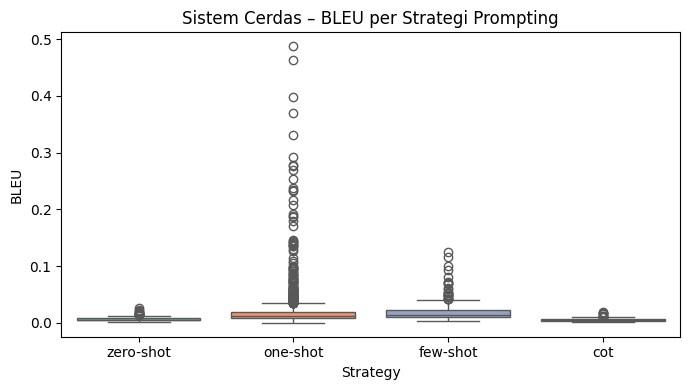

/tmp/ipython-input-10-3606585152.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Persona", y=metric, palette="Set3")


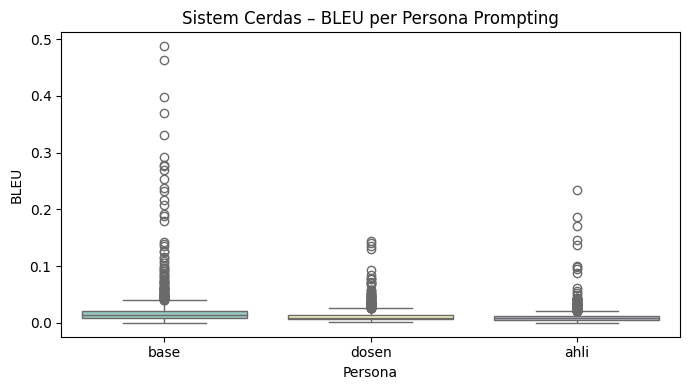

/tmp/ipython-input-10-3606585152.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Model", y=metric, palette="Set1")


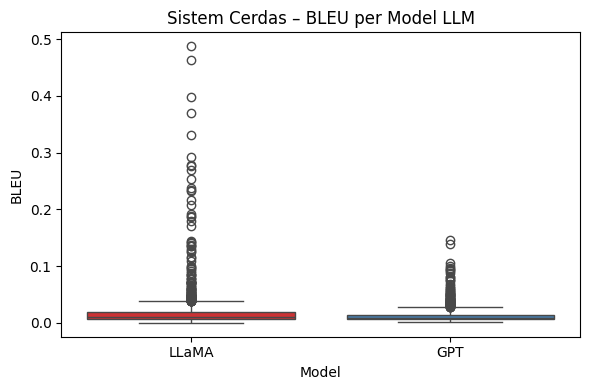

/tmp/ipython-input-10-3606585152.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Kombinasi", y=metric, palette="coolwarm")


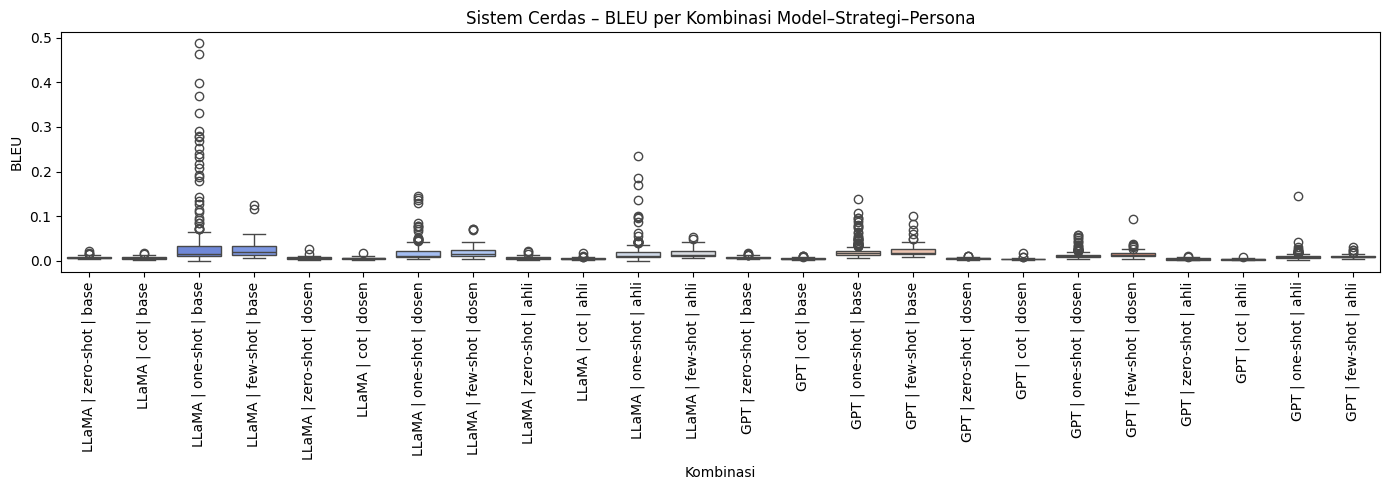

/tmp/ipython-input-10-3606585152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Strategy", y=metric, palette="Set2", order=ordered_strategies)


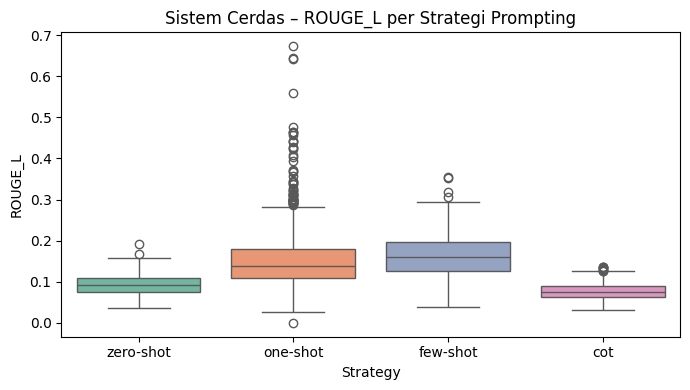

/tmp/ipython-input-10-3606585152.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Persona", y=metric, palette="Set3")


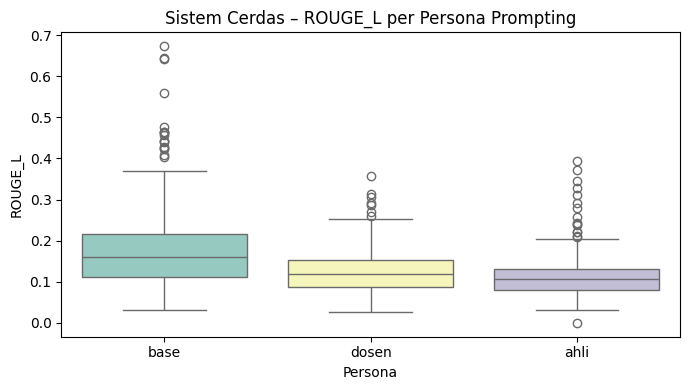

/tmp/ipython-input-10-3606585152.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Model", y=metric, palette="Set1")


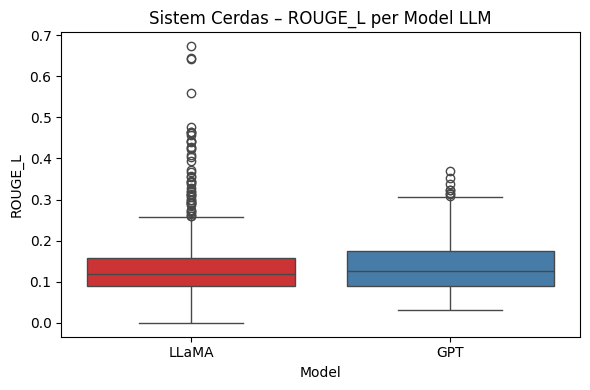

/tmp/ipython-input-10-3606585152.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Kombinasi", y=metric, palette="coolwarm")


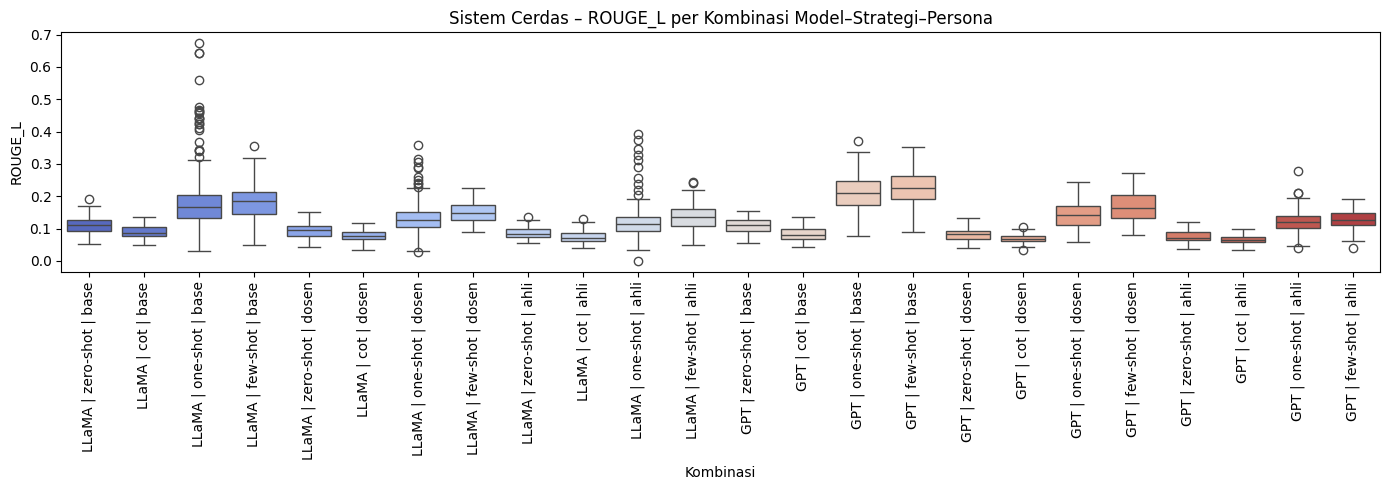

/tmp/ipython-input-10-3606585152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Strategy", y=metric, palette="Set2", order=ordered_strategies)


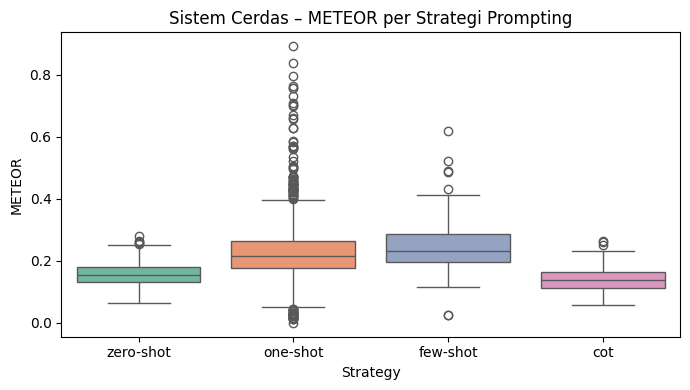

/tmp/ipython-input-10-3606585152.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Persona", y=metric, palette="Set3")


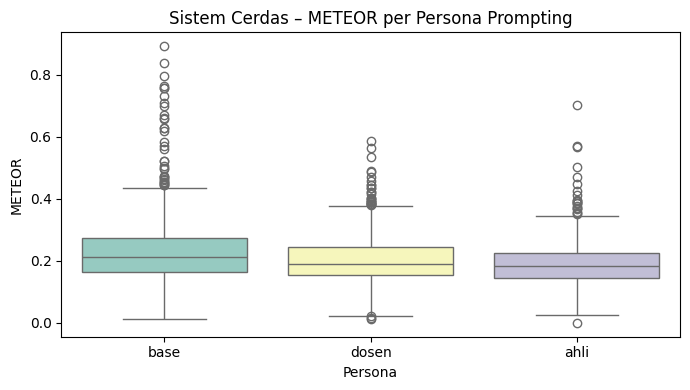

/tmp/ipython-input-10-3606585152.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Model", y=metric, palette="Set1")


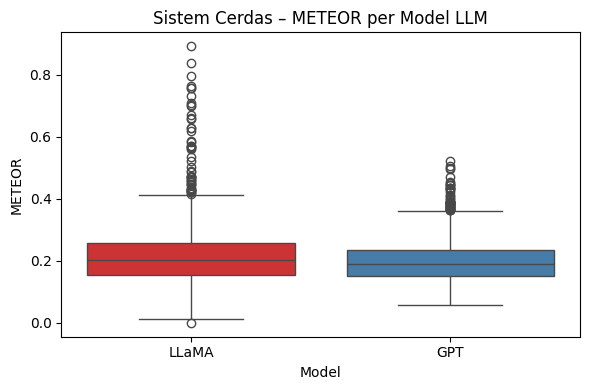

/tmp/ipython-input-10-3606585152.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Kombinasi", y=metric, palette="coolwarm")


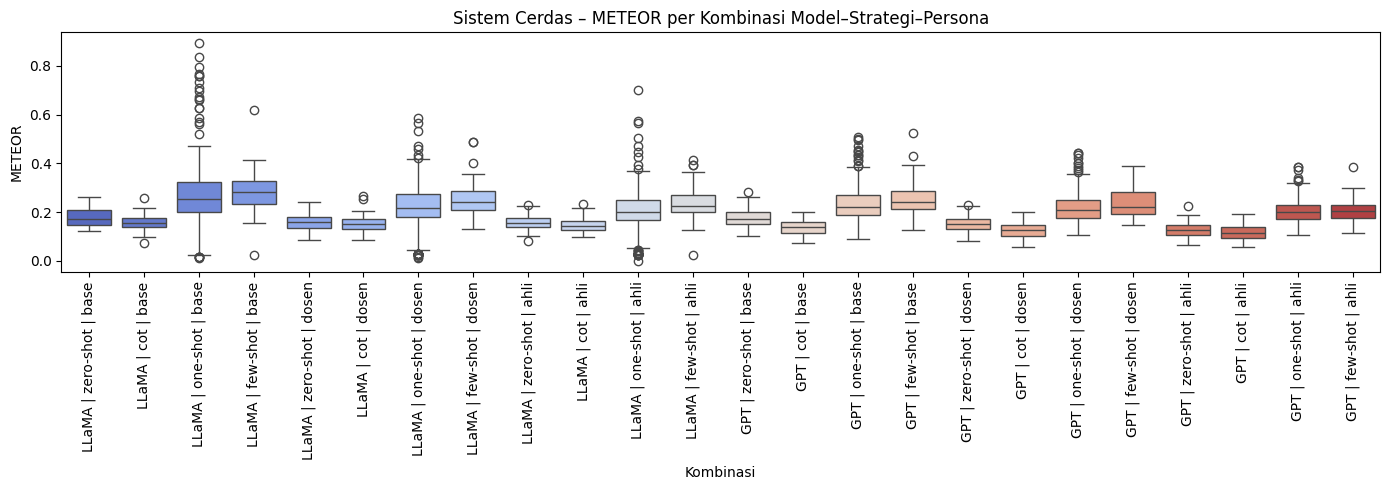

/tmp/ipython-input-10-3606585152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Strategy", y=metric, palette="Set2", order=ordered_strategies)


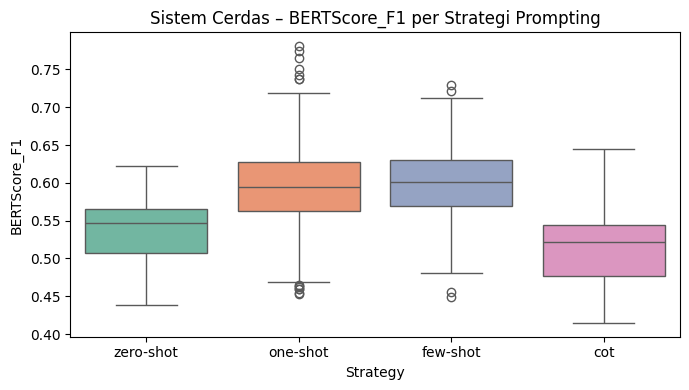

/tmp/ipython-input-10-3606585152.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Persona", y=metric, palette="Set3")


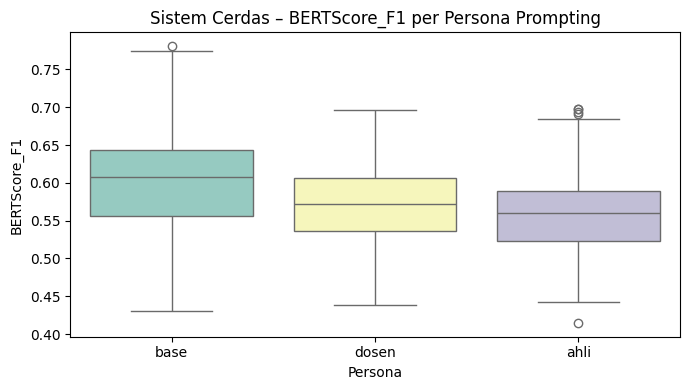

/tmp/ipython-input-10-3606585152.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Model", y=metric, palette="Set1")


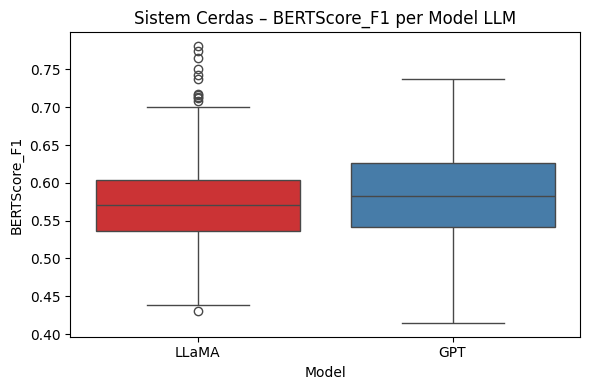

/tmp/ipython-input-10-3606585152.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Kombinasi", y=metric, palette="coolwarm")


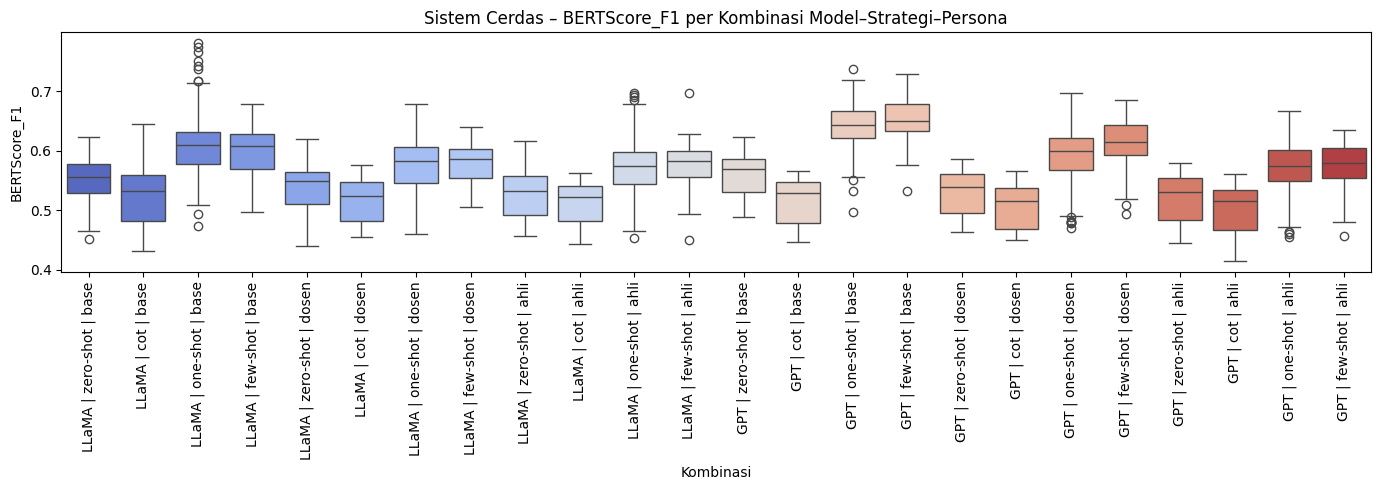

In [ ]:
visualisasi_boxplot(df_siscer, "Sistem Cerdas")

/tmp/ipython-input-11-3606585152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Strategy", y=metric, palette="Set2", order=ordered_strategies)


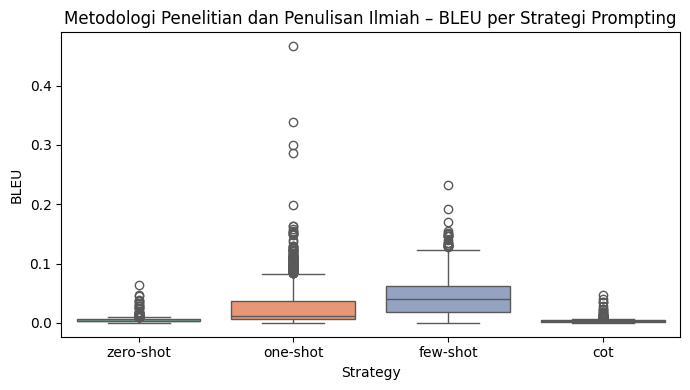

/tmp/ipython-input-11-3606585152.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Persona", y=metric, palette="Set3")


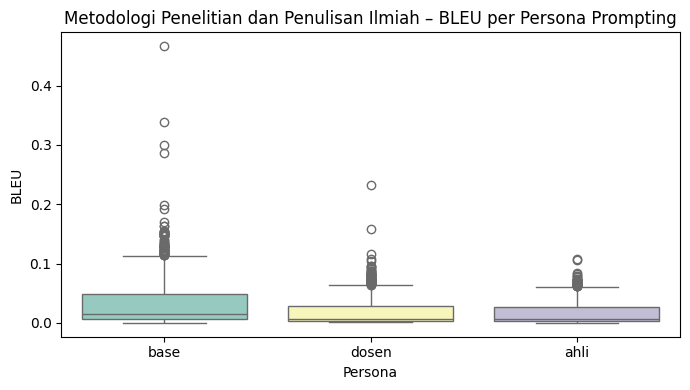

/tmp/ipython-input-11-3606585152.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Model", y=metric, palette="Set1")


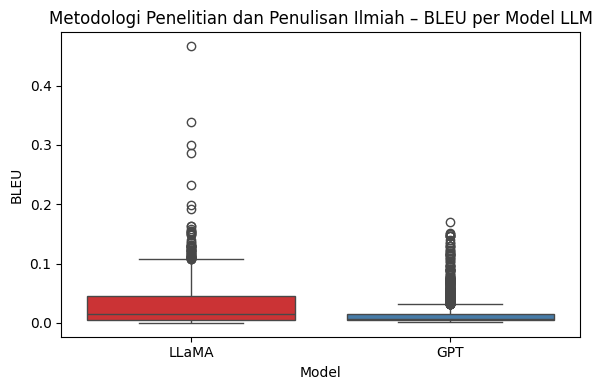

/tmp/ipython-input-11-3606585152.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Kombinasi", y=metric, palette="coolwarm")


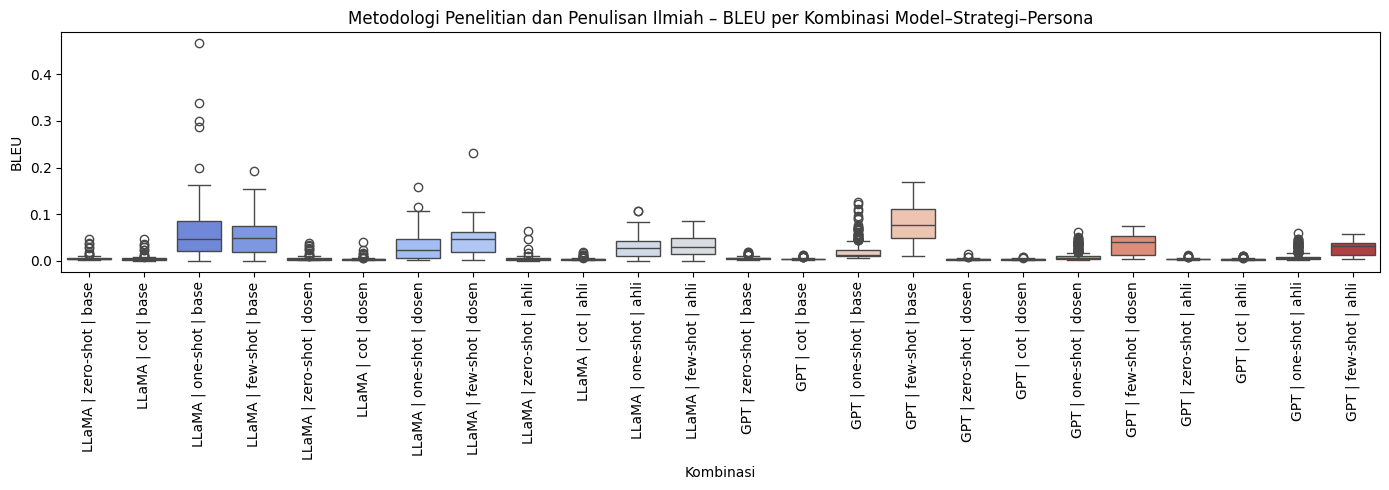

/tmp/ipython-input-11-3606585152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Strategy", y=metric, palette="Set2", order=ordered_strategies)


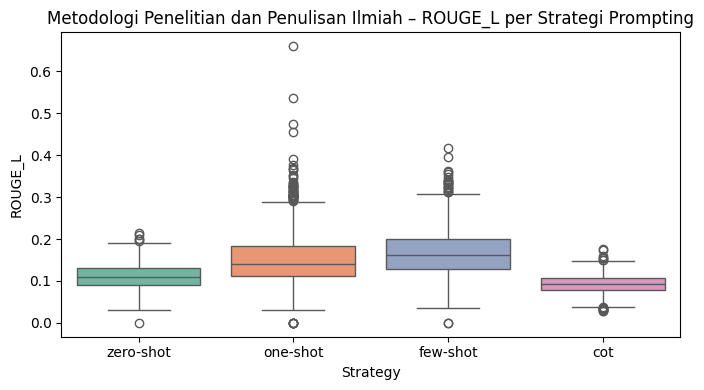

/tmp/ipython-input-11-3606585152.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Persona", y=metric, palette="Set3")


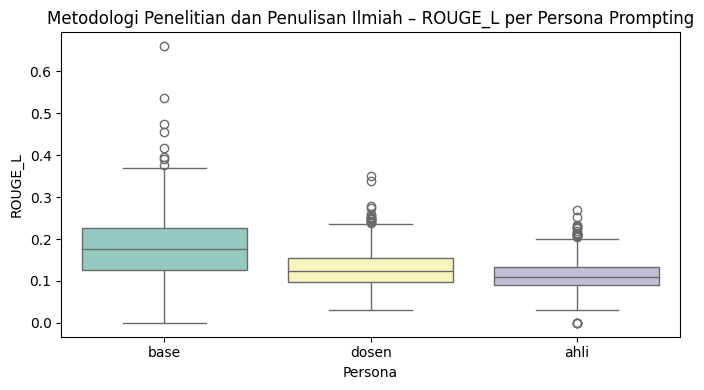

/tmp/ipython-input-11-3606585152.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Model", y=metric, palette="Set1")


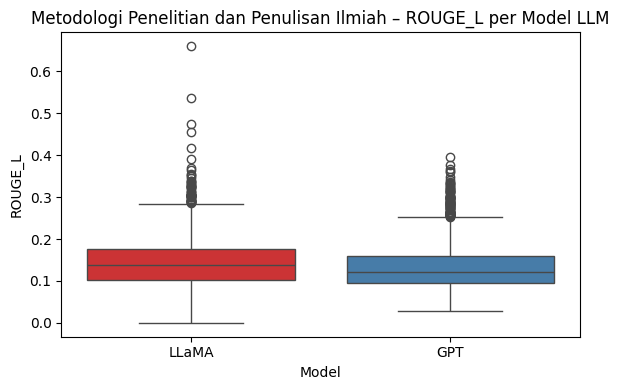

/tmp/ipython-input-11-3606585152.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Kombinasi", y=metric, palette="coolwarm")


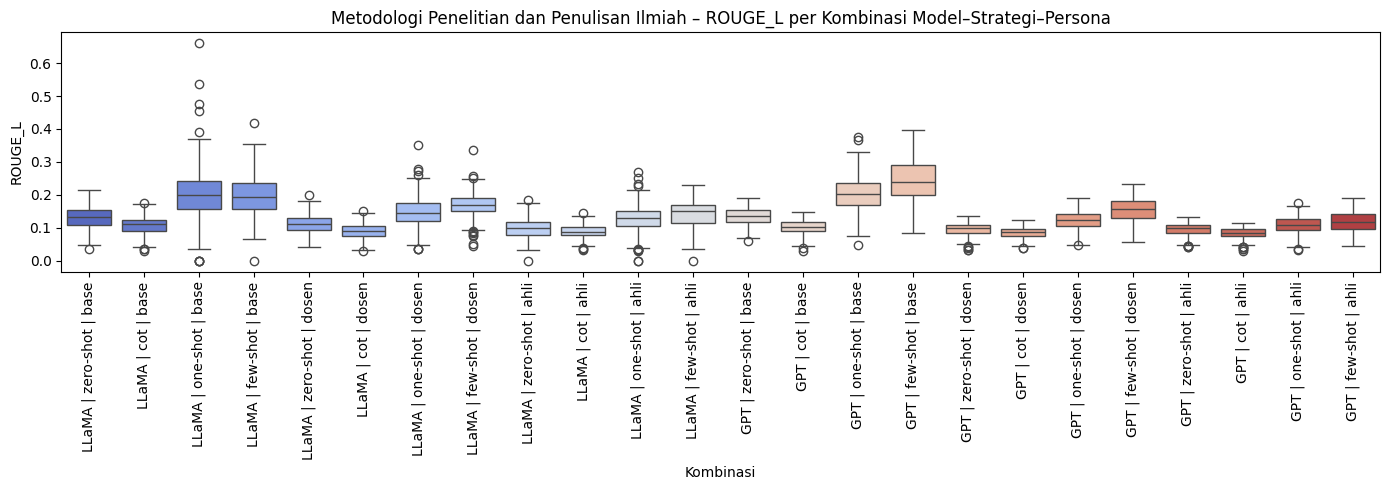

/tmp/ipython-input-11-3606585152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Strategy", y=metric, palette="Set2", order=ordered_strategies)


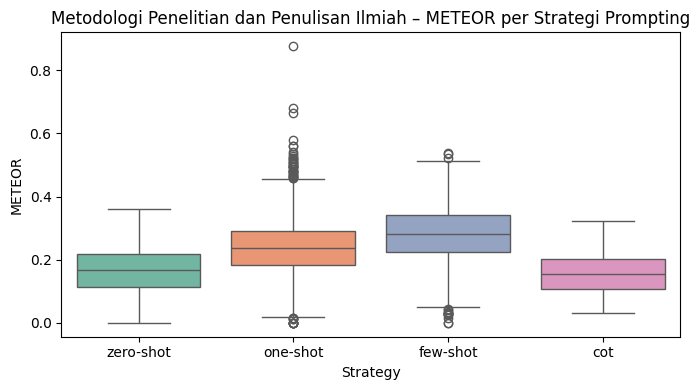

/tmp/ipython-input-11-3606585152.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Persona", y=metric, palette="Set3")


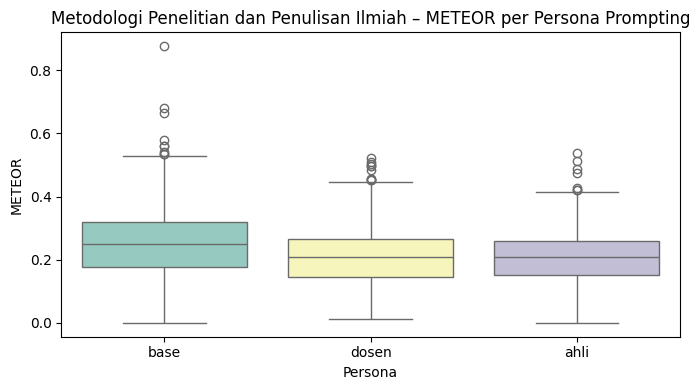

/tmp/ipython-input-11-3606585152.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Model", y=metric, palette="Set1")


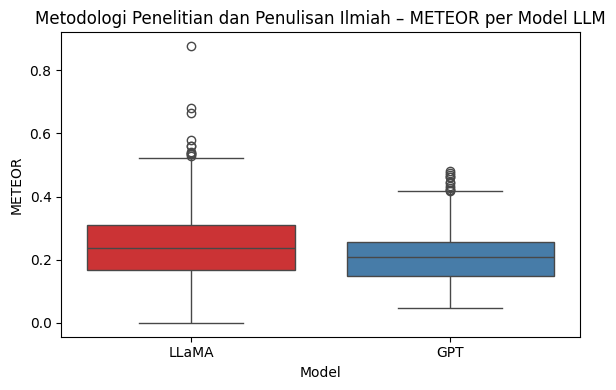

/tmp/ipython-input-11-3606585152.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Kombinasi", y=metric, palette="coolwarm")


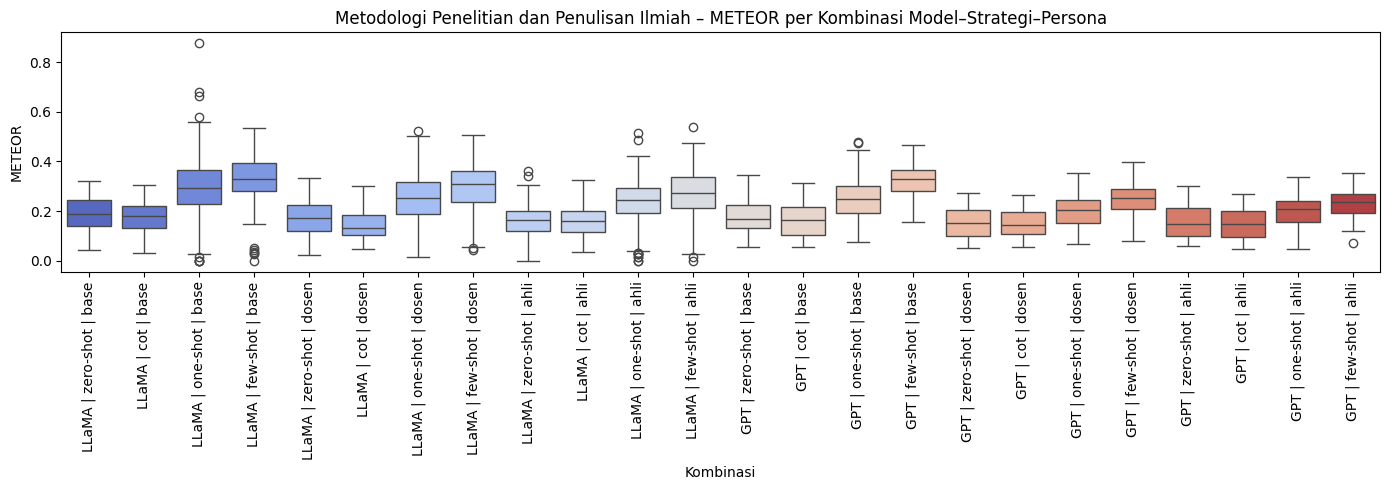

/tmp/ipython-input-11-3606585152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Strategy", y=metric, palette="Set2", order=ordered_strategies)


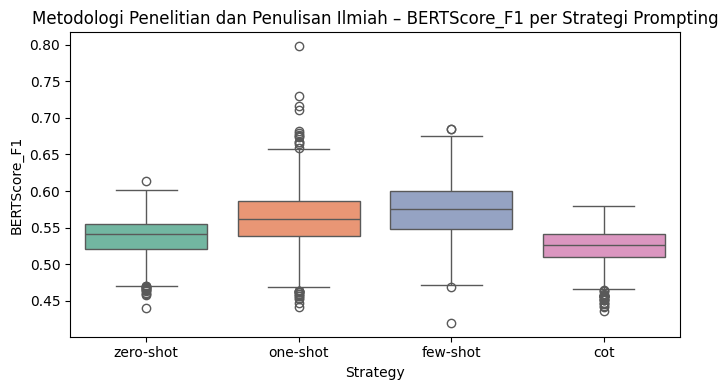

/tmp/ipython-input-11-3606585152.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Persona", y=metric, palette="Set3")


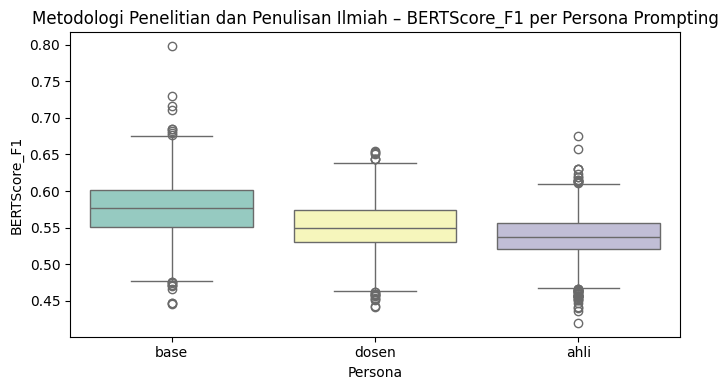

/tmp/ipython-input-11-3606585152.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Model", y=metric, palette="Set1")


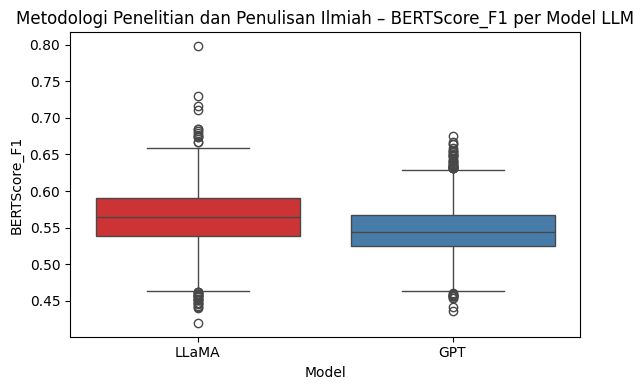

/tmp/ipython-input-11-3606585152.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Kombinasi", y=metric, palette="coolwarm")


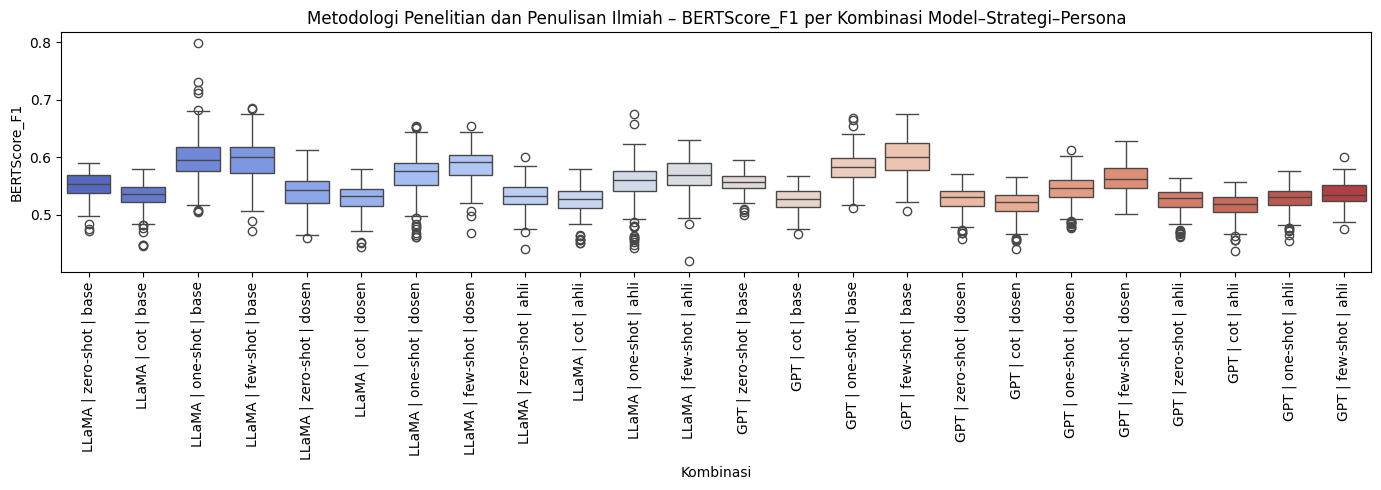

In [ ]:
visualisasi_boxplot(df_mpi, "Metodologi Penelitian dan Penulisan Ilmiah")

In [ ]:
metrics = ["BLEU", "ROUGE_L", "METEOR", "BERTScore_F1"]

# Tabel rata-rata per strategi
avg_by_strategy = df_all.groupby(["MataKuliah", "Strategy"])[metrics].mean().reset_index()

# Tabel rata-rata per persona
avg_by_persona = df_all.groupby(["MataKuliah", "Persona"])[metrics].mean().reset_index()

# Tabel rata-rata per model
avg_by_model = df_all.groupby(["MataKuliah", "Model"])[metrics].mean().reset_index()

# Tabel rata-rata per kombinasi
avg_by_combo = df_all.groupby(["MataKuliah", "Model", "Strategy", "Persona"])[metrics].mean().reset_index()


In [ ]:
# Filter hanya untuk mata kuliah Sistem Cerdas
df_siscer = df_all[df_all["MataKuliah"] == "sistem_cerdas"]

# Hitung rata-rata metrik per strategi
avg_siscer_by_strategy = df_siscer.groupby("Strategy")[metrics].mean().reset_index()

# Hitung rata-rata metrik per persona
avg_siscer_by_persona = df_siscer.groupby("Persona")[metrics].mean().reset_index()

# Hitung rata-rata metrik per persona
avg_siscer_by_model = df_siscer.groupby("Model")[metrics].mean().reset_index()

# Tabel rata-rata per kombinasi
avg_siscer_by_combo = df_siscer.groupby(["MataKuliah", "Model", "Strategy", "Persona"])[metrics].mean().reset_index()


In [ ]:
# Urutkan berdasarkan BERTScore tertinggi
avg_siscer_by_combo_sorted = avg_siscer_by_combo.sort_values(
    by="BERTScore_F1", ascending=False
).reset_index(drop=True)

# Tampilkan dengan format dan background gradient
styled_siscer_table = avg_siscer_by_combo_sorted.style\
    .background_gradient(cmap="YlGnBu", subset=metrics)\
    .format("{:.4f}", subset=metrics)

styled_siscer_table

In [ ]:
# Urutan kategori eksplisit
strategy_order = ["zero-shot", "one-shot", "few-shot", "cot"]
persona_order = ["base", "dosen", "ahli"]
model_order = ["GPT", "LLaMA"]

# Konversi ke kategori terurut
avg_siscer_by_combo["Strategy"] = pd.Categorical(avg_siscer_by_combo["Strategy"], categories=strategy_order, ordered=True)
avg_siscer_by_combo["Persona"] = pd.Categorical(avg_siscer_by_combo["Persona"], categories=persona_order, ordered=True)
avg_siscer_by_combo["Model"] = pd.Categorical(avg_siscer_by_combo["Model"], categories=model_order, ordered=True)

# Urutkan berdasarkan kategori
avg_siscer_by_combo_sorted = avg_siscer_by_combo.sort_values(
    by=["Strategy", "Persona", "Model"]
).reset_index(drop=True)

# Susun ulang kolom
avg_siscer_by_combo_sorted = avg_siscer_by_combo_sorted[
    ["Strategy", "Persona", "Model", "BLEU", "ROUGE_L", "METEOR", "BERTScore_F1"]
]

# Format tabel dengan style
styled_siscer_table = avg_siscer_by_combo_sorted.style\
    .background_gradient(cmap="YlGnBu", subset=["BLEU", "ROUGE_L", "METEOR", "BERTScore_F1"])\
    .format("{:.4f}", subset=["BLEU", "ROUGE_L", "METEOR", "BERTScore_F1"])

styled_siscer_table


In [ ]:
# Urutkan berdasarkan BERTScore tertinggi
avg_siscer_by_strategy_sorted = avg_siscer_by_strategy.sort_values(
    by="BERTScore_F1", ascending=False
).reset_index(drop=True)

In [ ]:
# Tampilkan dengan format dan background gradient
styled_siscer_table = avg_siscer_by_strategy_sorted.style\
    .background_gradient(cmap="YlGnBu", subset=metrics)\
    .format("{:.4f}", subset=metrics)

styled_siscer_table


In [ ]:
# Urutkan berdasarkan BERTScore tertinggi
avg_siscer_by_persona_sorted = avg_siscer_by_persona.sort_values(
    by="BERTScore_F1", ascending=False
).reset_index(drop=True)

# Tampilkan dengan format dan background gradient
styled_siscer_table = avg_siscer_by_persona_sorted.style\
    .background_gradient(cmap="YlGnBu", subset=metrics)\
    .format("{:.4f}", subset=metrics)

styled_siscer_table

In [ ]:
# Urutkan berdasarkan BERTScore tertinggi
avg_siscer_by_model_sorted = avg_siscer_by_model.sort_values(
    by="BERTScore_F1", ascending=False
).reset_index(drop=True)

# Tampilkan dengan format dan background gradient
styled_siscer_table = avg_siscer_by_model_sorted.style\
    .background_gradient(cmap="YlGnBu", subset=metrics)\
    .format("{:.4f}", subset=metrics)

styled_siscer_table

<ipython-input-19-ecb4834b6085>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Strategy", y=metric, palette="Set2")


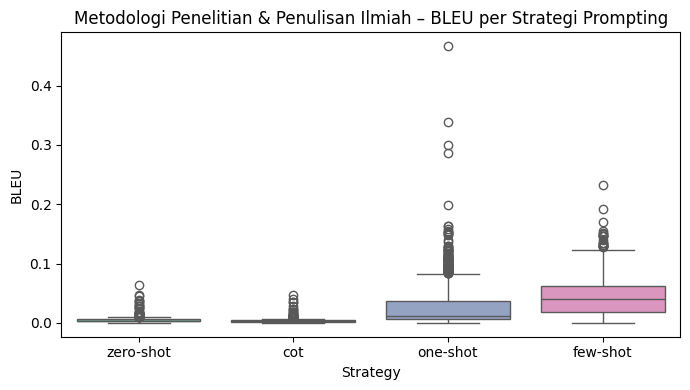

<ipython-input-19-ecb4834b6085>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Persona", y=metric, palette="Set3")


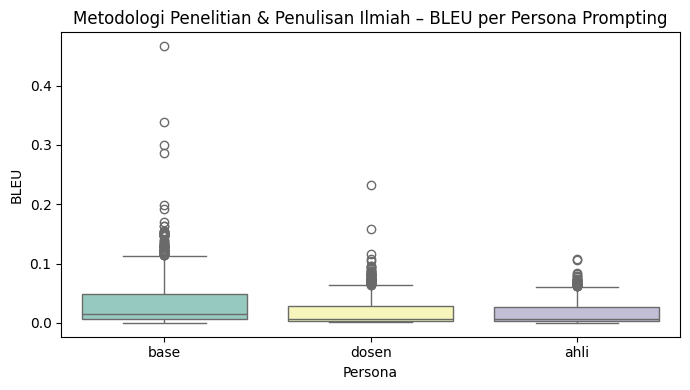

<ipython-input-19-ecb4834b6085>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Model", y=metric, palette="Set1")


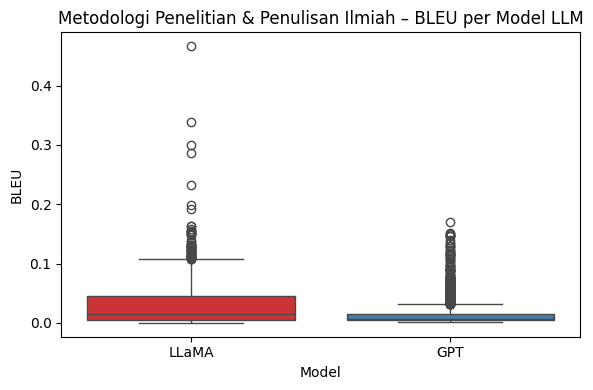

<ipython-input-19-ecb4834b6085>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Kombinasi", y=metric, palette="coolwarm")


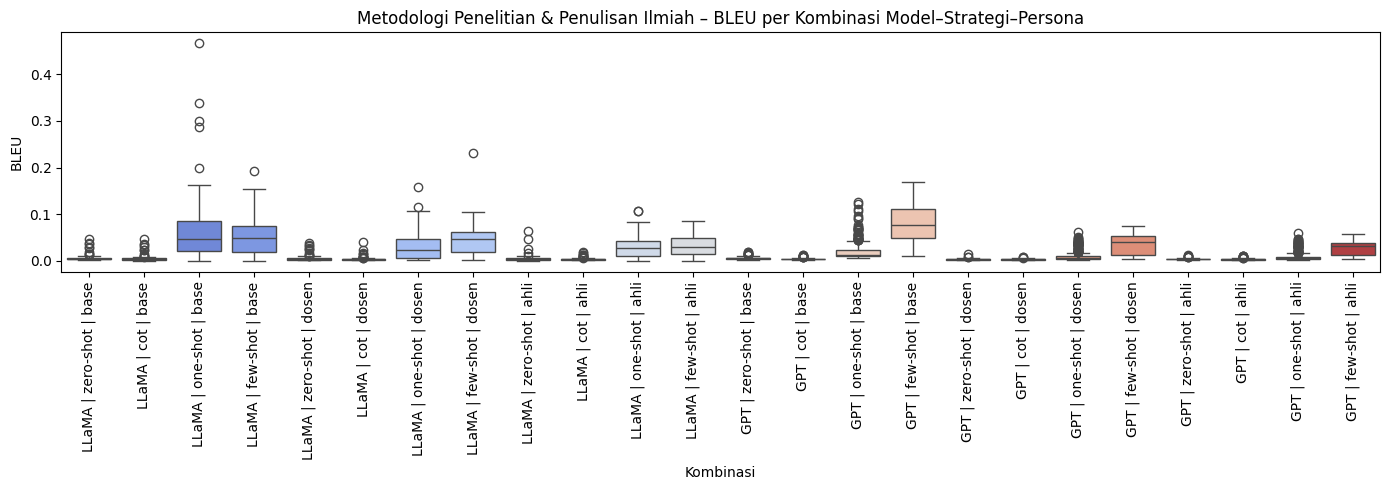

<ipython-input-19-ecb4834b6085>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Strategy", y=metric, palette="Set2")


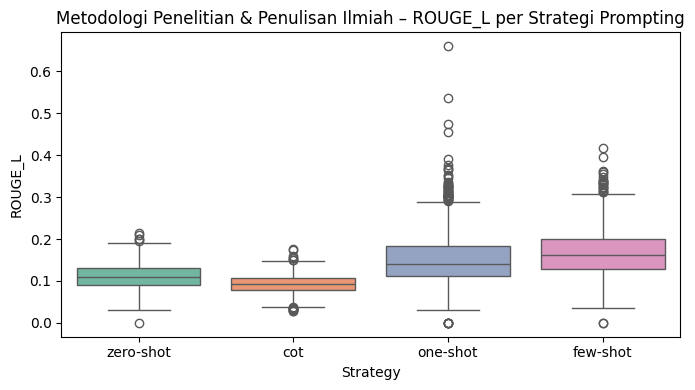

<ipython-input-19-ecb4834b6085>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Persona", y=metric, palette="Set3")


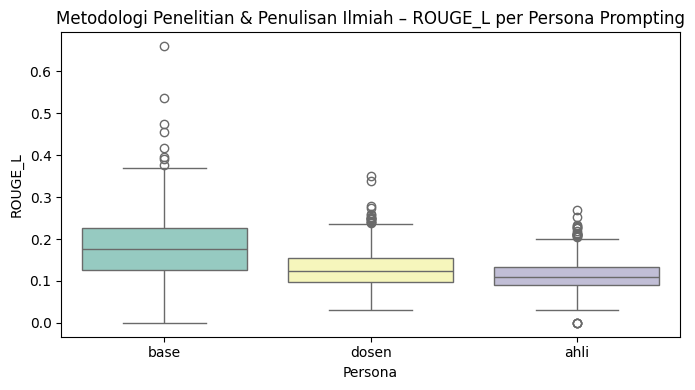

<ipython-input-19-ecb4834b6085>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Model", y=metric, palette="Set1")


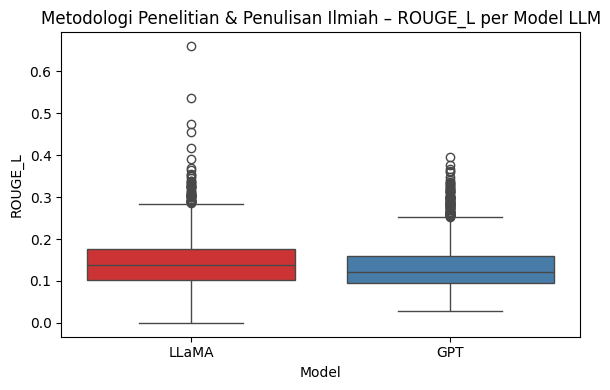

<ipython-input-19-ecb4834b6085>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Kombinasi", y=metric, palette="coolwarm")


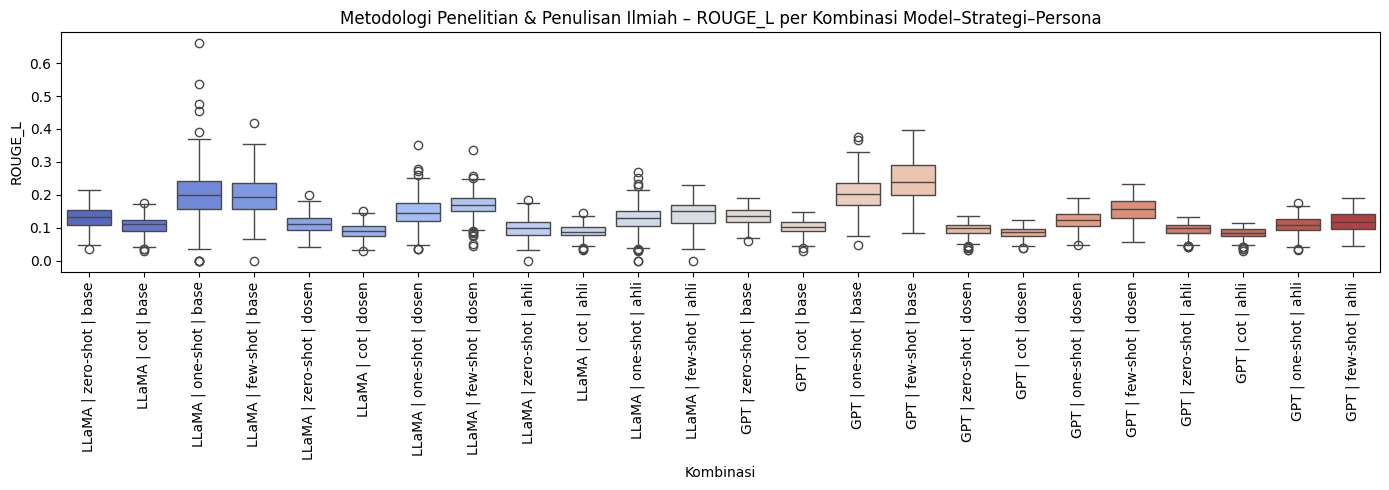

<ipython-input-19-ecb4834b6085>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Strategy", y=metric, palette="Set2")


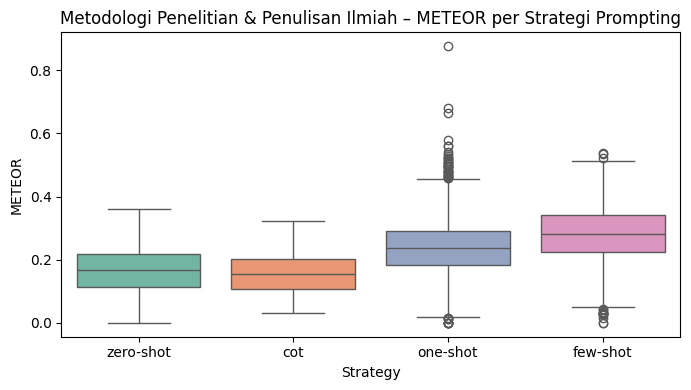

<ipython-input-19-ecb4834b6085>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Persona", y=metric, palette="Set3")


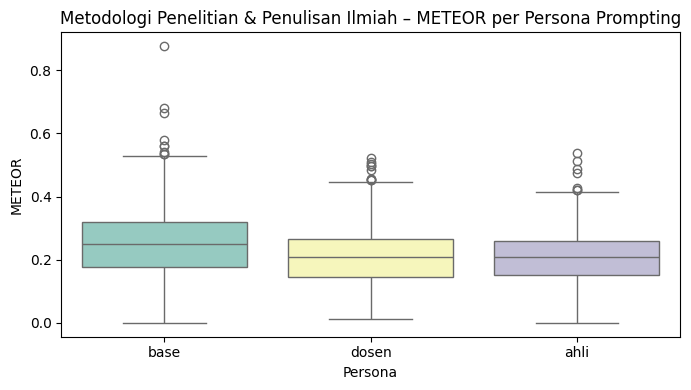

<ipython-input-19-ecb4834b6085>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Model", y=metric, palette="Set1")


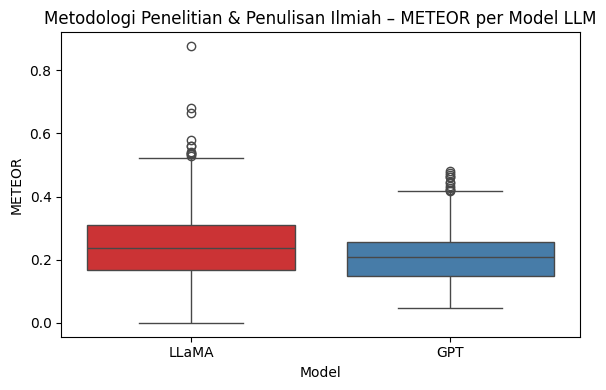

<ipython-input-19-ecb4834b6085>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Kombinasi", y=metric, palette="coolwarm")


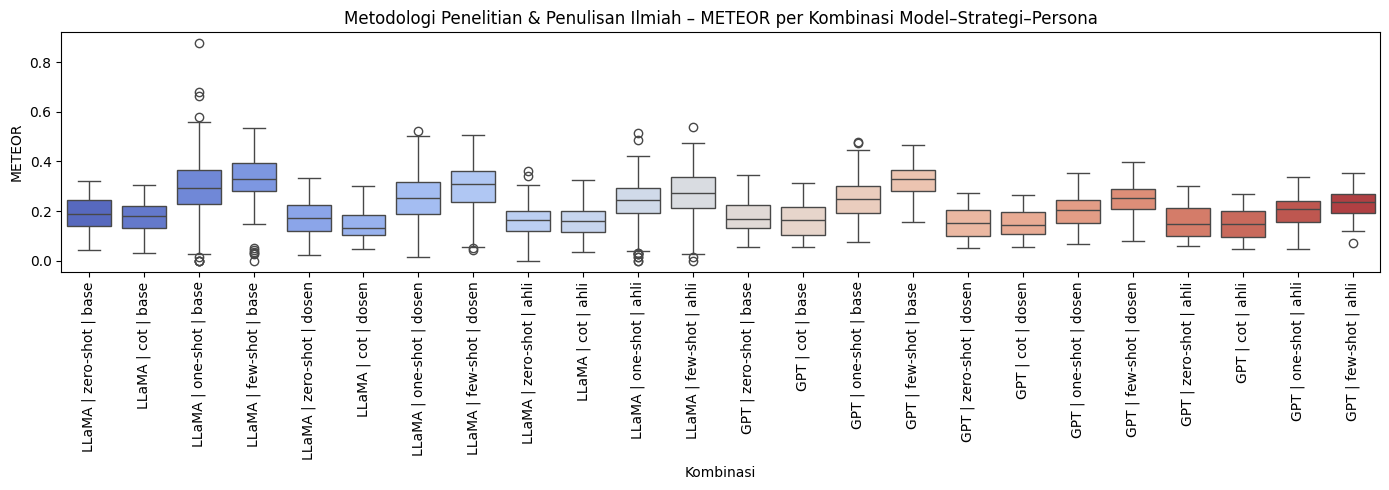

<ipython-input-19-ecb4834b6085>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Strategy", y=metric, palette="Set2")


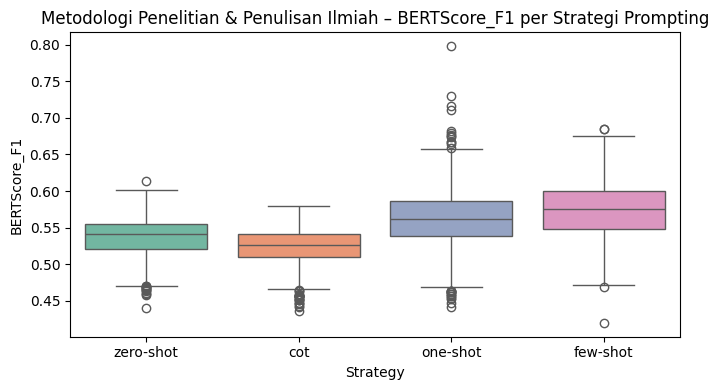

<ipython-input-19-ecb4834b6085>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Persona", y=metric, palette="Set3")


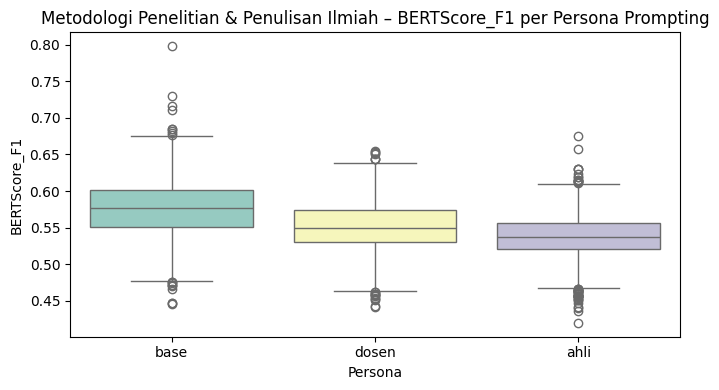

<ipython-input-19-ecb4834b6085>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Model", y=metric, palette="Set1")


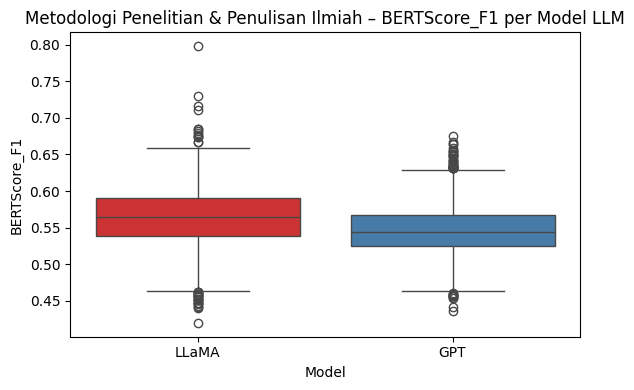

<ipython-input-19-ecb4834b6085>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Kombinasi", y=metric, palette="coolwarm")


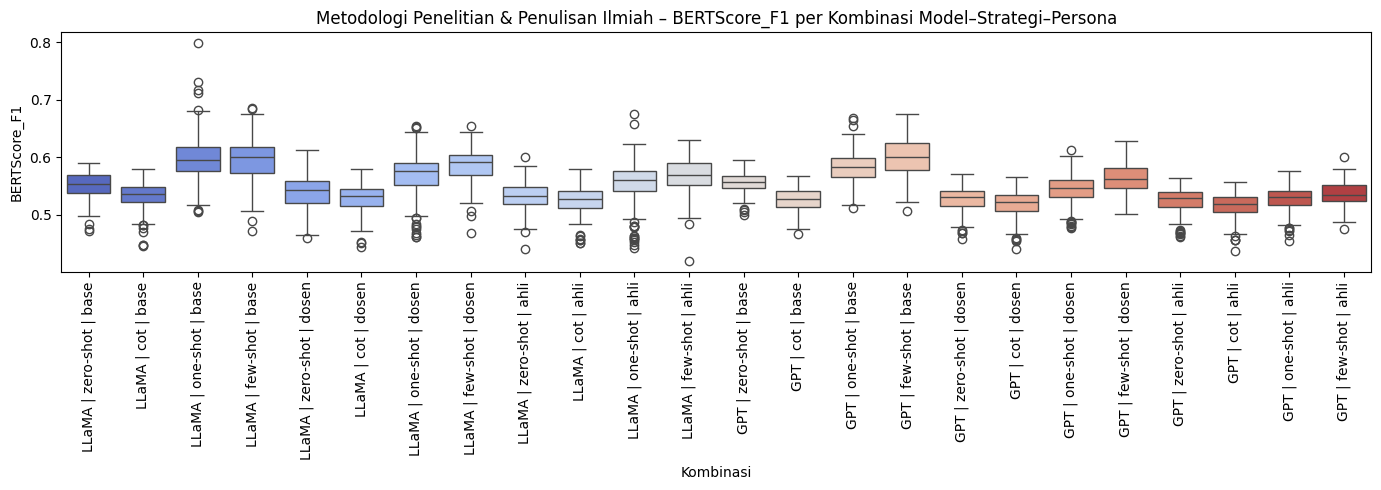

In [ ]:
visualisasi_boxplot(df_mpi, "Metodologi Penelitian & Penulisan Ilmiah")

In [ ]:
# Filter hanya untuk mata kuliah Sistem Cerdas
df_mpi = df_all[df_all["MataKuliah"] == "mpi"]

# Hitung rata-rata metrik per strategi
avg_mpi_by_strategy = df_mpi.groupby("Strategy")[metrics].mean().reset_index()

# Hitung rata-rata metrik per strategi
avg_mpi_by_persona = df_mpi.groupby("Persona")[metrics].mean().reset_index()

# Hitung rata-rata metrik per persona
avg_mpi_by_model = df_mpi.groupby("Model")[metrics].mean().reset_index()

# Tabel rata-rata per kombinasi
avg_mpi_by_combo = df_mpi.groupby(["MataKuliah", "Model", "Strategy", "Persona"])[metrics].mean().reset_index()

In [ ]:
# Urutkan berdasarkan BERTScore tertinggi
avg_mpi_by_strategy_sorted = avg_mpi_by_strategy.sort_values(
    by="BERTScore_F1", ascending=False
).reset_index(drop=True)

# Tampilkan dengan format dan background gradient
styled_mpi_strategy_table = avg_mpi_by_strategy_sorted.style\
    .background_gradient(cmap="YlGnBu", subset=metrics)\
    .format("{:.4f}", subset=metrics)

styled_mpi_strategy_table

In [ ]:
# Urutkan berdasarkan BERTScore tertinggi
avg_mpi_by_persona_sorted = avg_mpi_by_persona.sort_values(
    by="BERTScore_F1", ascending=False
).reset_index(drop=True)

# Tampilkan dengan format dan background gradient
styled_mpi_persona_table = avg_mpi_by_persona_sorted.style\
    .background_gradient(cmap="YlGnBu", subset=metrics)\
    .format("{:.4f}", subset=metrics)

styled_mpi_persona_table

In [ ]:
# Urutkan berdasarkan BERTScore tertinggi
avg_mpi_by_model_sorted = avg_mpi_by_model.sort_values(
    by="BERTScore_F1", ascending=False
).reset_index(drop=True)

# Tampilkan dengan format dan background gradient
styled_mpi_model_table = avg_mpi_by_model_sorted.style\
    .background_gradient(cmap="YlGnBu", subset=metrics)\
    .format("{:.4f}", subset=metrics)

styled_mpi_model_table

In [ ]:
# Urutkan berdasarkan BERTScore tertinggi
avg_mpi_by_combo_sorted = avg_mpi_by_combo.sort_values(
    by="BERTScore_F1", ascending=False
).reset_index(drop=True)

# Tampilkan dengan format dan background gradient
styled_mpi_combo_table = avg_mpi_by_combo_sorted.style\
    .background_gradient(cmap="YlGnBu", subset=metrics)\
    .format("{:.4f}", subset=metrics)

styled_mpi_combo_table

In [ ]:
# Urutan kategori eksplisit
strategy_order = ["zero-shot", "one-shot", "few-shot", "cot"]
persona_order = ["base", "dosen", "ahli"]
model_order = ["GPT", "LLaMA"]
metrics = ["BLEU", "ROUGE_L", "METEOR", "BERTScore_F1"]

# Terapkan urutan kategori
avg_mpi_by_combo["Strategy"] = pd.Categorical(avg_mpi_by_combo["Strategy"], categories=strategy_order, ordered=True)
avg_mpi_by_combo["Persona"] = pd.Categorical(avg_mpi_by_combo["Persona"], categories=persona_order, ordered=True)
avg_mpi_by_combo["Model"] = pd.Categorical(avg_mpi_by_combo["Model"], categories=model_order, ordered=True)

# Urutkan
avg_mpi_by_combo_sorted = avg_mpi_by_combo.sort_values(
    by=["Strategy", "Persona", "Model"]
).reset_index(drop=True)

# Susun ulang kolom
avg_mpi_by_combo_sorted = avg_mpi_by_combo_sorted[
    ["Strategy", "Persona", "Model"] + metrics
]

# Format dengan background gradient
styled_mpi_table = avg_mpi_by_combo_sorted.style\
    .background_gradient(cmap="YlGnBu", subset=metrics)\
    .format("{:.4f}", subset=metrics)

styled_mpi_table


# Demo

In [ ]:
!pip install ollama

In [ ]:
import openai
import ollama
import os
import gradio as gr

client = openai.OpenAI(api_key="")

In [ ]:
# ---------- PERSONA PROMPT ----------
persona_sistem_cerdas = {
    "base": "Anda adalah asisten AI yang memberikan feedback singkat dan objektif.",
    "dosen": "Anda adalah seorang dosen yang mengajar mata kuliah Sistem Cerdas.",
    "ahli": "Anda adalah seorang ahli dalam bidang Sistem Cerdas."
}

persona_mpi = {
    "base": "Anda adalah asisten AI yang memberikan feedback singkat, objektif, dan berbasis prinsip penelitian ilmiah.",
    "dosen": "Anda adalah seorang dosen yang mengajar mata kuliah Metodologi Penelitian dan Penulisan Ilmiah.",
    "ahli": "Anda adalah seorang ahli dalam bidang Metodologi Penelitian dan Penulisan Ilmiah."
}

# Few-shot prompt SISCER
few_prompt_siscer = """
Berikut adalah contoh feedback untuk jawaban mahasiswa:
Pertanyaan: Jelaskan perbedaan antara iterative searching dan non iterative searching?
Jawaban Mahasiswa: Iterative search adalah sebuah jenis search yang akan terus mengihitung kemungkinan sampai ditemukannya goal state. Dalam iterative search, solusi tidak selalu berupa path karena dapat mencoba untuk mencari benefit terbanyak atau cost terendah. Non-iterative search adalah search yang tidak diulang-ulang hingga menemukan solusi terbaik, sehingga tidak melalui trial and error. Pada non-iterative search, dicarikan path untuk mencapai goal state.
Feedback: Jawaban kamu hampir benar. Kamu telah menjelaskan perbedaan penggunaan serta kondisi akhir dari  proses pencarian iterative search dan non-iterative search, namun kamu belum menyimpulkan kedua hal tersebut sebagai dua poin pembeda diantara kedua teknik search.

Berikut adalah contoh feedback untuk jawaban mahasiswa:
pertanyaan: Jelaskan perbedaan antara iterative searching dan non iterative searching?
Jawaban Mahasiswa: iterative menggunakan hitungan dari awal sampe akhir, sedangkan non iterative tidak.
Feedback: Jawaban kamu salah. Kamu  tidak menjelaskan perbedaan iterative searching dan non iterative searching dari segi penggunaan dan kondisi akhir serta jawaban kamu tidak sesuai

Berikut adalah contoh feedback untuk jawaban mahasiswa:
Pertanyaan: Jelaskan perbedaan antara iterative searching dan non iterative searching?
Jawaban Mahasiswa: Perbedaan antara iterative seraching dan non iterative searching
Feedback: Jawaban kamu salah karena tidak menjelaskan mengenai perbedaan konsep penggunaan dan kondisi akhir dari iterative searching serta non iterative searching
"""

# Few-shot prompt MPI
few_prompt_mpi = """
Berikut adalah contoh feedback untuk jawaban mahasiswa:
Pertanyaan: Jelaskan selengkap mungkin yang anda ketahui mengenai research question (rumusan masalah) dan research objective (tujuan penelitian), serta bagaimana hubungan di antara keduanya?
Jawaban Mahasiswa: Baik itu Research Question (RQ) maupun Research Objective (RO), mereka berdua adalah hasil dari sebuah Research Problem (RP). RQ sendiri adalah pertanyaan-pertanyaan yang muncul setelah kita mendefinisikan RP. Jadi RQ itu sendiri adalah pertanyaan-pertanyaan tentang bagaimana kita menyelesaikan RP yang ada. Sedangkan RO adalah tujuan/goal yang harus kita capai untuk menyelesaikan RP. Hubungan di antara keduanya adalah Research Objective bertujuan untuk mendapat jawaban dan kesimpulan untuk Research Question.
Feedback: Jawaban kamu sangat benar. Kamu memberikan penjelasan tentang Research Question (Rumusan Masalah) dan Research Objective (Tujuan Penelitian) dengan tepat.

Berikut adalah contoh feedback untuk jawaban mahasiswa:
Pertanyaan: Jelaskan selengkap mungkin yang anda ketahui mengenai research question (rumusan masalah) dan research objective (tujuan penelitian), serta bagaimana hubungan di antara keduanya?
Jawaban Mahasiswa: Research question adalah rumusan masalah yang melandasi dilakukannya penelitian ilmiah secara objektif dan nantinya dapat dibuktikan secara valid dan logis, sedangkan research objective adalah tujuan dari diadakannya penelitian ilmiah. Hubungan keduanya adalah dari rumusan masalah akan dijadikan tujuan penelitian yang ingin dicapai.
Feedback: Jawaban kamu salah. Penjelasan mengenai Research Question (Rumusan Masalah) dan Research Objective (Tujuan Penelitian) masih belum tepat, terutama dalam menjelaskan hubungan antara keduanya.

Berikut adalah contoh feedback untuk jawaban mahasiswa:
Pertanyaan: Jelaskan selengkap mungkin yang anda ketahui mengenai research question (rumusan masalah) dan research objective (tujuan penelitian), serta bagaimana hubungan di antara keduanya?
Jawaban Mahasiswa: RESEARCH QUESTION (RUMUSAN MASALAH) adalah bagaimana meningkatkan efisiensi proses training dan kinerja dari analisa sentimen berdasarkan Convolutional Neural Network dengan penerapan Bayesian optimization. RESEARCH OBJECTIVE (TUJUAN PENELITIAN) adalah bagaimana menerapkan Bayesian optimization untuk proses hyperparameter tuning pada sentiment analysis berdasarkan Convolutional Neural Network.
Feedback: Jawaban kamu sangat salah. Kamu tidak memberikan penjelasan mengenai Research Question (Rumusan Masalah) dan Research Objective (Tujuan Penelitian) dengan benar, serta kamu tidak memberikan penjelasan mengenai hubungan antara keduanya.
"""

# One-shot sederhana
one_prompt = {
    "one_shot_tinggi": """
Berikut adalah contoh feedback:
Pertanyaan: Jelaskan perbedaan antara iterative searching dan non iterative searching?
Jawaban: Iterative search dilakukan secara berulang hingga solusi tercapai. Non-iterative dilakukan sekali.
Feedback: Penjelasan cukup akurat, meskipun masih bisa diperdalam dari segi penerapan praktis.
"""
}

one_prompt_mpi = {
    "one_shot_tinggi": """
Berikut adalah contoh feedback untuk jawaban mahasiswa:
Pertanyaan: Jelaskan selengkap mungkin yang anda ketahui mengenai research question (rumusan masalah) dan research objective (tujuan penelitian), serta bagaimana hubungan di antara keduanya?
Jawaban Mahasiswa: Baik itu Research Question (RQ) maupun Research Objective (RO), mereka berdua adalah hasil dari sebuah Research Problem (RP). RQ sendiri adalah pertanyaan-pertanyaan yang muncul setelah kita mendefinisikan RP. Jadi RQ itu sendiri adalah pertanyaan-pertanyaan tentang bagaimana kita menyelesaikan RP yang ada. Sedangkan RO adalah tujuan/goal yang harus kita capai untuk menyelesaikan RP. Hubungan di antara keduanya adalah Research Objective bertujuan untuk mendapat jawaban dan kesimpulan untuk Research Question.
Feedback: Jawaban kamu sangat benar. Kamu memberikan penjelasan tentang Research Question (Rumusan Masalah) dan Research Objective (Tujuan Masalah) dengan tepat.
"""
}

In [ ]:
def build_prompt(strategy, persona_text, question, student_answer, mata_kuliah):
    scope = f"Evaluasi jawaban mahasiswa dalam mata kuliah {mata_kuliah.replace('_', ' ')}."

    if strategy == "zero-shot":
        prompt = f"""
{persona_text}

{scope}

Pertanyaan: {question}
Jawaban Mahasiswa: {student_answer}

Berikan feedback yang:
1) Mengevaluasi ketepatan konsep.
2) Menyebutkan kesalahan atau kekurangan pemahaman jika ada.
3) Memberikan saran akademik atau perbaikan agar lebih baik.
"""
    elif strategy == "cot":
        prompt = f"""
{persona_text}

Gunakan pendekatan berpikir bertahap (Chain-of-Thought) untuk memberikan feedback:

1) Evaluasi ketepatan konsep.
2) Identifikasi kesalahan atau kekurangan dalam jawaban mahasiswa.
3) Berikan saran konkret dan akademik untuk memperbaiki jawaban.
4) Kaitkan dengan penerapan dunia nyata atau referensi teori jika relevan.

{scope}

Pertanyaan: {question}
Jawaban Mahasiswa: {student_answer}

**Analisis Bertahap:**
"""
    elif strategy == "few-shot":
        few_example = few_prompt_siscer if mata_kuliah == "sistem_cerdas" else few_prompt_mpi
        prompt = f"""
{persona_text}

{scope}

Berikut beberapa contoh feedback relevan:
{few_example}

Sekarang, berikan feedback untuk jawaban berikut:
Pertanyaan: {question}
Jawaban Mahasiswa: {student_answer}
Feedback:
"""
    elif strategy == "one-shot":
    # Pilih one-shot prompt sesuai mata kuliah
      example_text = (
          one_prompt["one_shot_tinggi"]
          if mata_kuliah == "sistem_cerdas"
          else one_prompt_mpi["one_shot_tinggi"]
      )
      prompt = f"""
        {persona_text}

        {scope}

        {example_text}

        Sekarang, berikan feedback untuk jawaban berikut:
        Pertanyaan: {question}
        Jawaban Mahasiswa: {student_answer}
        Feedback:
        """
    else:
        prompt = "[STRATEGI TIDAK DIDUKUNG]"

    return prompt

In [ ]:
def generate_feedback_ollama(mata_kuliah, persona, strategy, question, student_answer, reference_feedback=None):
    pattern = persona_sistem_cerdas if mata_kuliah == "sistem_cerdas" else persona_mpi
    persona_text = pattern[persona]
    scope = f"Evaluasi jawaban mahasiswa dalam mata kuliah {mata_kuliah.replace('_', ' ')}."

    if strategy == "zero-shot":
        prompt = f"{persona_text}\n{scope}\n\nPertanyaan: {question}\nJawaban Mahasiswa: {student_answer}\n\nBerikan feedback."
    elif strategy == "cot":
        prompt = f"{persona_text}\n{scope}\nGunakan pendekatan bertahap...\nPertanyaan: {question}\nJawaban: {student_answer}\n**Analisis:**"
    elif strategy == "few-shot":
        prompt = f"{persona_text}\n{scope}\nBerikut beberapa contoh:\n{few_prompt}\n\nPertanyaan: {question}\nJawaban: {student_answer}\nFeedback:"
    elif strategy == "one-shot":
        prompt = f"{persona_text}\n{scope}\n{one_prompt['one_shot_tinggi']}\n\nPertanyaan: {question}\nJawaban: {student_answer}\nFeedback:"
    else:
        return "Strategi tidak didukung", ""

    try:
        res = ollama.chat(model="llama3.1", messages=[{"role": "user", "content": prompt}])
        return res['message']['content'], prompt
    except Exception as e:
        return f"Error: {str(e)}", prompt


def generate_feedback_gpt(mata_kuliah, persona, strategy, question, student_answer, reference_feedback=None):
    pattern = persona_sistem_cerdas if mata_kuliah == "sistem_cerdas" else persona_mpi
    persona_text = pattern[persona]
    scope = f"Evaluasi jawaban mahasiswa dalam mata kuliah {mata_kuliah.replace('_', ' ')}."

    if strategy == "zero-shot":
        prompt = f"{persona_text}\n{scope}\nPertanyaan: {question}\nJawaban Mahasiswa: {student_answer}\nBerikan feedback..."
    elif strategy == "cot":
        prompt = f"{persona_text}\n{scope}\nGunakan pendekatan bertahap...\nPertanyaan: {question}\nJawaban: {student_answer}\n**Analisis:**"
    elif strategy == "few-shot":
        prompt = f"{persona_text}\n{scope}\n{few_prompt}\nPertanyaan: {question}\nJawaban: {student_answer}\nFeedback:"
    elif strategy == "one-shot":
        prompt = f"{persona_text}\n{scope}\n{one_prompt['one_shot_tinggi']}\nPertanyaan: {question}\nJawaban: {student_answer}\nFeedback:"
    else:
        return "Strategi tidak didukung", ""

    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.4
        )
        return response.choices[0].message.content, prompt
    except Exception as e:
        return f"Error: {str(e)}", prompt


In [ ]:
def generate_dual_feedback(jawaban, strategy, persona, mata_kuliah):
    pertanyaan = {
        "sistem_cerdas": "Jelaskan perbedaan antara iterative searching dan non iterative searching?",
        "mpi": "Jelaskan selengkap mungkin yang anda ketahui mengenai research question (rumusan masalah) dan research objective (tujuan penelitian), serta bagaimana hubungan di antara keduanya?"
    }[mata_kuliah]

    llama_feedback, _ = generate_feedback_ollama(mata_kuliah, persona, strategy, pertanyaan, jawaban)
    gpt_feedback, _ = generate_feedback_gpt(mata_kuliah, persona, strategy, pertanyaan, jawaban)

    return llama_feedback.strip(), gpt_feedback.strip()

In [ ]:
try:
    response = ollama.chat(
        model="llama3.1",
        messages=[{"role": "user", "content": "Apa itu sistem cerdas dalam konteks AI?"}]
    )
    print("✅ Model Ollama aktif!")
    print("🦙 Jawaban dari LLaMA:\n", response['message']['content'])

except Exception as e:
    print("❌ Gagal mengakses model LLaMA di Ollama:")
    print(e)

✅ Model Ollama aktif!
🦙 Jawaban dari LLaMA:
 Dalam konteks AI (Inteligensi Buatan), Sistem Cerdas atau Cognitive System merupakan suatu konsep yang melibatkan integrasi dari berbagai teknologi dan ilmu pengetahuan untuk menciptakan sistem yang dapat berpikir, belajar, dan menyelesaikan masalah secara lebih alami dan efektif.

Sistem cerdas ini biasanya terdiri dari beberapa komponen utama seperti:

1. **Pemrosesan Bahasa Alami (NLP)**: memungkinkan sistem untuk memahami dan berkomunikasi dengan manusia dalam bahasa yang lebih alami.
2. **Analisis Data**: memungkinkan sistem untuk mengumpulkan, menganalisis, dan menafsirkan data dari berbagai sumber.
3. **Tantangan Otomatisasi** : memberikan kemampuan sistem untuk melakukan tugas-tugas dengan keputusan sendiri tanpa campur tangan manusia.
4. **Pelatihan Data**: memungkinkan sistem untuk belajar dan meningkatkan performanya melalui pengalaman dan data yang diberikan.

Tujuan dari Sistem Cerdas ini adalah untuk menciptakan suatu sistem ya

In [ ]:
# Contoh input
question = "Jelaskan perbedaan antara iterative searching dan non iterative searching?"
jawaban_mahasiswa = "Iterative dilakukan secara berulang untuk mencari solusi, sementara non-iterative langsung tanpa pengulangan."

# Parameter strategi, persona, dan mata kuliah
strategy_test = "zero-shot"
persona_test = "base"
mata_kuliah_test = "sistem_cerdas"

# Panggil LLaMA
feedback_llama, _ = generate_feedback_ollama(
    mata_kuliah=mata_kuliah_test,
    persona=persona_test,
    strategy=strategy_test,
    question=question,
    student_answer=jawaban_mahasiswa
)

# Panggil GPT
feedback_gpt, _ = generate_feedback_gpt(
    mata_kuliah=mata_kuliah_test,
    persona=persona_test,
    strategy=strategy_test,
    question=question,
    student_answer=jawaban_mahasiswa
)

# Tampilkan hasil
print("🦙 Feedback dari LLaMA:\n", feedback_llama)
print("\n🤖 Feedback dari GPT:\n", feedback_gpt)


🦙 Feedback dari LLaMA:
 Feedback:

"Baik! Jawaban mahasiswa berhasil menjelaskan perbedaan antara iterative searching dan non-iterative searching dengan cara yang sederhana. Namun, untuk meningkatkan kejelasan dan akurasi, sebaiknya mahasiswa menambahkan beberapa contoh atau detail lebih lanjut untuk memahami kedua konsep tersebut. Misalnya, menjelaskan bagaimana iterative searching menggunakan algoritma pengulangan untuk mencari solusi, sedangkan non-iterative searching menggunakan pendekatan lain seperti analisis matematika."

🤖 Feedback dari GPT:
 Feedback: Jawaban mahasiswa sudah mencakup inti perbedaan antara iterative searching dan non-iterative searching, yaitu aspek pengulangan. Namun, penjelasan masih terlalu umum dan kurang mendalam. Sebaiknya mahasiswa menjelaskan lebih lanjut tentang contoh masing-masing metode, serta situasi di mana masing-masing metode lebih efektif digunakan. Selain itu, penggunaan istilah "solusi" bisa diganti dengan "data" atau "elemen" untuk lebih tep

In [ ]:
with gr.Blocks() as demo:
    gr.Markdown("## ✨ Feedback Generator – Sistem Cerdas & MPI")

    with gr.Row():
        strategy = gr.Dropdown(choices=["zero-shot", "one-shot", "few-shot", "cot"], label="Strategi Prompting", value="zero-shot")
        persona = gr.Dropdown(choices=["base", "dosen", "ahli"], label="Persona", value="base")
        mata_kuliah = gr.Radio(choices=["sistem_cerdas", "mpi"], label="Mata Kuliah", value="sistem_cerdas")

    jawaban = gr.Textbox(lines=6, label="Jawaban Mahasiswa")
    generate_btn = gr.Button("🔍 Generate Feedback")

    llama_output = gr.Textbox(label="🦙 LLaMA Feedback")
    gpt_output = gr.Textbox(label="🤖 GPT-4o Feedback")

    generate_btn.click(fn=generate_dual_feedback,
                       inputs=[jawaban, strategy, persona, mata_kuliah],
                       outputs=[llama_output, gpt_output])

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4d6789ade03bdcc1d7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import pandas as pd

# --- Fungsi memproses text single ---
def process_text(jawaban, strategy, persona, mata_kuliah):
    pertanyaan = {
        "sistem_cerdas": "Jelaskan perbedaan antara iterative searching dan non iterative searching?",
        "mpi": "Jelaskan selengkap mungkin mengenai research question dan research objective serta hubungannya?"
    }[mata_kuliah]

    # Generate LLaMA
    feedback_llama, _ = generate_feedback_ollama(
        mata_kuliah, persona, strategy, pertanyaan, jawaban
    )

    # Generate GPT
    feedback_gpt, _ = generate_feedback_gpt(
        mata_kuliah, persona, strategy, pertanyaan, jawaban
    )

    return feedback_llama, feedback_gpt, None

# --- Fungsi memproses file (Feedback Agregat) ---
def process_file(file_obj, strategy, persona, mata_kuliah):
    # Load CSV/Excel
    if file_obj.name.endswith(".xlsx"):
        df = pd.read_excel(file_obj.name)
    else:
        df = pd.read_csv(file_obj.name, encoding="utf-8-sig")

    # Bersihkan nama kolom
    df.columns = df.columns.str.strip().str.lower()

    if "jawaban" not in df.columns:
        return "❌ Kolom 'Jawaban' tidak ditemukan.", "❌ Kolom 'Jawaban' tidak ditemukan.", None

    df = df.rename(columns={"jawaban": "Jawaban"})

    # Tentukan pertanyaan default
    if mata_kuliah == "sistem_cerdas":
        question = "Jelaskan perbedaan antara iterative searching dan non iterative searching?"
    else:
        question = "Jelaskan selengkap mungkin mengenai research question dan research objective serta hubungannya?"

    # Siapkan list feedback
    llama_feedbacks = []
    gpt_feedbacks = []

    # Proses setiap baris
    for i, row in df.iterrows():
        jawaban = str(row["Jawaban"])

        # Generate LLaMA
        feedback_llama, _ = generate_feedback_ollama(
            mata_kuliah, persona, strategy, question, jawaban
        )

        # Generate GPT
        feedback_gpt, _ = generate_feedback_gpt(
            mata_kuliah, persona, strategy, question, jawaban
        )

        llama_feedbacks.append(feedback_llama)
        gpt_feedbacks.append(feedback_gpt)

    # Tambahkan feedback ke DataFrame
    df["Feedback_LLaMA"] = llama_feedbacks
    df["Feedback_GPT"] = gpt_feedbacks

    output_path = "hasil_feedback.xlsx"
    df.to_excel(output_path, index=False)

    return None, None, output_path

# --- Fungsi utama untuk dispatch ---
def dispatch_input(input_type, jawaban, file_obj, strategy, persona, mata_kuliah):
    if input_type == "text" and jawaban:
        return process_text(jawaban, strategy, persona, mata_kuliah)
    elif input_type == "file" and file_obj:
        return process_file(file_obj, strategy, persona, mata_kuliah)
    else:
        return "Tidak ada input yang diberikan.", "Tidak ada input yang diberikan.", None

# --- Gradio Interface ---
with gr.Blocks() as demo:
    gr.Markdown("## 💡 Feedback Generator – Input Tunggal")

    input_type = gr.Radio(choices=["text", "file"], label="Pilih Jenis Input", value="text")

    jawaban_input = gr.Textbox(label="Jawaban Mahasiswa (Text Input)", lines=6)
    file_input = gr.File(label="Upload File (.csv atau .xlsx)")

    strategy = gr.Dropdown(choices=["zero-shot", "one-shot", "few-shot", "cot"], label="Strategi Prompting", value="zero-shot")
    persona = gr.Dropdown(choices=["base", "dosen", "ahli"], label="Persona", value="base")
    mata_kuliah = gr.Radio(choices=["sistem_cerdas", "mpi"], label="Mata Kuliah", value="sistem_cerdas")

    generate_btn = gr.Button("🔍 Generate Feedback")

    llama_out = gr.Textbox(label="🦙 Feedback LLaMA", interactive=False)
    gpt_out = gr.Textbox(label="🤖 Feedback GPT-4o", interactive=False)
    file_out = gr.File(label="Download File Hasil")

    # Fungsi dinamis: enable/disable input field
    def toggle_inputs(input_type):
        return (
            gr.update(visible=(input_type == "text")),
            gr.update(visible=(input_type == "file"))
        )

    input_type.change(toggle_inputs, inputs=[input_type], outputs=[jawaban_input, file_input])

    generate_btn.click(
        fn=dispatch_input,
        inputs=[input_type, jawaban_input, file_input, strategy, persona, mata_kuliah],
        outputs=[llama_out, gpt_out, file_out]
    )

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3297b936d916fb0014.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
def build_prompt(strategy, persona_text, question, student_answer, domain_reference):
    # Scope generik
    scope = "Evaluasi jawaban mahasiswa (tanpa domain mata kuliah tertentu)."

    if strategy == "zero-shot":
        prompt = f"""
{persona_text}

{scope}

Pertanyaan: {question}
Jawaban Mahasiswa: {student_answer}

Berikan feedback yang:
1) Mengevaluasi ketepatan konsep.
2) Menyebutkan kesalahan atau kekurangan pemahaman jika ada.
3) Memberikan saran akademik atau perbaikan agar lebih baik.
"""

    elif strategy == "cot":
        prompt = f"""
{persona_text}

Gunakan pendekatan berpikir bertahap (Chain-of-Thought) untuk memberikan feedback:

1) Evaluasi ketepatan konsep.
2) Identifikasi kesalahan atau kekurangan dalam jawaban mahasiswa.
3) Berikan saran konkret dan akademik untuk memperbaiki jawaban.
4) Kaitkan dengan penerapan dunia nyata atau referensi teori jika relevan.

{scope}

Pertanyaan: {question}
Jawaban Mahasiswa: {student_answer}

**Analisis Bertahap:**
"""

    elif strategy == "few-shot":
        few_example = few_prompt_siscer if domain_reference == "sistem_cerdas" else few_prompt_mpi
        prompt = f"""
{persona_text}

{scope}

Berikut beberapa contoh feedback relevan:
{few_example}

Sekarang, berikan feedback untuk jawaban berikut:
Pertanyaan: {question}
Jawaban Mahasiswa: {student_answer}
Feedback:
"""

    elif strategy == "one-shot":
        example_text = (
            one_prompt["one_shot_tinggi"]
            if domain_reference == "sistem_cerdas"
            else one_prompt_mpi["one_shot_tinggi"]
        )
        prompt = f"""
{persona_text}

{scope}

{example_text}

Sekarang, berikan feedback untuk jawaban berikut:
Pertanyaan: {question}
Jawaban Mahasiswa: {student_answer}
Feedback:
"""

    else:
        prompt = "[STRATEGI TIDAK DIDUKUNG]"

    return prompt


In [ ]:
def generate_feedback_ollama_generic(strategy, persona, question, student_answer, domain_reference):
    pattern = persona_sistem_cerdas if domain_reference == "sistem_cerdas" else persona_mpi
    persona_text = pattern[persona]

    prompt = build_prompt(strategy, persona_text, question, student_answer, domain_reference)

    try:
        res = ollama.chat(
            model="llama3.1",
            messages=[{"role": "user", "content": prompt}]
        )
        return res['message']['content'], prompt
    except Exception as e:
        return f"Error: {str(e)}", prompt


def generate_feedback_gpt_generic(strategy, persona, question, student_answer, domain_reference):
    pattern = persona_sistem_cerdas if domain_reference == "sistem_cerdas" else persona_mpi
    persona_text = pattern[persona]

    prompt = build_prompt(strategy, persona_text, question, student_answer, domain_reference)

    try:
        res = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.4
        )
        return res.choices[0].message.content, prompt
    except Exception as e:
        return f"Error: {str(e)}", prompt


In [ ]:
def generate_dual_feedback_generic(question, jawaban, strategy, persona, domain_reference):
    llama_out, _ = generate_feedback_ollama_generic(strategy, persona, question, jawaban, domain_reference)
    gpt_out, _ = generate_feedback_gpt_generic(strategy, persona, question, jawaban, domain_reference)
    return llama_out, gpt_out


In [ ]:
with gr.Blocks() as demo:
    gr.Markdown("## Feedback Generator")

    question_input = gr.Textbox(label="Pertanyaan", lines=3, placeholder="Tulis pertanyaan apapun...")
    jawaban_input = gr.Textbox(label="Jawaban Mahasiswa", lines=5)

    strategy = gr.Dropdown(
        choices=["zero-shot", "one-shot", "few-shot", "cot"],
        label="Strategi Prompting", value="zero-shot"
    )

    persona = gr.Dropdown(
        choices=["base", "dosen", "ahli"],
        label="Persona", value="base"
    )

    # User memilih contoh few-shot/one-shot dari domain mana
    # domain_reference = gr.Radio(
    #     choices=["sistem_cerdas", "mpi"],
    #     label="Domain Referensi untuk One/Few-Shot",
    #     value="sistem_cerdas"
    # )

    domain_reference = gr.State("sistem cerdas")

    run_btn = gr.Button("🔍 Generate Feedback")

    llama_out = gr.Textbox(label="🦙 LLaMA Feedback")
    gpt_out = gr.Textbox(label="🤖 GPT-4o Feedback")

    run_btn.click(
        fn=generate_dual_feedback_generic,
        inputs=[question_input, jawaban_input, strategy, persona, domain_reference],
        outputs=[llama_out, gpt_out]
    )

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://40dd77c2b1c3ff8c01.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
